# **Task 1**

# Importing Libraries and Dataset

In [ ]:
!pip install catboost
!pip install scikit-optimize
!pip install bayesian-optimization
!pip install smogn
!pip install sdv

In [ ]:
# Machine Learning Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
import xgboost as xgb
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor

# Metrics and Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from scipy.stats import ks_2samp, pearsonr
import sklearn.metrics as metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import learning_curve


# Data Preprocessing and Handling
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn import preprocessing

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Model Tuning and Optimization
from bayes_opt import BayesianOptimization

# Other Libraries and Utilities
import os
import statsmodels.api as sm
from scipy.stats import boxcox

In [ ]:
#Increase the graphs quality
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importing files
df = pd.read_csv('/content/drive/MyDrive/ML Project/insurance.csv')
dscr = open('/content/drive/MyDrive/ML Project/documentation.txt')
dscr = dscr.read()
df_raw = pd.read_csv('/content/drive/MyDrive/ML Project/insurance.csv')

# Data Overview

In [ ]:
class data_overview():


    # dscr is text file of feature description
    def __init__(self, df, dscr):
        self.df = df
        self.dscr = dscr



    def head_tail(self):
        """
        This function prints the five first and last rows of our dataframe
        """
        print('\n\n\n\n\nData Head:\n')
        display(self.df.head())
        print('\n\n\n\n\nData Tail:\n')
        display(self.df.tail())



    def features_description(self):
        """
        This function print the documentation of the dataset.
        """
        print('\n\n\n\n\nThe Description for Features:\n\n')
        print(self.dscr)



    def descriptive_statistics(self):
        """
        This function provides descriptive statistic of the different features.
        """
        i = 5
        j = 0
        while True:
            print(self.df.describe().iloc[:, j:i], '\n')
            if (i + 5) < self.df.describe().shape[1]:
                j += 5
                i += 5
            else:
                i = self.df.describe().shape[1]
                j += 5
                print(self.df.describe().iloc[:, j:i])
                break



    def data_information(self):
        """
        This function print information about the dataset such as the data type for each features,
        number of non-null values, memory used for dataset, etc.
        """
        print(self.df.info())
        print('\n')



    def features_with_null_values(self):
        """
        This function shows the columns contain null values
        , also it shows the number of null values within them.
        """
        null_included_features = self.df.isnull().sum()
        null_included_features = null_included_features[null_included_features != 0]
        if len(null_included_features) != 0:
            print('The features containing null values : \n')
            print('Feature     number of null\n')
            print(null_included_features)
        else:
            print('No feature contains null value')

In [ ]:
overview = data_overview(df, dscr)

### Looking at first and last rows of the dataframe

In [ ]:
overview.head_tail()






Data Head:



age     sex     bmi  children smoker     region  medicalCost
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520






Data Tail:



age     sex    bmi  children smoker     region  medicalCost
1333   50    male  30.97         3     no  northwest   10600.5483
1334   18  female  31.92         0     no  northeast    2205.9808
1335   18  female  36.85         0     no  southeast    1629.8335
1336   21  female  25.80         0     no  southwest    2007.9450
1337   61  female  29.07         0    yes  northwest   29141.3603

### Looking at dataset documentation and feature description

In [ ]:
overview.features_description()






The Description for Features:


age: age of primary beneficiary

sex: insurance contractor gender: female or male

bmi: body mass index, providing an understanding of body, weights that are relatively high or low relative to height

children: number of children covered by health insurance

smoker: yes or no

region: the payees' residential area in the US, northeast, southeast, southwest, northwest

medicalCost: individual medical costs billed by medical insurance. 




### Descriptive statistics of the columns with numeric objecs

In [ ]:
overview.descriptive_statistics()

               age          bmi     children   medicalCost
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010 

Empty DataFrame
Columns: []
Index: [count, mean, std, min, 25%, 50%, 75%, max]


### Looking into the data types information

In [ ]:
overview.data_information()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   medicalCost  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None




##### **Analysis**:

The dataset overview reveals that we are working with a dataset in which each instance has a target value corresponding to `medicalCost`. The target variable, `medicalCost`, represents a continuous numeric value, indicating that the problem at hand requires a supervised learning approach with regression algorithms.

Supervised learning regression algorithms are suitable for predicting continuous numeric values based on input features. In this case, we aim to build a model that can accurately estimate medical costs based on the available features in the dataset.

To achieve this, we can explore various regression algorithms such as linear regression, decision trees, random forests, or support vector regression. These algorithms will leverage the relationships between the input features and the target variable to make predictions on new, unseen data.


# Data Cleaning

In [ ]:
class preprocesing():


    def string_to_categorical(self, df):
        """
        Convert string data to categorical data.

        Args:
            df (pd.DataFrame): DataFrame containing the data.

        Returns:
            pd.DataFrame: The modified DataFrame with string columns converted to categorical.

        """
        # Create a copy of the dataframe
        modified_df = df.copy()

        # Selecting all columns with string data
        string_columns = modified_df.select_dtypes(include=['object']).columns

        for cname in string_columns:
            modified_df[cname] = pd.Categorical(modified_df[cname])

        return modified_df



    def categorical_to_numeric(self, df):
        """
        Convert categorical data to numeric using label encoding.

        Args:
            df (pd.DataFrame): DataFrame containing the data.

        Returns:
            tuple: A tuple containing the modified DataFrame with categorical columns converted to numeric,
                  and a dictionary mapping the original labels to their encoded values.

        """
        # Creating label encoder object
        le = preprocessing.LabelEncoder()

        # Creating a new dataframe with just categorical features
        new_df = df.select_dtypes(include=['category'])

        # Create a copy of the dataframe
        modified_df = df.copy()

        # Creating a dictionary for storing the labels
        col_dic = {}

        for cname in new_df.columns:
            series = modified_df[cname]
            modified_df[cname] = pd.Series(le.fit_transform(series[series.notnull()]), index=series[series.notnull()].index)
            le_name_mapping = dict(zip(le.transform(le.classes_), le.classes_))
            col_dic[cname] = le_name_mapping

        return modified_df, col_dic


    def one_hot_encode_strings(self, df):
        """
        Perform one-hot encoding for string columns in a dataframe.

        Args:
            df (pd.DataFrame): DataFrame containing the data.

        Returns:
            pd.DataFrame: DataFrame with one-hot encoded string columns.

        """
        # Create a copy of the dataframe
        encoded_df = df.copy()

        # Iterate over each column
        for column in encoded_df.columns:
            # Check if the column contains string values
            if encoded_df[column].dtype == 'object':
                # Apply one-hot encoding to the string column
                encoded_column = pd.get_dummies(encoded_df[column], prefix=column)

                # Drop the original string column
                encoded_df = encoded_df.drop(column, axis=1)

                # Concatenate the encoded column(s) to the dataframe
                encoded_df = pd.concat([encoded_df, encoded_column], axis=1)

        return encoded_df



    def normalization(self, data):
        """
        Normalize the numeric columns in the given DataFrame using Min-Max scaling.

        Args:
            data (pd.DataFrame): The DataFrame containing the numeric columns to be normalized.

        Returns:
            pd.DataFrame: A new DataFrame with the normalized values.
        """
        new_df = data.copy()
        scaler = MinMaxScaler()
        new_df[new_df.columns] = scaler.fit_transform(new_df)

        return new_df



    def outlier_remover(self, f):
        """
        This function takes a DataFrame, identifies and removes outliers based on the target variable (medicalCost).
        It returns the modified DataFrame without outliers.

        Args:
            df (pd.DataFrame): The DataFrame containing the data including the target variable.

        Returns:
            pd.DataFrame: The modified DataFrame without outliers.
        """
        # Create a copy of the original DataFrame
        df_without_outliers = df.copy()

        # Calculating z-scores for medicalCost
        z_scores = stats.zscore(df_without_outliers['medicalCost'])

        # Capturing the outliers
        outliers = z_scores[abs(z_scores) > 3]

        # Removing outliers from the dataset
        for index in outliers.index:
            df_without_outliers.drop(index, inplace=True)

        # Print the number of outliers detected
        print(f'{df.shape[0] - df_without_outliers.shape[0]} patients are detected as outliers')

        return df_without_outliers

## Check for duplicates

In [ ]:
# cheking how many dupplicated instances are
sum(df.duplicated())

1

There is one duplicated instance in our dataset. So lets TAKE look into this instance and then drop it.

In [ ]:
# Printing the duplicated rows
duplicates = df.duplicated()
duplicate_rows = df[duplicates]
duplicate_rows

age   sex    bmi  children smoker     region  medicalCost
581   19  male  30.59         0     no  northwest    1639.5631

In [ ]:
# Remove duplicate instances and keep only unique rows
df = df.drop_duplicates()

## Checking for null values

In [ ]:
overview.features_with_null_values()

No feature contains null value


In [ ]:
# resetting the indexes
df.reset_index(inplace=True, drop=True )

## Checking for string inconsistency

In [ ]:
df.head()

age     sex     bmi  children smoker     region  medicalCost
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [ ]:
for cname in ['smoker', 'region', 'sex']:
    print(df[cname].unique())

['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']
['female' 'male']


As is shown, there is no string inconsistency in our data frame

In [ ]:
df_raw = df.copy(deep=True)

## Convert string data to categorical data


In [ ]:
# initialize the class
preprocessor = preprocesing()

In [ ]:
# converting strings to categorical data
df = preprocessor.string_to_categorical(df)
df_raw = preprocessor.string_to_categorical(df_raw)

In [ ]:
df.head()

age     sex     bmi  children smoker     region  medicalCost
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

## Converting Categorical Data to Numerics Using Label Encoding


In [ ]:
# conver categorical data to numerics
df, col_dic = preprocessor.categorical_to_numeric(df)

In [ ]:
# printing the head of our dataframe
df.head()

age  sex     bmi  children  smoker  region  medicalCost
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

In [ ]:
#Check if any data is missed during conversion
df[df.isna().any(axis=1)].shape[0]

0

In [ ]:
# pringting the dictionary to decode our labels to main strings
col_dic

{'sex': {0: 'female', 1: 'male'},
 'smoker': {0: 'no', 1: 'yes'},
 'region': {0: 'northeast', 1: 'northwest', 2: 'southeast', 3: 'southwest'}}

# EDA:

In [ ]:
class visualisation:

  def __init__(self):
    pass



  def plot_correlation_heatmap(self, df):
    """
    Generate correlation heatmaps to visualize the correlation between features in the DataFrame.

    This function creates two heatmaps: one showing the correlation matrix of all features and another showing
    the correlation of each feature with the target variable (medicalCost).

    Parameters:
        df (DataFrame): The input DataFrame containing the data.

    """
    plt.figure(figsize=(14, 8.6))

    # Define the mask to set the values in the upper triangle to True
    mask = np.triu(np.ones_like(df.corr(), dtype=bool))
    heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)

    plt.figure(figsize=(3, 6))
    heatmap = sns.heatmap(df.corr()[["medicalCost"]].sort_values(by="medicalCost", ascending=False), vmin=-1, vmax=1, annot=True, cmap="BrBG")
    heatmap.set_title("Features Correlating with medicalCost", fontdict={"fontsize": 18}, pad=16)
    plt.show()



  def plot_residual_analysis(self, y_pred, y_test):
    """
    Plot residual analysis for a regression model.

    This function calculates the residuals by subtracting the predicted values from the actual values.
    It then plots a Q-Q normality plot, a residual plot, and a histogram of the residuals.

    Parameters:
        y_pred (array-like): Predicted values from the regression model.
        y_test (array-like): Actual values from the test set.

    """
    # Calculate the residuals
    residuals = y_test - y_pred

    # Plot Q-Q normality plot
    plt.figure(figsize=(8, 6))
    stats.probplot(residuals, dist='norm', plot=plt)
    plt.title('Q-Q Normality Plot of Residuals')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Residuals')
    plt.show()

    # Plot residual plot
    plt.figure(figsize=(8, 6))
    sns.residplot(x=y_pred, y=residuals, lowess=True)
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

    # Plot histogram of residuals
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, color='blue', alpha=0.7)
    plt.title('Histogram of Residuals')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()



  def evaluate_resemblance(self, real_data, generated_data):
      """
      Evaluate the resemblance between real data and generated data.

      This function compares the descriptive statistics, histograms, kernel density estimation (KDE) plots,
      scatter plots with correlation, and feature distribution using the Kolmogorov-Smirnov test between
      numeric columns of real data and generated data. It also compares unique values for string columns.

      Parameters:
          real_data (DataFrame): The real data for comparison.
          generated_data (DataFrame): The generated data for comparison.

      Returns:
          None
      """
      # Descriptive statistics for numeric columns
      real_stats = real_data.describe()
      generated_stats = generated_data.describe()

      # Histograms for numeric columns
      numeric_columns = real_data.select_dtypes(include=np.number).columns
      fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(10, 10))
      for i, column in enumerate(numeric_columns):
          axes[i, 0].hist(real_data[column], bins='auto', alpha=0.5, label='Real Data')
          axes[i, 0].set_title(column)
          axes[i, 1].hist(generated_data[column], bins='auto', alpha=0.5, label='Generated Data')
          axes[i, 1].set_title(column)
          axes[i, 0].legend()
          axes[i, 1].legend()
      plt.tight_layout()
      plt.show()

      # Kernel Density Estimation (KDE) plot for numeric columns
      real_data[numeric_columns].drop(['medicalCost'], axis=1).plot.kde()
      generated_data[numeric_columns].drop(['medicalCost'], axis=1).plot.kde()
      plt.legend(['Real Data', 'Generated Data'])
      plt.title('Kernel Density Estimation (KDE) Plot (Numeric Columns)')
      plt.show()

      # Scatter plots and correlation for numeric columns
      fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(6, 6*len(numeric_columns)))
      for i, column in enumerate(numeric_columns):
          axes[i].scatter(real_data[column], generated_data[column])
          axes[i].set_xlabel('Real Data')
          axes[i].set_ylabel('Generated Data')
          corr, _ = pearsonr(real_data[column], generated_data[column])
          axes[i].set_title(f'Correlation: {corr:.2f}')
      plt.tight_layout()
      plt.show()

      # Feature distribution comparison using Kolmogorov-Smirnov test for numeric columns
      ks_results = {}
      for column in numeric_columns:
          ks_stat, p_value = ks_2samp(real_data[column], generated_data[column])
          ks_results[column] = {'KS Statistic': ks_stat, 'p-value': p_value}
      ks_df = pd.DataFrame.from_dict(ks_results, orient='index')
      print('Feature Distribution Comparison (Kolmogorov-Smirnov test) - Numeric Columns:')
      print(ks_df)

      # Comparison for string columns
      string_columns = real_data.select_dtypes(include=object).columns
      for column in string_columns:
          print(f'Column: {column}')
          unique_real = real_data[column].unique()
          unique_generated = generated_data[column].unique()
          print(f'Unique values (Real Data): {unique_real}')
          print(f'Unique values (Generated Data): {unique_generated}')
          print()



  def plot_distribution_and_boxplot(self, df, df_transformed):
    """
    Plot the distribution and boxplot of a feature before and after transformation.

    Args:
        df (pd.DataFrame): DataFrame containing the original data.
        df_transformed (pd.DataFrame): DataFrame containing the transformed data.

    """

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data=df['medicalCost'], stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})
    plt.title(f'Before transformation - skew = {round(df["medicalCost"].skew(), ndigits=2)}')

    plt.subplot(1, 2, 2)
    sns.histplot(data=df_transformed['medicalCost'], stat="density", alpha=0.4, kde=True, kde_kws={"cut": 4}, color="orange")
    plt.title(f'After transformation - skew = {round(df_transformed["medicalCost"].skew(), ndigits=2)}')

    plt.show()

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxenplot(data=df['medicalCost'])
    plt.title(f'Before transformation - skew = {round(df["medicalCost"].skew(), ndigits=2)}')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=df_transformed['medicalCost'])
    plt.title(f'After transformation - skew = {round(df_transformed["medicalCost"].skew(), ndigits=2)}')

    plt.show()



  def scatterplot_age_target(self, data, x, y, hue):
    """
    Create a beautiful scatterplot with label encoding.

    Parameters:
        - data (DataFrame): The DataFrame containing the data.
        - x (str): The variable name for the x-axis.
        - y (str): The variable name for the y-axis.
        - hue (str): The variable name for the hue (color encoding).
    """
    # Set a visually appealing color palette
    sns.set_palette("Set2")

    # Create the scatterplot with label encoding
    sns.scatterplot(data=data, x=x, y=y, hue=hue)

    # Set plot title
    plt.title(f'{y.capitalize()} by {x.capitalize()}')

    # Set axis labels
    plt.xlabel(x.capitalize())
    plt.ylabel(y.capitalize())

    # Customize legend
    plt.legend(title=hue.capitalize(), loc='upper right')

    # Add gridlines
    plt.grid(True, linestyle='--', alpha=0.5)

    # Adjust plot size
    plt.figure(figsize=(10, 6))

    # Display the plot
    plt.show()



  def scatterplot_bmi_medicalCost(self, data):
    """
    Create a scatter plot between 'bmi' and 'medicalCost' variables with hue encoding for 'smoker'.

    Parameters:
        - data (DataFrame): The DataFrame containing the data.
    """
    # Set a visually appealing color palette
    sns.set_palette("Set2")

    # Create the scatterplot
    sns.scatterplot(data=data, x='bmi', y='medicalCost', hue='smoker')

    # Set plot title
    plt.title('Scatter Plot: BMI vs. Medical Cost')

    # Set axis labels
    plt.xlabel('BMI')
    plt.ylabel('Medical Cost')

    # Customize legend
    plt.legend(title='Smoker', loc='upper right')

    # Add gridlines
    plt.grid(True, linestyle='--', alpha=0.5)

    # Adjust plot size
    plt.figure(figsize=(10, 6))

    # Display the plot
    plt.show()



  def boxplot_smoker_medicalCost(self, data):
    """
    Create a boxplot with 'smoker' on the x-axis and 'medicalCost' on the y-axis.

    Parameters:
        - data (DataFrame): The DataFrame containing the data.
    """
    # Set a visually appealing color palette
    sns.set_palette('rainbow')

    # Create the boxplot
    sns.boxplot(x=data['smoker'], y=data['medicalCost'])

    # Set plot title
    plt.title('Boxplot: Smoker vs. Medical Cost')

    # Set axis labels
    plt.xlabel('Smoker')
    plt.ylabel('Medical Cost')

    # Adjust plot size
    plt.figure(figsize=(10, 6))

    # Display the plot
    plt.show()



  def scatterplot_bmi_medicalCost(self, data):
    """
    Create a scatter plot between 'bmi' and 'medicalCost' variables with hue encoding for 'smoker'.

    Parameters:
        - data (DataFrame): The DataFrame containing the data.
    """
    # Set a visually appealing color palette
    sns.set_palette("Set2")

    # Create the scatterplot
    sns.scatterplot(data=data, x='bmi', y='medicalCost', hue='smoker')

    # Set plot title
    plt.title('Scatter Plot: BMI vs. Medical Cost')

    # Set axis labels
    plt.xlabel('BMI')
    plt.ylabel('Medical Cost')

    # Customize legend
    plt.legend(title='Smoker', loc='upper right')

    # Add gridlines
    plt.grid(True, linestyle='--', alpha=0.5)

    # Adjust plot size
    plt.figure(figsize=(10, 6))

    # Display the plot
    plt.show()



  def boxplot_region_bmi(self, data):
    """
    Create a boxplot with 'region' on the x-axis and 'bmi' on the y-axis.

    Parameters:
        - data (DataFrame): The DataFrame containing the data.
    """
    # Set a visually appealing color palette
    sns.set_palette('rainbow')

    # Create the boxplot
    sns.boxplot(x=data['region'], y=data['bmi'])

    # Set plot title
    plt.title('Boxplot: Region vs. BMI')

    # Set axis labels
    plt.xlabel('Region')
    plt.ylabel('BMI')

    # Adjust plot size
    plt.figure(figsize=(10, 6))

    # Display the plot
    plt.show()



  def plot_learning_curve(self, estimator, X, y):
    """
    Plot the learning curve for a machine learning model.

    Parameters:
        estimator (sklearn estimator): The machine learning model.
        X (array-like): The input features.
        y (array-like): The target variable.

    Returns:
        None
    """
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='r2'
    )

    # Calculate the mean and standard deviation of train and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training R-squared')
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1, color='r'
    )
    plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Validation R-squared')
    plt.fill_between(
        train_sizes,
        val_scores_mean - val_scores_std,
        val_scores_mean + val_scores_std,
        alpha=0.1, color='g'
    )
    plt.xlabel('Training Examples')
    plt.ylabel('R-squared')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.show()



  def plot_donut_chart(self, dataframe, column1, column2, column3, column4):
      # Set up the subplots with a 2x2 grid
      fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

      # Flatten the axes array for easier indexing
      axes = axes.flatten()

      # Iterate over the columns and plot donut charts
      for i, column in enumerate([column1, column2, column3, column4]):
          # Get unique categories and their counts from the specified column
          categories = dataframe[column].value_counts().index
          counts = dataframe[column].value_counts().values

          # Plot the donut chart in the corresponding subplot
          ax = axes[i]
          ax.pie(counts, labels=categories, autopct='%1.1f%%', startangle=90)
          ax.set_title('Distribution of ' + column, pad=20)

          # Draw a circle at the center to create a donut chart
          circle = plt.Circle((0, 0), 0.7, color='white')
          ax.add_artist(circle)
          ax.legend()

          # Equal aspect ratio ensures that the pie is drawn as a circle
          ax.axis('equal')

      # Adjust spacing between subplots
      plt.tight_layout(pad=3)

      # Display the chart
      plt.show()




  def plot_groups(self, dataframe, age_bins=5, bmi_bins=5):
      # Divide ages into groups
      age_groups = pd.cut(dataframe['age'], bins=age_bins, labels=False)
      age_group_names = ['Group {}'.format(i+1) for i in range(age_bins)]
      dataframe['age_group'] = pd.cut(dataframe['age'], bins=age_bins, labels=age_group_names)

      # Divide BMI into groups
      bmi_groups = pd.cut(dataframe['bmi'], bins=bmi_bins, labels=False)
      bmi_group_names = ['Group {}'.format(i+1) for i in range(bmi_bins)]
      dataframe['bmi_group'] = pd.cut(dataframe['bmi'], bins=bmi_bins, labels=bmi_group_names)

      # Calculate the share of each age group
      age_group_counts = dataframe['age_group'].value_counts(normalize=True).sort_index()

      # Calculate the share of each BMI group
      bmi_group_counts = dataframe['bmi_group'].value_counts(normalize=True).sort_index()

      # Plotting the age groups
      fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

      # Age Group Plot
      ax1 = axes[0]
      patches1, _, _ = ax1.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90)
      ax1.set_title('Age Groups', pad=20)
      ax1.axis('equal')

      # Create a legend indicating the age range for each age group (rounded to the closest integer)
      age_ranges = pd.cut(dataframe['age'], bins=age_bins).unique()
      legend_labels1 = ['{}: {}'.format(group, str(int(range.left)) + '-' + str(int(range.right))) for group, range in zip(age_group_counts.index, age_ranges)]
      ax1.legend(patches1, legend_labels1, loc='lower right')

      # BMI Group Plot
      ax2 = axes[1]
      patches2, _, _ = ax2.pie(bmi_group_counts, labels=bmi_group_counts.index, autopct='%1.1f%%', startangle=90)
      ax2.set_title('BMI Groups', pad=20)
      ax2.axis('equal')

      # Create a legend indicating the BMI range for each BMI group (rounded to the closest integer)
      bmi_ranges = pd.cut(dataframe['bmi'], bins=bmi_bins).unique()
      legend_labels2 = ['{}: {}'.format(group, str(int(range.left)) + '-' + str(int(range.right))) for group, range in zip(bmi_group_counts.index, bmi_ranges)]
      ax2.legend(patches2, legend_labels2, loc='lower right')

      # Add spacing between subplots
      plt.subplots_adjust(wspace=0.4)

      # Display the chart
      plt.show()



## Correlation analysis

In this part, we just need to check the correlation between features and our target which is medicalCost. However, the correlation between different pair features also can prediict some   valueable points such as the multicollinearity.

In [ ]:
plotter = visualisation()

<ipython-input-172-035b0918ce27>:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=bool))
<ipython-input-172-035b0918ce27>:23: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
<ipython-input-172-035b0918ce27>:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df.corr()[["medicalCost"]].sort_values(by="medicalCost", ascending=False

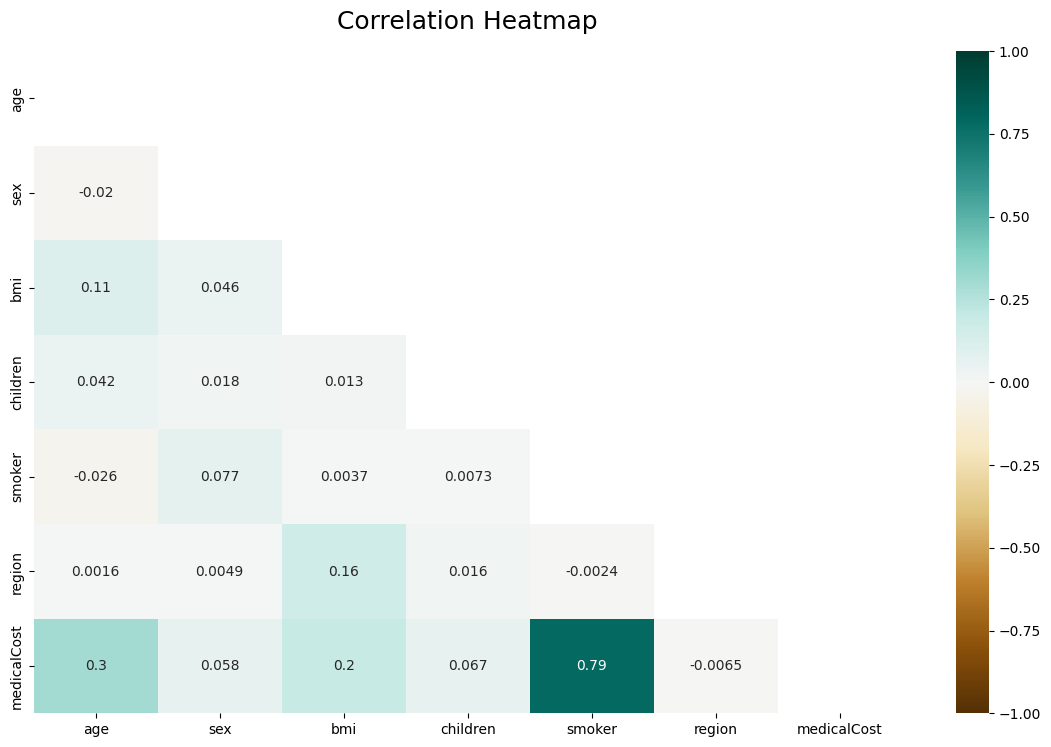

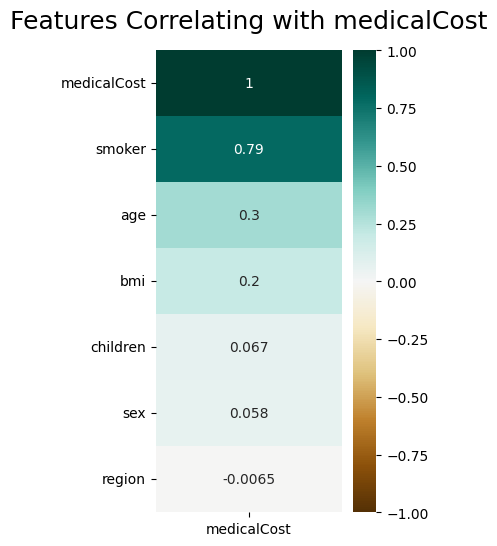

In [ ]:
plotter.plot_correlation_heatmap(df)


##### **Analysis**:

Further examination of the dataset reveals additional insights regarding the factors influencing medical costs. The correlation coefficients between the `Children`, `sex`, `region`, and `medicalCost` variables are as follows: 0.067, 0.058, and -0.0065 respectively. These correlation values indicate weak or negligible relationships between these variables and the `medicalCost` feature.

The `Children` variable shows a slight positive correlation with medical costs, suggesting that having more children may have a marginal impact on medical expenses, although the effect is not substantial. Similarly, the `sex` variable demonstrates a weak positive correlation, indicating that gender may have a minor influence on medical costs, but it is not a significant factor. The `region` variable exhibits an almost negligible correlation, suggesting that the geographic location of individuals does not significantly affect medical costs.

While these findings suggest that `Children`, `sex`, and `region` have relatively minimal influence on the `medicalCost` feature compared to smoking, age, and BMI, it is important to note that they can still contribute to the overall understanding of the dataset.

##### **Hypothesis**:

Based on the weak correlation coefficients observed between `Children`, `sex`, `region`, and `medicalCost`, it is reasonable to hypothesize that these variables may have limited predictive power when it comes to estimating medical costs. However, it is important to consider that these variables may still contain valuable information and could potentially contribute in combination with other factors to a more comprehensive model. Further analysis and modeling techniques can help determine the extent of their impact on accurately predicting medical costs.

## Box-Plot of medical  costs for smokers and non-smokers

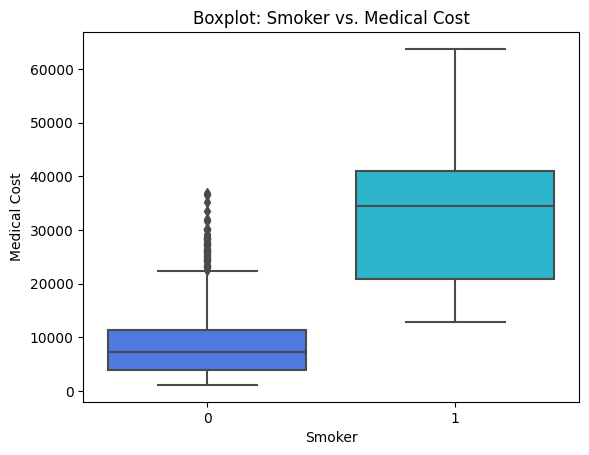

<Figure size 1000x600 with 0 Axes>

In [ ]:
plotter.boxplot_smoker_medicalCost(df)

### Analysis:
The plot clearly illustrates a substantial difference in the average medical costs between non-smokers and smokers. The average medical costs for non-smokers are below 10,000, whereas smokers exhibit significantly higher average costs, exceeding 30,000.

## Scatter-Plot of age and medicalcost

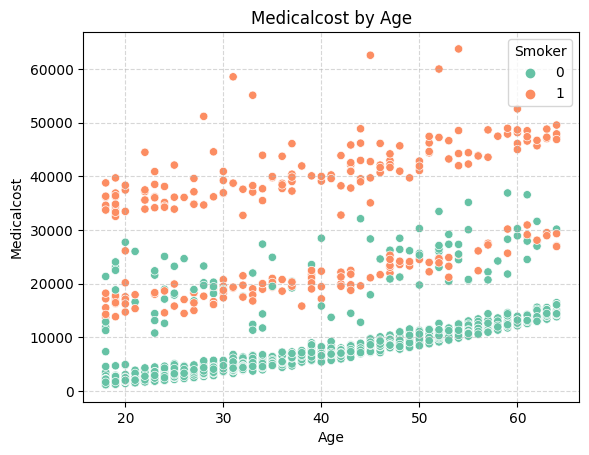

<Figure size 1000x600 with 0 Axes>

In [ ]:
plotter.scatterplot_age_target(df, 'age', 'medicalCost', 'smoker')

##### **Analysis**:

The analysis of medical costs reveals a significant disparity between smokers and non-smokers. The majority of non-smokers have medical costs ranging from 0 to 15k, whereas smokers exhibit considerably higher medical costs, more than twice that of non-smokers on average.

##### **Hypothesis**:

A distinct pattern is observed within each category, with non-smokers and smokers having two distinct groups based on medical costs. There are non-smokers with low medical costs and non-smokers with high medical costs, and a similar pattern is observed among smokers as well.

However, the available data and visualization do not provide a clear explanation for the observed patterns. It is plausible to hypothesize that there may be a crucial factor missing from the dataset, which could significantly influence medical costs for both smokers and non-smokers.

To gain a more comprehensive understanding of the factors contributing to the observed variation in medical costs, it is recommended to explore additional data sources or variables that may have been overlooked. Incorporating these missing factors into the analysis could help provide valuable insights and a more accurate estimation of medical costs for both categories.


## Scatter-Plot of BMI and medicalcost

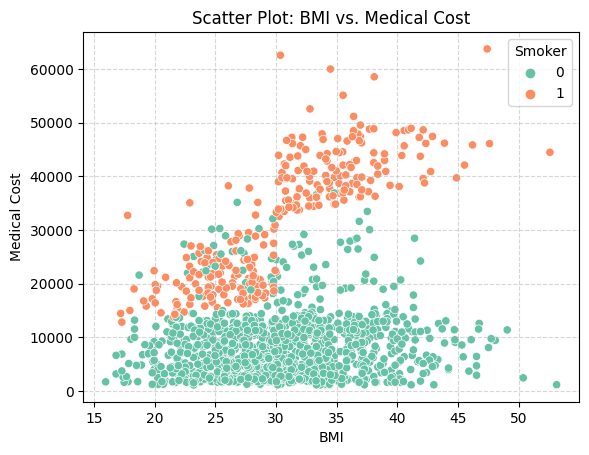

<Figure size 1000x600 with 0 Axes>

In [ ]:
plotter.scatterplot_bmi_medicalCost(df)

##### **Analysis**:
The chart demonstrates that BMI has no significant relationship with medical costs for non-smokers. However, for smokers, a clear pattern emerges. Smokers generally have higher medical costs compared to non-smokers. For smokers with BMIs below 30, the average medical costs are around 25,000. However, for smokers with BMIs above 30, the costs increase dramatically. This suggests that smoking combined with obesity (BMI above 30) leads to significantly higher medical expenses. Understanding this relationship can guide targeted interventions for smoking cessation and obesity prevention to mitigate the financial burden and health risks associated with smoking-related medical costs.

## Box-Plot of region vs BMI

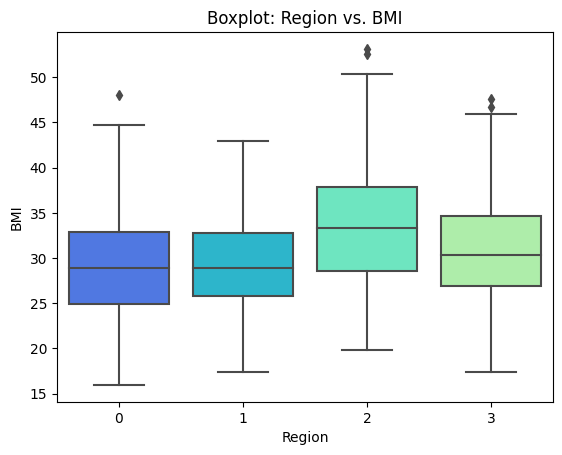

<Figure size 1000x600 with 0 Axes>

In [ ]:
plotter.boxplot_region_bmi(df)


##### **Analysis**:
The graph illustrates the distribution of average BMI (Body Mass Index) across different regions. It reveals that the majority of regions have a relatively similar average BMI, centered around 28. However, a significant disparity is observed with the 'southeast' region, which stands out with considerably higher BMI values compared to the other regions.

This discrepancy suggests that individuals residing in the **'southeast'** region tend to have higher BMI levels on average compared to those in other regions. BMI is a measure of body fat based on height and weight, and higher values generally indicate a higher proportion of body fat. Therefore, this finding implies that individuals in the 'southeast' region may have a higher prevalence of obesity or overweight compared to individuals in other regions.

Understanding such regional variations in BMI can provide insights into the potential health risks and challenges specific to certain areas. It can help healthcare professionals and policymakers identify target regions where interventions and public health initiatives related to weight management and obesity prevention may be particularly beneficial. Further analysis and investigation into the factors contributing to the higher BMI in the 'southeast' region can provide valuable information for addressing these health disparities.

## Doughnut Plots for features Perspective:

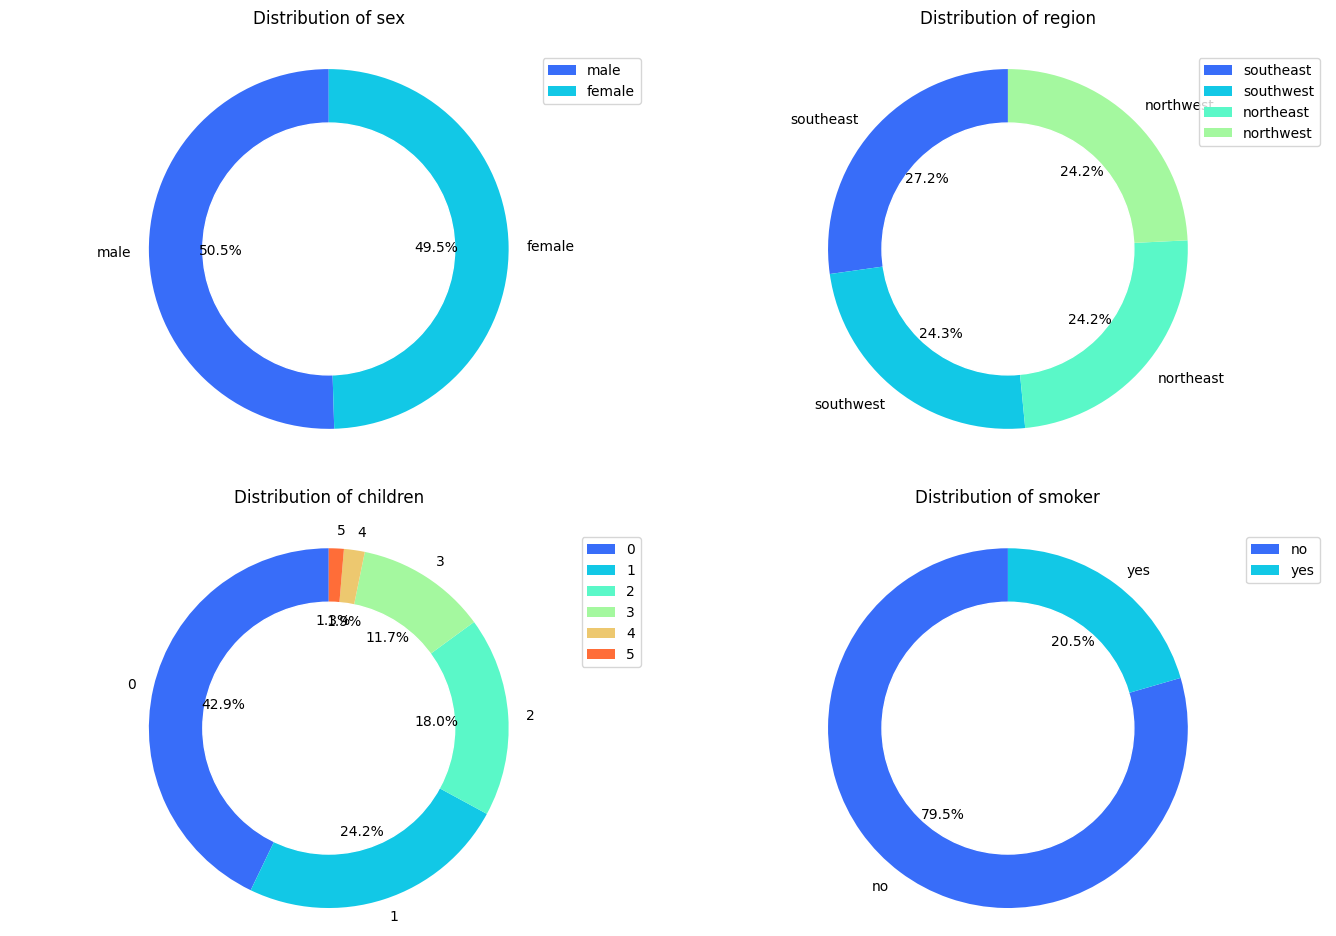

In [ ]:
plotter.plot_donut_chart(df_raw, 'sex', 'region', 'children', 'smoker')

##### **Analysis**:

The donut plots provide insights into the following key points:

1. Gender Distribution: The population is evenly split between males and females, with approximately an equal number of individuals in each category.

2. Regional Distribution: The distribution of individuals across different regions appears to be relatively uniform, with no significant variations observed. Each region contributes a similar proportion to the overall population.

3. Smoking Habits: The majority of individuals, accounting for 80% of the population, are non-smokers. In contrast, smokers constitute only 20% of the population, indicating that smoking is less prevalent among the surveyed individuals.

4. Number of Children: The distribution of individuals based on the number of children shows that approximately 43% have no children. Around 25% have one child, 18% have two children, and the maximum number of children for an individual is five. This suggests that the majority of individuals in the dataset do not have children or have a small number of children.


## Pie Chart of BMI & Age Segmentation

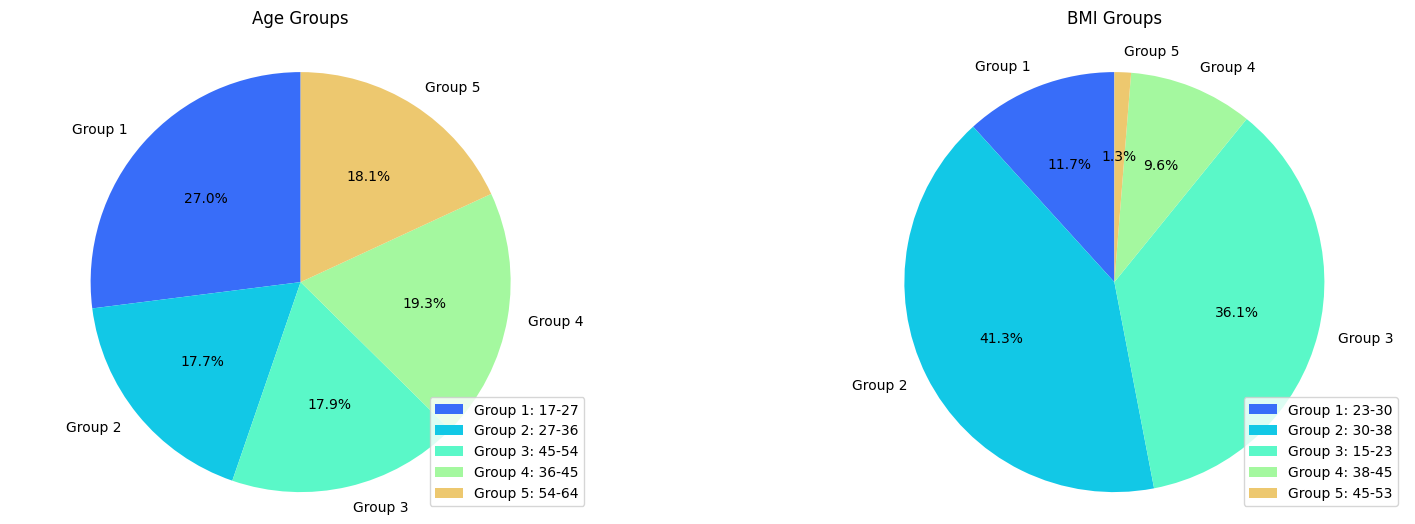

In [ ]:
plotter.plot_groups(df)

##### **Analysis:**

The two pie charts provide the following insights:

1. Age Groups: The largest share of the population, at 27%, falls within the age range of 17 to 27. The remaining age groups have a similar proportion, accounting for approximately 18% each. This indicates that the population is relatively evenly distributed across different age groups.

2. BMI Groups: Around 77% of the population falls within the BMI range of 15 to 30. Within this range, 36% have a BMI from 15 to 23, while 41% have a BMI from 23 to 30. Only a small proportion of the population, approximately 1.3%, has a BMI above 45. This suggests that the majority of individuals have a moderate BMI, with a smaller percentage falling into the extreme BMI ranges.


# Data Manipulation

## Scaling the dataset

The `normalization` function is a method that implements Min-Max scaling to normalize the numeric columns in a given DataFrame. It creates a copy of the original DataFrame and uses a MinMaxScaler object to perform the scaling. By applying the scaler's fit_transform method, all columns in the new DataFrame are normalized to a common range between 0 and 1. The function then returns the resulting DataFrame with the normalized values, allowing for further analysis or processing of the data. This process ensures that the numeric features are on a consistent scale, enabling meaningful comparisons and avoiding potential biases caused by varying ranges of values.

In [ ]:
preprocessor = preprocesing()

In [ ]:
df_normalised = preprocessor.normalization(df)

## Perform box-cox transformation for non-categorical features

### Checking which features are suitable for transformation

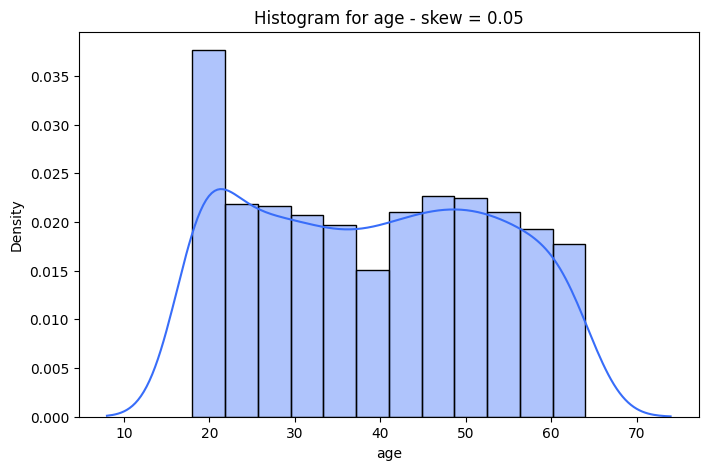

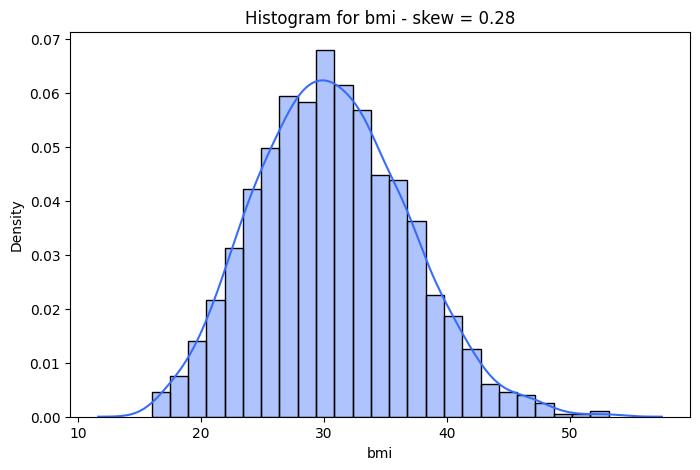

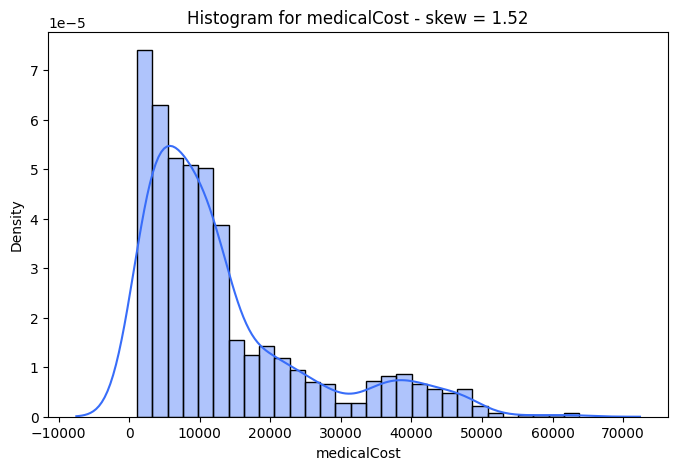

In [ ]:
skewed_features = ['age', 'bmi', 'medicalCost' ]
for c in skewed_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=c, stat="density", alpha=0.4, kde=True, kde_kws={"cut": 3})
    plt.title(f'Histogram for {c} - skew = {round(df[c].skew(), ndigits=2)}')
    plt.show()

##### **Analysis**:
The visualization highlights that the `medicalCost` feature exhibits high skewness, indicating a departure from a normal distribution. This suggests that applying a Box-Cox transformation to this variable can help achieve a more symmetric distribution. Conversely, the `BMI` and `age` features demonstrate relatively lower skewness and closer approximation to a normal shape, implying that a transformation may not be necessary. Implementing the Box-Cox transformation on `medicalCost` can improve model performance and interpretability. Further analysis is needed to assess the impact of this transformation on the model's effectiveness.

In [ ]:
def boxcox_transform(data, columns):
    transformed_data = data.copy()
    epsilon = 10e-10
    transformed_data[columns] = transformed_data[columns] + epsilon
    for column in columns:
        transformed_data[column], _ = boxcox(transformed_data[column])

    return transformed_data


In [ ]:
df_transformed = boxcox_transform(df, ['medicalCost'])
# df_transformed = normalization(df_transformed)

### Comparing the medicalCost distribution, before and after the transformation

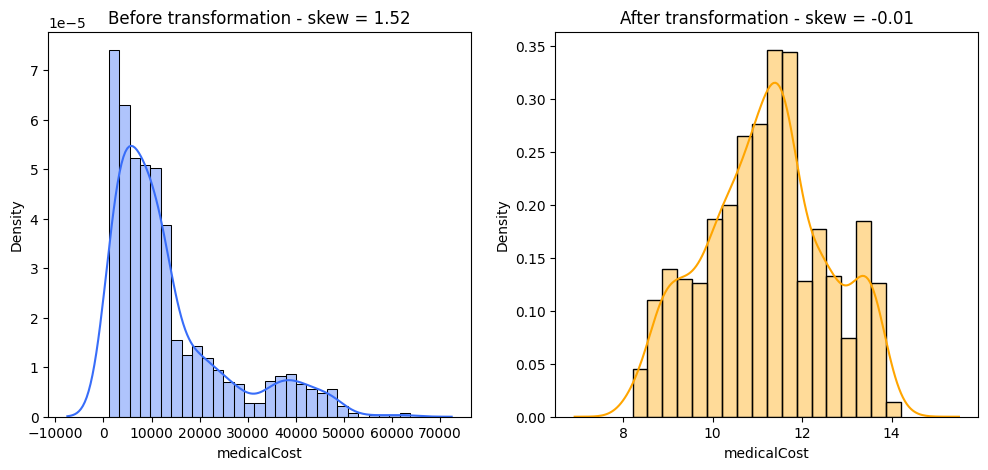

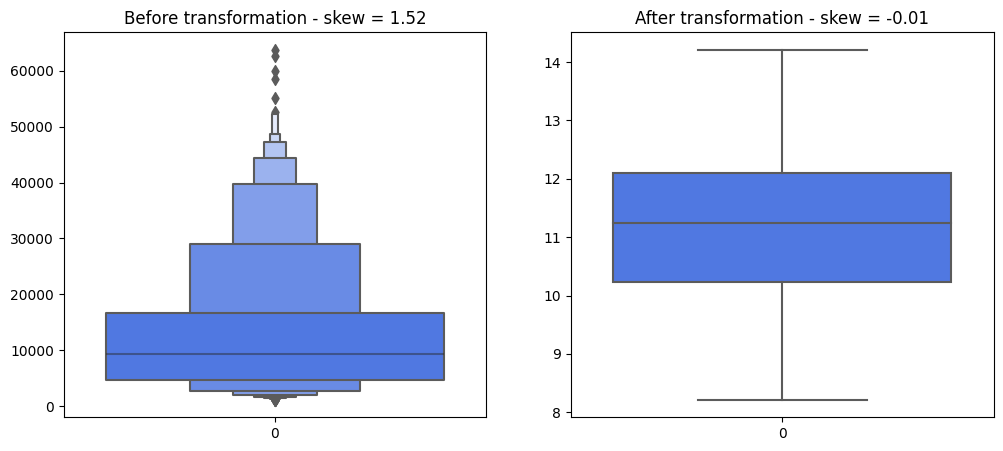

In [ ]:
plotter = visualisation()
plotter.plot_distribution_and_boxplot(df, df_transformed)

##### **Analysis**:

The initial distribution of the `medicalCost` variable exhibited skewness and deviated from a normal distribution. To address this, the Box-Cox transformation was applied, aiming to improve the distribution's symmetry and suitability for analysis. The transformation is a commonly used technique to adjust the data's shape by applying a power transformation. However, it is important to note that the transformation does not guarantee a perfect normal distribution, but rather aims to reduce skewness and create a more balanced distribution.

To evaluate the impact of the Box-Cox transformation on accuracy and model performance, further analysis is needed. This can involve assessing the transformed data's distribution and conducting statistical tests to ensure the assumption of normality. Additionally, the effect of the transformation on predictive modeling and the overall performance of statistical models should be evaluated. It is essential to determine whether the transformation enhances the accuracy of predictions and improves the robustness of the models.

## Detecting outlier with  Z-score method

The `outlier_remover` function takes a DataFrame as input and identifies and removes outliers based on the target variable `medicalCost`. It creates a copy of the original DataFrame and calculates the z-scores for `medicalCost`. Outliers are defined as data points with z-scores greater than 3 or less than -3. These outliers are then removed from the DataFrame by iterating over their indices and dropping them. The function prints the number of outliers detected and returns the modified DataFrame without outliers.

In [ ]:
df_without_outlier = preprocessor.outlier_remover(df)

7 patients are detected as outliers


##### **Analysis**:
Upon implementing the outlier removal method, 7 instances were identified as outliers and subsequently removed from the dataset. However, it is crucial to note that these instances may not necessarily be true outliers, and their removal warrants further investigation. To assess this hypothesis, additional experiments and analyses should be conducted to examine the characteristics of these instances and determine if they truly deviate significantly from the overall data distribution. This will provide a more comprehensive understanding of the outliers' nature and assist in evaluating the reliability of the outlier removal method employed.

#Basic Machine Learning
**Linear Models based on Assignment Criteria**


In [ ]:
class Basic_ML():

  def __init__(self):
    pass



  def simple_linear_regression(self, df, feature):
      """
      Perform simple linear regression on the given feature.

      Parameters:
          df (DataFrame): The input DataFrame containing the features and target variable.
          feature (string) : The feature name for simple regression.

      Returns:
          Print the metrics

      """
      # Extract the feature and target variables
      X = df[[feature]]
      y = df['medicalCost']

      # Create a Linear Regression model
      model = LinearRegression()

      # Fit the model
      model.fit(X, y)

      # Predict the target variable
      y_pred = model.predict(X)

      # Calculate metrics
      mse = mean_squared_error(y, y_pred)
      mae = mean_absolute_error(y, y_pred)
      r2 = r2_score(y, y_pred)

      # Print the metrics
      print(f"Metrics for {feature}:")
      print(f"Mean Squared Error: {mse:.2f}")
      print(f"Mean Absolute Error: {mae:.2f}")
      print(f"R-squared: {r2:.2f}\n")



  def multivariate_linear_regression_3(self, df):
      """
      Perform multivariate linear regression on the given dataset.

      Parameters:
          df (DataFrame): The input DataFrame containing the features and target variable.

      Returns:
          A comprehensive list of the metrics and visualise the result

      """
      # Extract the features and target variables
      X = df[['smoker', 'age', 'bmi']]
      y = df['medicalCost']

      # Add a constant column to the features
      X = sm.add_constant(X)

      # Create a Linear Regression model
      model = sm.OLS(y, X)

      # Fit the model
      results = model.fit()

      # Get the predicted values
      y_pred = results.predict(X)

      # Calculate metrics
      mse = mean_squared_error(y, y_pred)
      mae = mean_absolute_error(y, y_pred)
      r2 = r2_score(y, y_pred)
      evs = explained_variance_score(y, y_pred)

      # Print the metrics
      print("Metrics for Multivariate Linear Regression:")
      print(f"Mean Squared Error: {mse:.2f}")
      print(f"Mean Absolute Error: {mae:.2f}")
      print(f"R-squared: {r2:.2f}")
      print(f"Explained Variance Score: {evs:.2f}\n")

      # Print the summary of the model
      print(results.summary())

      # Calculate the VIF for each feature
      vif = pd.DataFrame()
      vif["Features"] = X.columns
      vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
      print("\nVariance Inflation Factor (VIF):")
      print(vif)

      # Plot the actual vs predicted values
      plt.figure(figsize=(8, 6))
      sns.scatterplot(x=y, y=y_pred)
      plt.xlabel("Actual Medical Cost")
      plt.ylabel("Predicted Medical Cost")
      plt.title("Actual vs Predicted Medical Cost")

      # Plot the residual plot
      plt.figure(figsize=(8, 6))
      sns.residplot(x=y_pred, y=y)
      plt.xlabel("Predicted Medical Cost")
      plt.ylabel("Residuals")
      plt.title("Residual Plot")



  def multivariate_linear_regression(self, df):
      """
      Perform multivariate linear regression on the given dataset.

      Parameters:
          df (DataFrame): The input DataFrame containing the features and target variable.

      Returns:
          A comprehensive list of the metrics and visualise the result

      """

      # Separate the features and target variable
      X = df.drop('medicalCost', axis=1)
      y = df['medicalCost']

      # Add a constant column to the features
      X = sm.add_constant(X)

      # Create a Linear Regression model
      model = sm.OLS(y, X)

      # Fit the model
      results = model.fit()

      # Get the predicted values
      y_pred = results.predict(X)

      # Calculate metrics
      mse = mean_squared_error(y, y_pred)
      mae = mean_absolute_error(y, y_pred)
      r2 = r2_score(y, y_pred)
      evs = explained_variance_score(y, y_pred)

      # Print the metrics
      print("Metrics for Multivariate Linear Regression:")
      print(f"Mean Squared Error: {mse:.2f}")
      print(f"Mean Absolute Error: {mae:.2f}")
      print(f"R-squared: {r2:.2f}")
      print(f"Explained Variance Score: {evs:.2f}\n")

      # Print the summary of the model
      print(results.summary())

      # Calculate the VIF for each feature
      vif = pd.DataFrame()
      vif["Features"] = X.columns
      vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
      print("\nVariance Inflation Factor (VIF):")
      print(vif)

      # Plot the actual vs predicted values
      plt.figure(figsize=(8, 6))
      sns.scatterplot(x=y, y=y_pred)
      plt.xlabel("Actual Medical Cost")
      plt.ylabel("Predicted Medical Cost")
      plt.title("Actual vs Predicted Medical Cost")

      # Plot the residual plot
      plt.figure(figsize=(8, 6))
      sns.residplot(x=y_pred, y=y)
      plt.xlabel("Predicted Medical Cost")
      plt.ylabel("Residuals")
      plt.title("Residual Plot")

In [ ]:
lr = Basic_ML()

## Simple Linear Models:

Top Three most correlated features:
1. Smoker
2. Age
3. BMI

### Simple Linear 1:
medicalCost-Smoker

In [ ]:
lr.simple_linear_regression(df, 'smoker')

Metrics for smoker:
Mean Squared Error: 55727828.34
Mean Absolute Error: 5661.91
R-squared: 0.62



### Simple Linear 2:
medicalCost-age

In [ ]:
lr.simple_linear_regression(df, 'age')

Metrics for age:
Mean Squared Error: 133509857.08
Mean Absolute Error: 9059.15
R-squared: 0.09



### Simple Linear 3:
medicalCost-bmi

In [ ]:
lr.simple_linear_regression(df, 'bmi')

Metrics for bmi:
Mean Squared Error: 140782441.58
Mean Absolute Error: 9173.49
R-squared: 0.04



## Multivariate Linear Models:

### Multivariate Linear with 3-most-correlated Features
medicalCost-(smoker-age-bmi)

Metrics for Multivariate Linear Regression:
Mean Squared Error: 37031422.77
Mean Absolute Error: 4219.19
R-squared: 0.75
Explained Variance Score: 0.75

                            OLS Regression Results                            
Dep. Variable:            medicalCost   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1314.
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:02:59   Log-Likelihood:                -13547.
No. Observations:                1337   AIC:                         2.710e+04
Df Residuals:                    1333   BIC:                         2.712e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|   

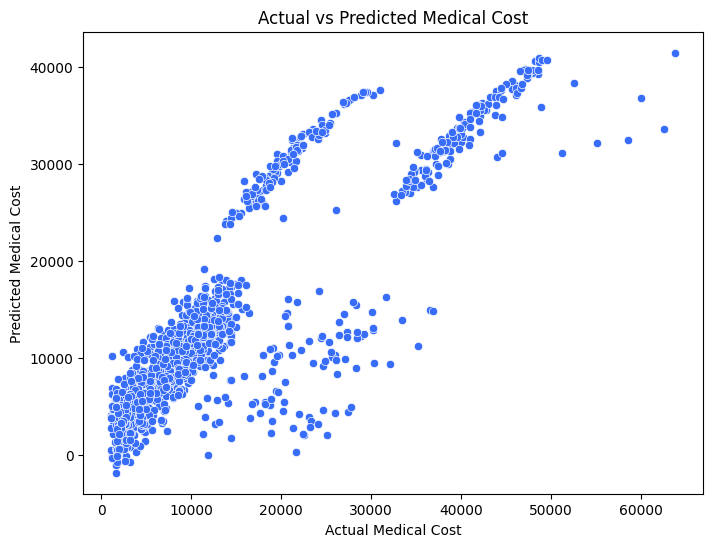

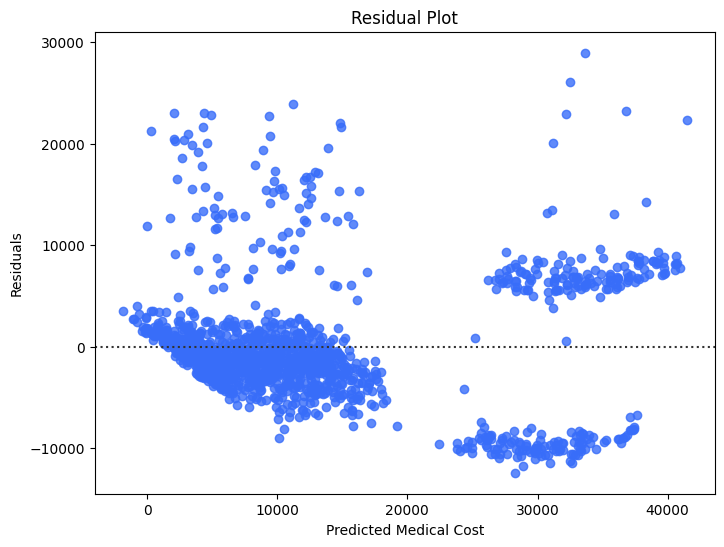

In [ ]:
lr.multivariate_linear_regression_3(df)

##### **Analysis**:
The multivariate linear regression model yielded a reasonable performance with an R-squared value of 0.75, indicating that 75% of the variance in medical costs can be explained by the selected features (smoker, age, and BMI). The mean squared error (MSE) and mean absolute error (MAE) were calculated as 37,031,422.77 and 4,219.19, respectively. These metrics provide an estimate of the model's accuracy in predicting medical costs.

The regression coefficients indicate that all three features have a significant impact on medical costs. The smoker feature has the largest coefficient, suggesting that being a smoker is strongly associated with higher medical costs. Age and BMI also show positive coefficients, indicating that increasing age and BMI are associated with higher medical costs.

The p-values for all features are close to zero, indicating their significance in predicting medical costs. The variance inflation factor (VIF) values for the features are relatively low, indicating low multicollinearity between the variables.

The residual plot shows the distribution of the residuals, which should ideally exhibit a random pattern around zero. The plot suggests that the model captures the majority of the variation in the data, with no apparent systematic patterns in the residuals.

In conclusion, the multivariate linear regression model utilizing the smoker, age, and BMI features demonstrates a reasonably good fit to the data, explaining 75% of the variance in medical costs. The model provides valuable insights into the relationships between these features and medical costs.

### Multivariate Linear with All Features

Metrics for Multivariate Linear Regression:
Mean Squared Error: 36554035.09
Mean Absolute Error: 4175.08
R-squared: 0.75
Explained Variance Score: 0.75

                            OLS Regression Results                            
Dep. Variable:            medicalCost   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     667.0
Date:                Thu, 06 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:03:00   Log-Likelihood:                -13539.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1330   BIC:                         2.713e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|   

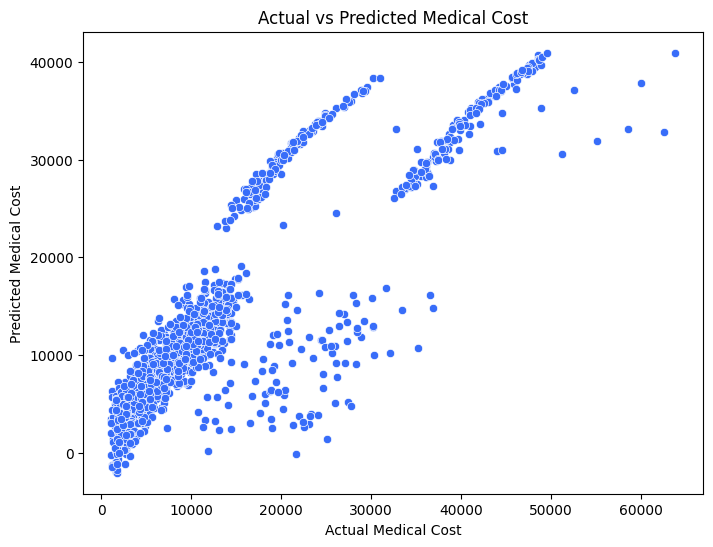

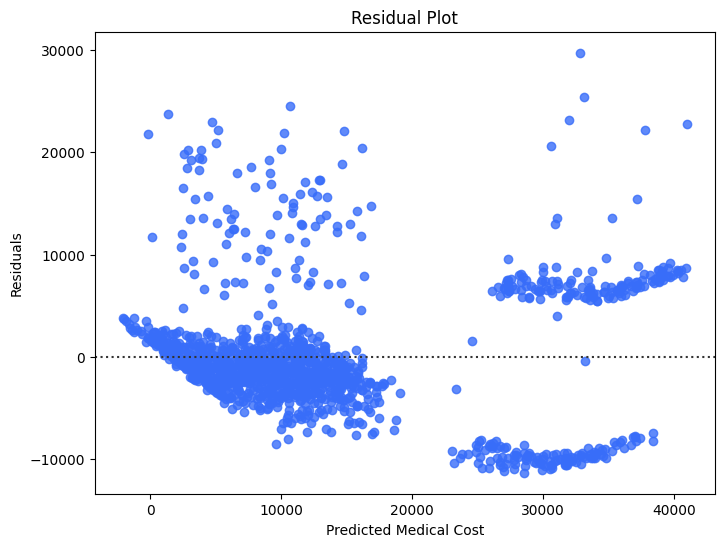

In [ ]:
lr.multivariate_linear_regression(df)

##### **Analysis**:
The multivariate linear regression model shows a reasonable fit to the data. The R-squared value of 0.75 indicates that the model explains 75% of the variance in the target variable, medicalCost. The mean squared error (MSE) and mean absolute error (MAE) indicate the average squared and absolute differences between the actual and predicted values, respectively.

Examining the coefficients, we find that age, BMI, children, and smoker have a significant impact on medicalCost. The coefficient for age suggests that for each year increase in age, medicalCost increases by approximately 257. Similarly, for each unit increase in BMI, medicalCost increases by about 332. Having children also positively affects medicalCost, with an increase of approximately 479 per child. Being a smoker has the most substantial impact, with medicalCost increasing by about $23,820 for smokers compared to non-smokers.

The p-values indicate that all features except sex and region are statistically significant in predicting medicalCost. The variance inflation factor (VIF) values are close to 1 for all features, indicating no significant multicollinearity issues among the predictor variables.

The scatter plot of actual vs predicted values demonstrates a reasonably linear relationship, indicating that the model captures the overall trend in the data. The residual plot shows random scatter around zero, indicating that the model's assumptions regarding the residuals are reasonably satisfied.

Overall, the multivariate linear regression model provides a reasonable fit to the data and can be used to predict medicalCost based on the given features.

##### *** Overal Conclusion***
Based on the analysis, it can be concluded that the multivariate linear regression models outperform the simple linear regression models in predicting the medical cost. The multivariate model with all features achieves an accuracy of 75%, which is higher than the simple models. However, it is worth noting that the p-value for the 'sex' feature is relatively high, indicating that this feature may not be statistically significant in predicting the medical cost.

Considering the complexity of the model, it is recommended to choose the simpler model with fewer features if the accuracy does not significantly improve by adding more features. This helps in avoiding unnecessary complexity and potential overfitting. Therefore, in this case, it may be preferable to choose the model with the three most correlated features (smoker, age, and BMI) as it achieves a similar accuracy while having fewer features.

# Model & Dataset Selection

In [ ]:
# Defining a function for 50-folds cross-validation to evaluate Model Stability
def evaluate_model_stability(X, y, best_model, n_splits=10, n_repeats=5):
    """
    Evaluate the stability of a model using repeated cross-validation.

    This function performs repeated cross-validation on the provided model and calculates the R^2 score for each iteration.
    It then plots a histogram of the R^2 scores and a line plot showing the stability of the model over iterations.

    Parameters:
        X (DataFrame): The input features.
        y (Series): The target variable.
        best_model: The best model for evaluation.
        n_splits (int): The number of splits in each cross-validation. Default is 10.
        n_repeats (int): The number of times cross-validation is repeated. Default is 5.

    Returns:
        scores (list): The list of R^2 scores for each iteration.
    """
    # Create the RepeatedKFold object
    rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

    # Collect the scores from repeated cross-validation
    scores = []

    for train_index, test_index in rkf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_test)
        score = r2_score(y_test, y_pred)
        scores.append(score)

    scores = scores[:-1]
    # Calculate the mean and standard deviation of scores
    mean_score = np.mean(scores)
    std_score = np.std(scores)

    # Plot the histogram of accuracy scores with KDE
    plt.figure(figsize=(8, 6))
    sns.histplot(scores, bins=10, kde=True, color='blue', alpha=0.7)
    plt.xlabel('R^2 Score')
    plt.ylabel('Frequency')
    plt.title('Histogram of Accuracy Scores')

    # Plot the stability line plot
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(scores)), scores, color='blue', marker='o', linestyle='-', linewidth=1, label='Iteration Scores')
    plt.axhline(mean_score, color='red', linestyle='--', label='Mean Score')
    plt.fill_between(range(len(scores)), mean_score - std_score, mean_score + std_score, color='gray', alpha=0.3, label='Standard Deviation')
    plt.xlabel('Iteration')
    plt.ylabel('R^2 Score')
    plt.title('Model Stability')
    plt.legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

    return scores

In [ ]:
class machine_learning():

  def __init__(self):
    pass



  def evaluate_regression_models(self, df, cv=5):
    """
    Evaluate different regression models using cross-validation and compute evaluation metrics.

    Parameters:
        df (pandas.DataFrame): The input DataFrame containing the dataset with features and target variable.
        cv (int, optional): The number of cross-validation folds. Defaults to 5.

    Returns:
        pandas.DataFrame: A DataFrame with evaluation metrics for each regression model.

    """

      # Split the data into features (X) and target variable (y)
    X = df.drop('medicalCost', axis=1)
    y = df['medicalCost']

    # Define a dictionary to store the models and their respective metrics
    models = {
        'Decision Tree': DecisionTreeRegressor(),
        'Random Forest': RandomForestRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(),
        'K-Nearest Neighbors': KNeighborsRegressor(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'XGBoost': xgb.XGBRegressor(),
        'CatBoost': CatBoostRegressor(verbose=False),
        'Support Vector Regression': SVR(),
        'AdaBoost': AdaBoostRegressor(),
        'LightGBM': LGBMRegressor(),
        # 'ElasticNet': ElasticNet()
    }

    # Define a DataFrame to store the metrics
    metrics_df = pd.DataFrame(columns=['Model', 'RMSE', 'MAE', 'Mean R^2'])

    # Iterate over the models dictionary
    for model_name, model in models.items():
        # Perform cross-validation
        scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
        mean_r2 = np.mean(scores)

        # Train the model on the entire dataset
        model.fit(X, y)

        # Make predictions on the test set
        y_pred = model.predict(X)

        # Compute evaluation metrics
        rmse = mean_squared_error(y, y_pred, squared=False)
        mae = mean_absolute_error(y, y_pred)

        # Add the metrics to the metrics DataFrame
        metrics_df.loc[len(metrics_df)] = {'Model': model_name, 'RMSE': rmse, 'MAE': mae,'Mean R^2': mean_r2}

    return metrics_df



  def optimize_catboost(self, df):
      """
      Optimize CatBoostRegressor hyperparameters using Bayesian optimization.

      This function performs Bayesian optimization to find the optimal hyperparameters for a CatBoostRegressor model.
      It splits the data into training and test sets, defines the objective function for optimization, and performs the
      optimization using the BayesianOptimization library. The best hyperparameters are then used to train a CatBoostRegressor
      model and evaluate its performance on the test set. The function also calculates feature importance and plots it, and
      performs stability checking of the model using 50-folds cross-validation.

      Parameters:
          df (pandas.DataFrame): The input DataFrame containing the dataset with features and target variable.

      Returns:
          tuple: A tuple containing the true target values (y_test) and the predicted target values (y_pred) for the test set.

      """
      # Split the data into features (X) and target variable (y)
      X = df.drop('medicalCost', axis=1)
      y = df['medicalCost']

      # Split the data into train and test sets
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

      # Define the objective function for optimization
      def optimize_catboost_objective(learning_rate, depth, l2_leaf_reg, bagging_temperature):
          """
          Objective function for Bayesian optimization of CatBoostRegressor hyperparameters.

          Parameters:
              learning_rate (float): The learning rate hyperparameter.
              depth (float): The depth hyperparameter.
              l2_leaf_reg (float): The L2 regularization hyperparameter.
              bagging_temperature (float): The bagging temperature hyperparameter.

          Returns:
              float: The negative mean squared error (neg_mse) as the objective to be maximized.

          """
          # Create the CatBoostRegressor
          model = CatBoostRegressor(
              learning_rate=learning_rate,
              depth=int(depth),
              l2_leaf_reg=l2_leaf_reg,
              bagging_temperature=bagging_temperature,
              verbose=False
          )

          # Fit the model to the training data
          model.fit(X_train, y_train)

          # Predict on the test data
          y_pred = model.predict(X_test)

          # Calculate the negative mean squared error
          mse = mean_squared_error(y_test, y_pred)
          neg_mse = -mse

          return neg_mse

      # Define the search space for Bayesian optimization
      pbounds = {
          'learning_rate': (0.01, 0.1),
          'depth': (3, 8),
          'l2_leaf_reg': (0.1, 10),
          'bagging_temperature': (0.1, 1.0)
      }

      # Create the BayesianOptimization object with the objective function and search space
      optimizer = BayesianOptimization(
          f=optimize_catboost_objective,
          pbounds=pbounds,
          random_state=42,
      )

      # Perform the optimization
      optimizer.maximize(init_points=10, n_iter=20)

      # Get the best hyperparameters
      best_params = optimizer.max['params']

      # Create the CatBoostRegressor with the best hyperparameters
      best_model = CatBoostRegressor(
          learning_rate=best_params['learning_rate'],
          depth=int(best_params['depth']),
          l2_leaf_reg=best_params['l2_leaf_reg'],
          bagging_temperature=best_params['bagging_temperature'],
          verbose=False
      )

      # Fit the best model to the training data
      best_model.fit(X_train, y_train)

      plotter.plot_learning_curve(best_model, X_train, y_train)


      # Evaluate the best model on the test set
      y_pred = best_model.predict(X_test)
      mse = mean_squared_error(y_test, y_pred)
      rmse = np.sqrt(mse)
      mae = mean_absolute_error(y_test, y_pred)
      r2 = r2_score(y_test, y_pred)

      # Print the results
      print("Best Hyperparameters:")
      print(best_params)

      print("Evaluation Metrics for Optimal Hyperparameters:")
      print("RMSE:", rmse)
      print("MAE:", mae)
      print("R^2:", r2)

      # Calculate feature importance
      importance = best_model.feature_importances_
      feature_names = X.columns

      # Sort feature importance in descending order
      sorted_indices = np.argsort(importance)[::-1]
      sorted_importance = importance[sorted_indices]
      sorted_features = feature_names[sorted_indices]

      # Plot feature importance
      plt.figure(figsize=(10, 6))
      sns.barplot(x=sorted_importance, y=sorted_features, color='blue')
      plt.xlabel('Feature Importance')
      plt.ylabel('Features')
      plt.title('Feature Importance')
      plt.show()

      print("\n\n\nPlease be patient\nStability checking of the model is running =========>")

      # Running the 50-folds cross validation and plotting it
      scores= evaluate_model_stability(X, y, best_model, n_splits=10, n_repeats=5)

      # Calculate the mean and standard deviation of scores
      mean_score = np.mean(scores)
      std_score = np.std(scores)

      # Print the stability metrics
      print('\n')
      print("Stability Metrics For 50-folds Cross-Validation:")
      print("Mean Score:", mean_score)
      print("Max Score:", max(scores))
      print("Min Score:", min(scores))
      print("Standard Deviation of Scores:", std_score)

      return y_test, y_pred



  def optimize_random_forest(self, df):
      """
      Optimize RandomForestRegressor hyperparameters using Bayesian optimization.

      This function performs Bayesian optimization to find the optimal hyperparameters for a RandomForestRegressor model.
      It splits the data into training and test sets, defines the objective function for optimization, and performs the
      optimization using the BayesianOptimization library. The best hyperparameters are then used to train a RandomForestRegressor
      model and evaluate its performance on the test set. The function also calculates evaluation metrics, feature importance,
      and performs stability checking using 50-folds cross-validation.

      Parameters:
          df (pandas.DataFrame): The input DataFrame containing the dataset with features and target variable.

      Returns:
          tuple: A tuple containing the true target values (y_test) and the predicted target values (y_pred) for the test set.

      """
      # Split the data into features (X) and target variable (y)
      X = df.drop('medicalCost', axis=1)
      y = df['medicalCost']

      # Split the data into train and test sets
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

      # Define the objective function for optimization
      def optimize_random_forest_objective(n_estimators, min_samples_split, min_samples_leaf, max_depth):
          """
          Objective function for Bayesian optimization of RandomForestRegressor hyperparameters.

          Parameters:
              n_estimators (float): The number of trees in the forest.
              min_samples_split (float): The minimum number of samples required to split an internal node.
              min_samples_leaf (float): The minimum number of samples required to be at a leaf node.
              max_depth (float): The maximum depth of the tree.

          Returns:
              float: The negative mean squared error (neg_mse) as the objective to be maximized.

          """
          # Create the RandomForestRegressor
          model = RandomForestRegressor(
              n_estimators=int(n_estimators),
              min_samples_split=int(min_samples_split),
              min_samples_leaf=int(min_samples_leaf),
              max_depth=int(max_depth),
              random_state=42
          )

          # Fit the model to the training data
          model.fit(X_train, y_train)

          # Predict on the test data
          y_pred = model.predict(X_test)

          # Calculate the negative mean squared error
          mse = mean_squared_error(y_test, y_pred)
          neg_mse = -mse

          return neg_mse

      # Define the search space for Bayesian optimization
      pbounds = {
          'n_estimators': (50, 500),
          'min_samples_split': (2, 10),
          'max_depth': (3, 8),
          'min_samples_leaf': (1, 10)
      }

      # Create the BayesianOptimization object with the objective function and search space
      optimizer = BayesianOptimization(
          f=optimize_random_forest_objective,
          pbounds=pbounds,
          random_state=42,
      )

      # Perform the optimization
      optimizer.maximize(init_points=10, n_iter=20)

      # Get the best hyperparameters
      best_params = optimizer.max['params']

      # Create the RandomForestRegressor with the best hyperparameters
      best_model = RandomForestRegressor(
          n_estimators=int(best_params['n_estimators']),
          min_samples_split=int(best_params['min_samples_split']),
          min_samples_leaf=int(best_params['min_samples_leaf']),
          max_depth=int(best_params['max_depth']),
          random_state=42
      )

      # Fit the best model to the training data
      best_model.fit(X_train, y_train)

      plotter.plot_learning_curve(best_model, X_train, y_train)


      # Evaluate the best model on the test set
      y_pred = best_model.predict(X_test)
      mse = mean_squared_error(y_test, y_pred)
      rmse = np.sqrt(mse)
      mae = mean_absolute_error(y_test, y_pred)
      r2 = r2_score(y_test, y_pred)

      # Print the results
      print("Best Hyperparameters:")
      print(best_params)

      print("Evaluation Metrics for Optimal Hyperparameters:")
      print("RMSE:", rmse)
      print("MAE:", mae)
      print("R^2:", r2)

      # Calculate feature importance
      importance = best_model.feature_importances_
      feature_names = X.columns

      # Sort feature importance in descending order
      sorted_indices = np.argsort(importance)[::-1]
      sorted_importance = importance[sorted_indices]
      sorted_features = feature_names[sorted_indices]

      # Plot feature importance
      plt.figure(figsize=(10, 6))
      sns.barplot(x=sorted_importance, y=sorted_features, color='blue')
      plt.xlabel('Feature Importance')
      plt.ylabel('Features')
      plt.title('Feature Importance')
      plt.show()

      print("\n\n\nPlease be patient\nStability checking of the model is running =========>")

      # Running the 50-folds cross validation and plotting it
      scores= evaluate_model_stability(X, y, best_model, n_splits=10, n_repeats=5)

      # Calculate the mean and standard deviation of scores
      mean_score = np.mean(scores)
      std_score = np.std(scores)

    # Print the stability metrics
      print('\n')
      print("Stability Metrics For 50-folds Cross-Validation:")
      print("Mean Score:", mean_score)
      print("Max Score:", max(scores))
      print("Min Score:", min(scores))
      print("Standard Deviation of Scores:", std_score)

      return y_test, y_pred



  def optimize_gradient_boosting(self, df):
      """
      Optimize GradientBoostingRegressor hyperparameters using Bayesian optimization.

      This function performs Bayesian optimization to find the optimal hyperparameters for a GradientBoostingRegressor model.
      It splits the data into training and test sets, defines the objective function for optimization, and performs the
      optimization using the BayesianOptimization library. The best hyperparameters are then used to train a GradientBoostingRegressor
      model and evaluate its performance on the test set. The function also calculates evaluation metrics, feature importance,
      and performs stability checking using 50-folds cross-validation.

      Parameters:
          df (pandas.DataFrame): The input DataFrame containing the dataset with features and target variable.

      Returns:
          tuple: A tuple containing the true target values (y_test) and the predicted target values (y_pred) for the test set.

      """
      # Split the data into features (X) and target variable (y)
      X = df.drop('medicalCost', axis=1)
      y = df['medicalCost']

      # Split the data into train and test sets
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

      # Define the objective function for optimization
      def optimize_gradient_boosting_objective(n_estimators, learning_rate, max_depth, min_samples_split, min_samples_leaf):
          """
          Objective function for Bayesian optimization of GradientBoostingRegressor hyperparameters.

          Parameters:
              n_estimators (float): The number of boosting stages.
              learning_rate (float): Learning rate shrinks the contribution of each tree.
              max_depth (float): Maximum depth of the individual regression estimators.
              min_samples_split (float): The minimum number of samples required to split an internal node.
              min_samples_leaf (float): The minimum number of samples required to be at a leaf node.

          Returns:
              float: The negative mean squared error (neg_mse) as the objective to be maximized.

          """
          # Create the GradientBoostingRegressor
          model = GradientBoostingRegressor(
              n_estimators=int(n_estimators),
              learning_rate=learning_rate,
              max_depth=int(max_depth),
              min_samples_split=int(min_samples_split),
              min_samples_leaf=int(min_samples_leaf),
              random_state=42
          )

          # Fit the model to the training data
          model.fit(X_train, y_train)

          # Predict on the test data
          y_pred = model.predict(X_test)

          # Calculate the negative mean squared error
          mse = mean_squared_error(y_test, y_pred)
          neg_mse = -mse

          return neg_mse

      # Define the search space for Bayesian optimization
      pbounds = {
          'n_estimators': (50, 500),
          'learning_rate': (0.01, 0.2),
          'max_depth': (3, 8),
          'min_samples_split': (2, 10),
          'min_samples_leaf': (1, 10)
      }

      # Create the BayesianOptimization object with the objective function and search space
      optimizer = BayesianOptimization(
          f=optimize_gradient_boosting_objective,
          pbounds=pbounds,
          random_state=42,
      )

      # Perform the optimization
      optimizer.maximize(init_points=10, n_iter=20)

      # Get the best hyperparameters
      best_params = optimizer.max['params']

      # Create the GradientBoostingRegressor with the best hyperparameters
      best_model = GradientBoostingRegressor(
          n_estimators=int(best_params['n_estimators']),
          learning_rate=best_params['learning_rate'],
          max_depth=int(best_params['max_depth']),
          min_samples_split=int(best_params['min_samples_split']),
          min_samples_leaf=int(best_params['min_samples_leaf']),
          random_state=42
      )

      # Fit the best model to the training data
      best_model.fit(X_train, y_train)

      plotter.plot_learning_curve(best_model, X_train, y_train)

      # Evaluate the best model on the test set
      y_pred = best_model.predict(X_test)
      mse = mean_squared_error(y_test, y_pred)
      rmse = np.sqrt(mse)
      mae = mean_absolute_error(y_test, y_pred)
      r2 = r2_score(y_test, y_pred)

      # Print the results
      print("Best Hyperparameters:")
      print(best_params)

      print("Evaluation Metrics for Optimal Hyperparameters:")
      print("RMSE:", rmse)
      print("MAE:", mae)
      print("R^2:", r2)

      # Calculate feature importance
      importance = best_model.feature_importances_
      feature_names = X.columns

      # Sort feature importance in descending order
      sorted_indices = np.argsort(importance)[::-1]
      sorted_importance = importance[sorted_indices]
      sorted_features = feature_names[sorted_indices]

      # Plot feature importance
      plt.figure(figsize=(10, 6))
      sns.barplot(x=sorted_importance, y=sorted_features, color='blue')
      plt.xlabel('Feature Importance')
      plt.ylabel('Features')
      plt.title('Feature Importance')
      plt.show()

      print("\n\n\nPlease be patient\nStability checking of the model is running =========>")

      # Running the 50-folds cross validation and plotting it
      scores= evaluate_model_stability(X, y, best_model, n_splits=10, n_repeats=5)

      # Calculate the mean and standard deviation of scores
      mean_score = np.mean(scores)
      std_score = np.std(scores)

      # Print the stability metrics
      print('\n')
      print("Stability Metrics For 50-folds Cross-Validation:")
      print("Mean Score:", mean_score)
      print("Max Score:", max(scores))
      print("Min Score:", min(scores))
      print("Standard Deviation of Scores:", std_score)

      return y_test, y_pred



  def optimize_stacking_model(self, df):
      """
      Optimize and evaluate a stacking model for regression.

      This function splits the data into features (X) and target variable (y) and performs train-test splitting.
      It defines a list of base regression models and creates a stacking regressor with the base models.
      The stacking model is fitted to the training data and evaluated on the test set.
      The function also calculates feature importance and plots a bar chart of feature importance.
      It then performs stability checking using 50-fold cross-validation and prints the stability metrics.

      Parameters:
          df (DataFrame): The input DataFrame containing the data.

      Returns:
          tuple: A tuple containing the true target values (y_test) and the predicted target values (y_pred).

      """
      # Split the data into features (X) and target variable (y)
      X = df.drop('medicalCost', axis=1)
      y = df['medicalCost']

      # Split the data into train and test sets
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

      # Define the base regression models
      base_models = [
          ('linear', LinearRegression()),
          # ('xgb', XGBRegressor()),
          ('ridge', Ridge()),
          ('rf', RandomForestRegressor(max_depth=5, min_samples_leaf=8, n_estimators=282, random_state=42)),
          # ('gb', GradientBoostingRegressor(learning_rate=0.036, max_depth=2, n_estimators=486))
      ]

      # Create the stacking regressor with the base models
      stacking_model = StackingRegressor(estimators=base_models, final_estimator=Ridge())

      # Fit the stacking model to the training data
      stacking_model.fit(X_train, y_train)

      plotter.plot_learning_curve(stacking_model, X_train, y_train)


      # Evaluate the stacking model on the test set
      y_pred = stacking_model.predict(X_test)
      mse = mean_squared_error(y_test, y_pred)
      rmse = np.sqrt(mse)
      mae = mean_absolute_error(y_test, y_pred)
      r2 = r2_score(y_test, y_pred)

      # Print the evaluation metrics
      print("Evaluation Metrics for Stacking Model:")
      print("RMSE:", rmse)
      print("MAE:", mae)
      print("R^2:", r2)

      # Calculate feature importance
      importance = stacking_model.final_estimator_.coef_
      feature_names = X.columns

      # Sort feature importance in descending order
      sorted_indices = np.argsort(importance)[::-1]
      sorted_importance = importance[sorted_indices]
      sorted_features = feature_names[sorted_indices]

      # Calculate feature importance
      importance = stacking_model.final_estimator_.coef_

      # Plot feature importance
      plt.bar(range(len(importance)), importance)
      plt.xticks(range(len(importance)), [i[0] for i in base_models], rotation='vertical')
      plt.xlabel('Features')
      plt.ylabel('Importance')
      plt.title('Models Importance')
      plt.show()


      # Calculate feature importance
      importance = np.mean([
          model.feature_importances_ if isinstance(model, RandomForestRegressor) else model.coef_
          for model in stacking_model.named_estimators_.values()
      ], axis=0)
      feature_names = X.columns

      # Sort feature importance in descending order
      sorted_indices = np.argsort(importance)[::-1]
      sorted_importance = importance[sorted_indices]
      sorted_features = feature_names[sorted_indices]

      # Plot feature importance
      plt.bar(range(len(importance)), sorted_importance)
      plt.xticks(range(len(importance)), sorted_features, rotation='vertical')
      plt.xlabel('Features')
      plt.ylabel('Importance')
      plt.title('Feature Importance')
      plt.show()


      print("\n\n\nPlease be patient\nStability checking of the model is running =========>")

      # Running the 50-folds cross validation and plotting it
      scores = evaluate_model_stability(X, y, stacking_model, n_splits=10, n_repeats=5)

      # Calculate the mean and standard deviation of scores
      mean_score = np.mean(scores)
      std_score = np.std(scores)

      # Print the stability metrics
      print('\n')
      print("Stability Metrics For 50-folds Cross-Validation:")
      print("Mean Score:", mean_score)
      print("Max Score:", max(scores))
      print("Min Score:", min(scores))
      print("Standard Deviation of Scores:", std_score)

      return y_test, y_pred


### Pipeline:


We are goiing to systematically evaluate the performance of different models using 5-fold cross-validation and compare the results for the four different dataframes. This allows us to select the best dataframe for our further study based on the metrics provided.


1. **Perform the pipeline**:

    - Loop through each model and perform 5-fold cross-validation.
    - For each model, evaluate the performance metrics (RMSE, MAE, R-squared) for each dataframe.
    - Calculate the mean R-squared score for each model and store it in the `mean_r2_scores` dictionary.
    - Compare the mean R-squared scores across the different dataframes and select the best dataframe for further study.


2. **Dataframes**:

    - **Original**: The original dataframe without any preprocessing. It represents the raw data as it is without any modifications.
    
    - **Normalised**: The dataframe with features normalized to have zero mean and unit variance. Normalization scales the data so that all features have a similar range, preventing certain features from dominating the model.
    
    - **Transformed**: The dataframe with features transformed using a specific transformation method (e.g., logarithmic, square root). Transformation can help to meet the assumptions of linear regression models and improve the linearity between predictors and the target variable.
    
    - **Without Outliers**: The dataframe with outliers removed from the dataset. Outliers can significantly affect the model's

 performance and distort the results. Removing outliers helps to improve the model's robustness and generalization.
    

3. **Models**:

    - **Decision Tree**: A non-parametric supervised learning model that uses a tree structure to make predictions. It splits the data based on features and their thresholds to create a hierarchical structure of decisions.
    
    - **Random Forest**: An ensemble learning method that constructs multiple decision trees and combines their predictions. It reduces overfitting and improves accuracy by averaging the predictions of individual trees.
    
    - **Gradient Boosting**: A boosting algorithm that builds an ensemble of weak models sequentially, where each model corrects the mistakes of the previous ones. It combines multiple weak predictors to create a strong predictor. Gradient boosting uses gradient descent to minimize a loss function.
    
    - **K-Nearest Neighbors**: A non-parametric algorithm that predicts the value of a data point by considering its K nearest neighbors. It calculates the distance between the data point and its neighbors and assigns the majority vote or average value of the K nearest neighbors as the prediction.
    
    - **Ridge Regression**: A linear regression model with L2 regularization, which adds a penalty term to the loss function to control the complexity of the model. It shrinks the coefficients towards zero, reducing the impact of less important features and preventing overfitting.
    
    - **Lasso Regression**: A linear regression model with L1 regularization, which adds a penalty term to the loss function to encourage sparsity in the coefficients. It performs feature selection by driving some coefficients to exactly zero, effectively removing less relevant features.
    
    - **XGBoost**: An optimized gradient boosting framework that uses a tree-based learning algorithm. It combines the strengths of gradient boosting and regularization techniques to deliver high performance. XGBoost is known for its scalability and efficiency.
    
    - **CatBoost**: A gradient boosting library that handles categorical features automatically. It incorporates an innovative algorithm for processing categorical variables and provides excellent performance without extensive data preprocessing.
    
    - **Support Vector Regression**: A regression model that uses support vector machines to find a hyperplane that best fits the data. It maps the input vectors to a high-dimensional feature space and performs regression by finding a hyperplane that maximizes the margin between the data points.
    
    - **AdaBoost**: A boosting algorithm that combines weak learners to create a strong learner. It assigns weights to the training instances and adjusts them in each iteration to focus on the misclassified samples. AdaBoost gives more importance to difficult instances, improving overall performance.
    
    - **LightGBM**: A gradient boosting framework that uses a tree-based learning algorithm and is designed to be efficient and scalable. It achieves high accuracy with faster training speed by using histogram-based algorithms and parallel learning techniques.
    
    - **ElasticNet**: A linear regression model that combines the L1 and L2 regularization terms. It balances between Lasso and Ridge regression by introducing a mixing parameter. ElasticNet is useful when there are many correlated features in the dataset.



4. **Metrics:**

  - **Mean R-squared**:
    - R-squared (coefficient of determination) measures the proportion of the variance in the target variable that is predictable from the independent variables.
    - Mean R-squared is the average R-squared value obtained from cross-validation, which provides an estimate of the model's predictive power across different folds of the data.

  - **Root Mean Squared Error (RMSE)**:
   - RMSE represents the square root of the average squared difference between the predicted and actual values.
   - It measures the average magnitude of the prediction error, providing an overall assessment of the model's performance.

  - **Mean Absolute Error (MAE)**:
     - MAE calculates the average absolute difference between the predicted and actual values.
     - It measures the average magnitude of the prediction errors without considering their direction, providing an intuitive measure of the model's accuracy.

## Different Models Comparison Based on Metrics



In [ ]:
ml = machine_learning()

In [ ]:
def models_dataframes_comparison(df_original, df_normalised, df_transformed, df_without_outlier):
    """
    Compare the performance of regression models on different dataframes.

    Args:
        df_original (pd.DataFrame): DataFrame containing the original data.
        df_normalised (pd.DataFrame): DataFrame containing the normalised data.
        df_transformed (pd.DataFrame): DataFrame containing the transformed data.
        df_without_outlier (pd.DataFrame): DataFrame containing the data without outliers.

    Returns:
        pd.DataFrame: DataFrame comparing the performance of regression models on different dataframes.

    """
    ml = machine_learning()
    models_comparison = pd.DataFrame({'Model':['Decision Tree', 'Random Forest', 'Gradient Boosting', 'K-Nearest Neighbors',
                                              'Ridge Regression', 'Lasso Regression', 'XGBoost', 'CatBoost	', 'Support Vector Regression'
                                                'AdaBoost', 'LightGBM']})
    df_name = ['Original', 'Normalised', 'Transformed', 'Without Outliers']
    dataframes = [df_original, df_normalised, df_transformed, df_without_outlier]
    results = [ml.evaluate_regression_models(df) for df in dataframes]

    for j, cname in enumerate(['RMSE', 'MAE', 'Mean R^2']):
      for i, result in enumerate(results):
        models_comparison[f'{df_name[i]} {cname}'] = result[cname]

    return models_comparison

In [ ]:
models_comparison = models_dataframes_comparison(df, df_normalised, df_transformed, df_without_outlier)

### Comparing R-squared

In [ ]:
models_comparison.iloc[:, [0,9,10,11,12]]

Model  Original Mean R^2  Normalised Mean R^2  \
0                      Decision Tree           0.702474             0.709192   
1                      Random Forest           0.834982             0.835023   
2                  Gradient Boosting           0.856008             0.855724   
3                K-Nearest Neighbors           0.104009             0.775114   
4                   Ridge Regression           0.747118             0.747131   
5                   Lasso Regression           0.747136            -0.000688   
6                            XGBoost           0.810018             0.801876   
7                         CatBoost\t           0.844024             0.844024   
8  Support Vector RegressionAdaBoost          -0.103743             0.708695   
9                           LightGBM           0.817100             0.822606   

   Transformed Mean R^2  Without Outliers Mean R^2  
0              0.651668                   0.701984  
1              0.807664                   0.838407  
2              0.830352                   0.856625  
3              0.285748                   0.102689  
4              0.766320                   0.750434  
5              0.262391                   0.750471  
6              0.769203                   0.797758  
7              0.815182                   0.842176  
8              0.205695                  -0.101522  
9              0.760223                   0.829651

### Comparing RMSE

In [ ]:
models_comparison.iloc[:, 0:5]

Model  Original RMSE  Normalised RMSE  \
0                      Decision Tree     442.113916         0.007057   
1                      Random Forest    1846.282571         0.029406   
2                  Gradient Boosting    3830.210238         0.061138   
3                K-Nearest Neighbors    9100.297582         0.073198   
4                   Ridge Regression    6046.154063         0.096514   
5                   Lasso Regression    6045.994358         0.193234   
6                            XGBoost    1127.182706         0.016700   
7                         CatBoost\t    2832.926821         0.045219   
8  Support Vector RegressionAdaBoost   12716.858747         0.102116   
9                           LightGBM    4908.021163         0.077627   

   Transformed RMSE  Without Outliers RMSE  
0          0.088378             443.275846  
1          0.234120            1789.903936  
2          0.476738            3738.842361  
3          0.926572            8817.432823  
4          0.654266            5817.614520  
5          1.168539            5817.452773  
6          0.159465            1088.338685  
7          0.336710            2799.193371  
8          1.194614           12269.361133  
9          0.689447            4795.286998

### Comparing MAE

In [ ]:
models_comparison.iloc[:, [0,5,6,7,8]]

Model  Original MAE  Normalised MAE  \
0                      Decision Tree     23.666860        0.000378   
1                      Random Forest   1001.036463        0.015973   
2                  Gradient Boosting   2073.321076        0.033094   
3                K-Nearest Neighbors   6149.990234        0.043570   
4                   Ridge Regression   4182.995336        0.066541   
5                   Lasso Regression   4175.468901        0.145134   
6                            XGBoost    618.023127        0.009251   
7                         CatBoost\t   1547.333210        0.024699   
8  Support Vector RegressionAdaBoost   8298.357522        0.096114   
9                           LightGBM   3893.951033        0.060431   

   Transformed MAE  Without Outliers MAE  
0         0.004831             23.791422  
1         0.114792            960.603110  
2         0.245093           1999.016288  
3         0.656766           5970.743677  
4         0.411134           4063.861452  
5         0.944838           4056.617851  
6         0.080083            600.462178  
7         0.178309           1522.041899  
8         0.667842           8087.035340  
9         0.542795           3835.338674

##### **Analysis of Datasets**:
Based on the analysis of the datasets, it appears that the normalization and transformation methods applied to the data have a negative impact on the model's performance. The normalised models and transformed models consistently exhibit lower accuracy and R-squared values compared to the original dataset. This suggests that the Box-Cox transformation is not suitable for the given dataset. Additionally, normalizing the data may not be beneficial, especially for models like Gradient Boosting that already incorporate normalization within their algorithms. However, the dataset with dropped outliers shows a slight improvement in the model's performance. It is important to further investigate whether this improvement is due to random splitting or if the z-score-based outlier detection successfully identified genuine outliers that were negatively affecting the model's accuracy.

##### **Analysis of Models**:

After evaluating the performance of different models on the dataset, we observed that CatBoost, Gradient Boosting, and Random Forest performed relatively well compared to the other models. They achieved accuracy rates of approximately 84%, 85%, and 83%, respectively. Among these models, XGBoost exhibited the lowest error. However, its accuracy did not match that of the other models.

To further investigate and determine the most suitable model for this dataset, we will optimize the three ensemble models (CatBoost, Gradient Boosting, and Random Forest). By optimizing the models, we aim to refine their hyperparameters and improve their performance on the dataset. This optimization process will help us identify the model that provides the best accuracy and generalization for the given data.

By comparing the optimized versions of these ensemble models, we can make an informed decision on which one to choose for further analysis and study.

In [ ]:
def compare_catboost_accuracy(data1, data2, n_splits=4):
    # Prepare data
    X1 = data1.drop('medicalCost', axis=1)
    y1 = data1['medicalCost']
    X2 = data2.drop('medicalCost', axis=1)
    y2 = data2['medicalCost']

    # Perform comparisons
    results = []
    for i in range(n_splits):
        # Split data into train and test sets
        X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=i)
        X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=i)

        # Train CatBoost regressor on the first dataset
        model1 = CatBoostRegressor(verbose=False)
        model1.fit(X1_train, y1_train)

        # Train CatBoost regressor on the second dataset
        model2 = CatBoostRegressor(verbose=False)
        model2.fit(X2_train, y2_train)

        # Evaluate accuracy using cross-validation
        scores1 = cross_val_score(model1, X1_test, y1_test, cv=5)
        scores2 = cross_val_score(model2, X2_test, y2_test, cv=5)

        # Store the mean accuracy scores
        results.append((np.mean(scores1), np.mean(scores2)))
        original = [i[0] for i in results]
        outliers = [i[1] for i in results]

    return print(f'The average accuracy for original dataset is {np.mean(original)}\nThe average accuracy for dataframe with dropped outliers is {np.mean(outliers)}')

In [ ]:
compare_catboost_accuracy(df, df_without_outlier)

The average accuracy for original dataset is 0.8151771850499415
The average accuracy for dataframe with dropped outliers is 0.7927486082080446


##### **Analysis of Outliers**:

In our analysis, we focused on implementing the CatBoostRegression model on both the original and without_outlier datasets. To verify the nature of the suspected outliers, we performed different train-test splits and cross-validations. Our goal was to determine whether these data points were genuine outliers or not.

The results of our analysis indicate that the suspected outliers are not genuine outliers. We observed that the average accuracy of the different cross-validations with various train-test splits was lower in the without_outlier dataset compared to the original dataset. Specifically, the original dataset achieved an average accuracy of approximately 81%, while the without_outlier dataset had an average accuracy of around 79%.

Based on these findings, it can be concluded that the potential outliers identified in the original dataset are not true outliers. Removing these instances did not significantly improve the model's accuracy. Therefore, it is likely that these data points are valid and should not be considered outliers.

This analysis emphasizes the importance of thoroughly investigating suspected outliers before making any decisions regarding their removal. In this case, the initial suspicion was not confirmed, and keeping the original dataset yielded better overall performance for the CatBoostRegression model.

# Optimisation:

#### Available non-AI-based Methods:
- **Grid Search**: Perform a grid search to tune the hyperparameters of the models. Grid search exhaustively searches through a specified parameter grid and evaluates the model's performance using cross-validation. It helps to find the best combination of hyperparameters that maximize the model's performance.
- **Random Search**: Perform a random search to sample randomly from a specified parameter distribution and evaluate the model's performance. Random search explores a wider range of hyperparameter values and can be more efficient than grid search for high-dimensional hyperparameter spaces.
- **Bayesian Search**: Use Bayesian optimization to find the optimal hyperparameters by constructing a probabilistic model of the objective function. Bayesian search uses the model to intelligently select the next set of hyperparameters to evaluate, aiming to find the global optimum with fewer evaluations.
- **Genetic Algorithm**: Apply a genetic algorithm to optimize the hyperparameters by mimicking the process of natural selection. Genetic algorithms use techniques such as mutation, crossover, and selection to iteratively evolve a population of potential solutions. It can effectively search through a large and complex hyperparameter space.

- **Particle Swarm Optimization (PSO)**: is a population-based optimization algorithm inspired by collective behavior in nature. In PSO, particles representing potential solutions move through a search space, adjusting their positions based on their own experience and the best-performing particles. The algorithm aims to converge towards the global optimum by iteratively updating particle positions and velocities. PSO is a flexible and efficient method for solving optimization problems and finding optimal solutions in various domains.

##### **Analysis**:
When comparing the optimization methods for hyperparameter tuning, each method has its advantages and considerations. Grid Search is a reliable approach as it systematically explores all parameter combinations, but it can be computationally expensive for large parameter grids. Random Search is more efficient for high-dimensional spaces as it randomly samples from the parameter distribution. On the other hand, PSO algorithm is efficient, quick convergence, and easy to implement. However,  its sensitivity to initial parameter settings, potential struggle in complex search spaces, possibility of getting trapped in suboptimal solutions make, and also its running time comparing to bayesian search, make it less popular for this study. And finally, Bayesian Search stands out by constructing a probabilistic model and intelligently selecting hyperparameter combinations, aiming to find the global optimum with fewer evaluations. Genetic Algorithm is effective for complex spaces but may require more iterations to converge. Considering both performance and time efficiency, Bayesian Search is often a strong choice. It combines the advantages of exploring the parameter space intelligently while potentially requiring fewer evaluations to find the best combination of hyperparameters. Therefore, we use bayesian search for hyperparameter-tuning for this study.

**Referencees:**
- Tani, L. and Veelken, C., 2022. Comparison of Bayesian and particle swarm algorithms for hyperparameter optimisation in machine learning applications in high energy physics. arXiv preprint arXiv:2201.06809.
- Lan, G., Tomczak, J.M., Roijers, D.M. and Eiben, A.E., 2022. Time efficiency in optimization with a bayesian-evolutionary algorithm. Swarm and Evolutionary Computation, 69, p.100970.


### **Models Evaluation Metrics & Graphs:**

#### Optimized Model Metrics:
-  **RMSE (Root Mean Squared Error)**: The square root of the average of the squared differences between the predicted and actual values. It provides a measure of the average magnitude of the prediction error.
-  **MAE (Mean Absolute Error)**: The average of the absolute differences between the predicted and actual values. It measures the average magnitude of the prediction errors without considering their direction.
-  **R-squared**: The coefficient of determination that represents the proportion of the variance in the target variable that is predictable from the independent variables. It indicates the goodness of fit of the model.

#### Stability Metrics for K-fold Cross-Validation:
-  **Mean R-squared**: The average R-squared value obtained from the cross-validation process. It provides an estimate of the model's predictive power across different folds of the data.
-  **Max R-squared**: The maximum R-squared value obtained from the cross-validation process. It represents the highest predictive power achieved by the model among different folds.
-  **Min R-squared**: The minimum R-squared value obtained from the cross-validation process. It represents the lowest predictive power observed by the model among different folds.
- **Standard Deviation of R-squared**: The measure of the variability or dispersion of the R-squared values obtained from the cross-validation process. It indicates the stability or consistency of the model's performance across different folds.

#### Graphs:
- **Learning Curve**: A plot showing the training and cross-validation scores as a function of the training set size. It helps to visualize the model's performance in terms of bias and variance and identify if the model is underfitting or overfitting.
- **Feature Importance**: A plot or table showing the importance of each feature in the model. It helps to identify the most influential features in making predictions.
- **Distribution of R-squared for 50-fold**: A histogram or box plot showing the distribution of R-squared values obtained from 50-fold cross-validation. It provides insights into the spread and variability of the model's performance across different folds.
- **Model Stability Plot**: A plot showing the fluctuation of R-squared values across different iterations or subsets of the data. It helps to assess the stability and consistency of the model's performance.

###**Note:**
Some hyperparameters such as number of leafs in optimised model should have integer values while our output is a float number. It is the result of random sampling from a normal distribution. However, we rounded all of those numbers to the lower integer value and then passed to the model. For example, a 4.91 value for number of leafs means 4.

## Model 1:
### Catboost Regressor


|   iter    |  target   | baggin... |   depth   | l2_lea... | learni... |
-------------------------------------------------------------------------
| 1         | -2.199e+0 | 0.4371    | 7.754     | 7.347     | 0.06388   |
| 2         | -2.292e+0 | 0.2404    | 3.78      | 0.675     | 0.08796   |
| 3         | -2.634e+0 | 0.641     | 6.54      | 0.3038    | 0.09729   |
| 4         | -1.938e+0 | 0.8492    | 4.062     | 1.9       | 0.02651   |
| 5         | -1.983e+0 | 0.3738    | 5.624     | 4.376     | 0.03621   |
| 6         | -1.921e+0 | 0.6507    | 3.697     | 2.992     | 0.04297   |
| 7         | -2.306e+0 | 0.5105    | 6.926     | 2.077     | 0.05628   |
| 8         | -1.889e+0 | 0.6332    | 3.232     | 6.115     | 0.02535   |
| 9         | -2.293e+0 | 0.1585    | 7.744     | 9.66      | 0.08276   |
| 10        | -1.934e+0 | 0.3742    | 3.488     | 6.874     | 0.04961   |
| 11        | -1.886e+0 | 1.0       | 3.0       | 10.0      | 0.01      |
| 12        | -1.932e+0 | 0.1703    | 

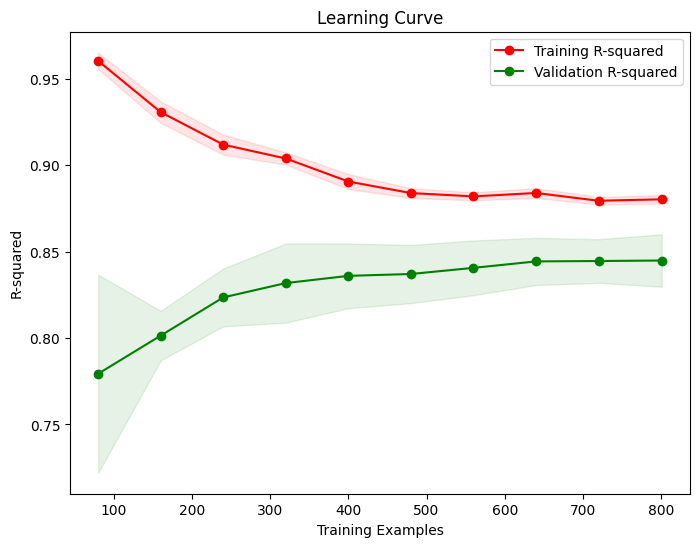

Best Hyperparameters:
{'bagging_temperature': 0.1, 'depth': 4.910862323790049, 'l2_leaf_reg': 2.965963085960178, 'learning_rate': 0.01}
Evaluation Metrics for Optimal Hyperparameters:
RMSE: 4321.785083632304
MAE: 2443.6258612780775
R^2: 0.8919793746875753


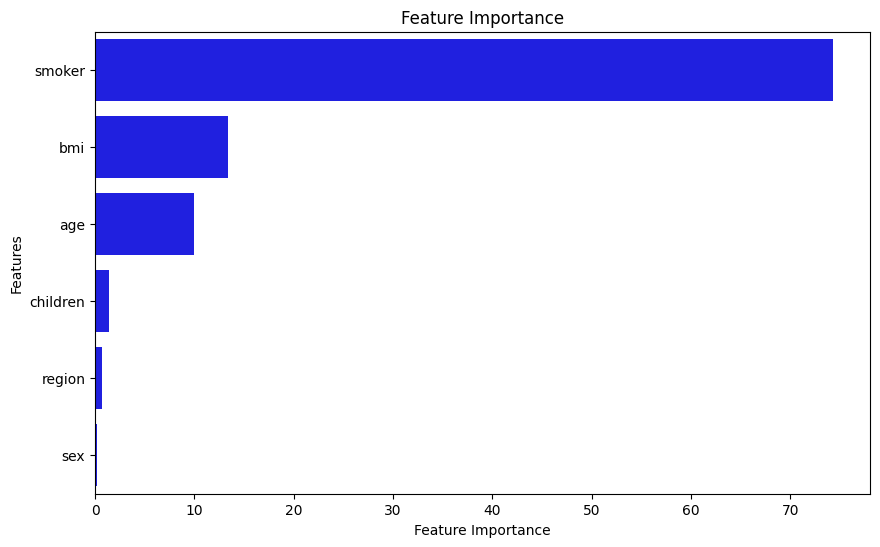




Please be patient
Stability checking of the model is running =========>


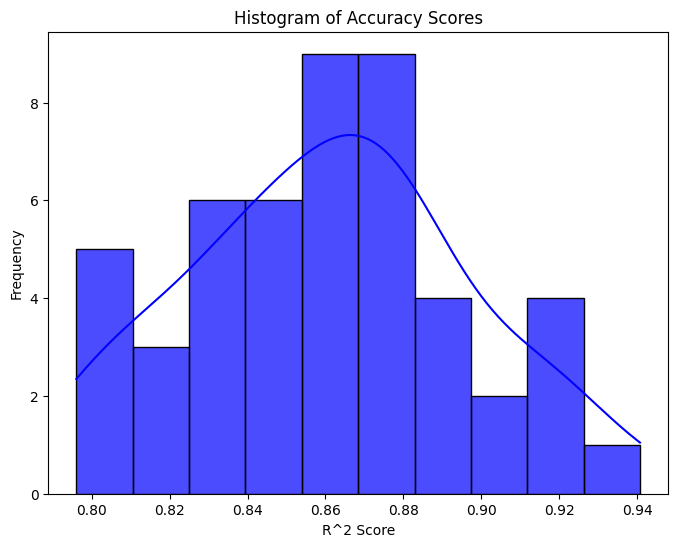

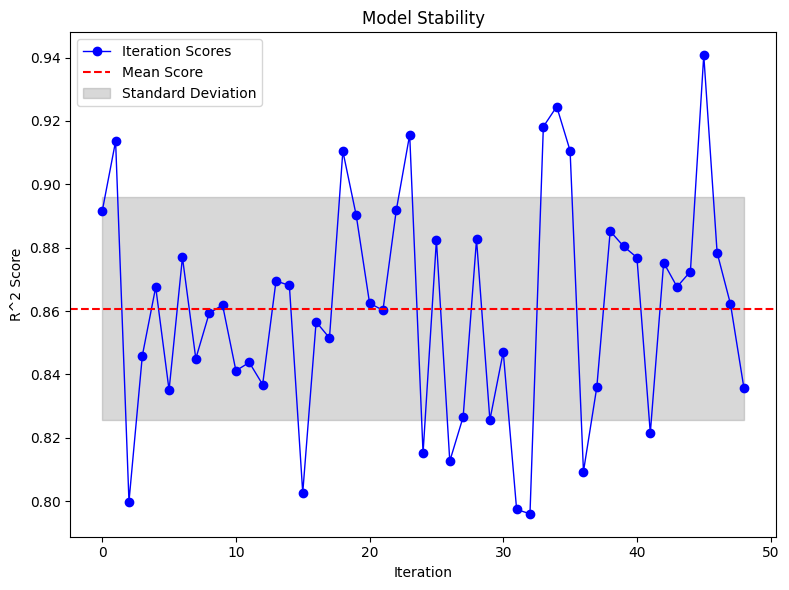



Stability Metrics For 50-folds Cross-Validation:
Mean Score: 0.8607996285579873
Max Score: 0.9407372886389658
Min Score: 0.7960313008550353
Standard Deviation of Scores: 0.035231068546155785


In [ ]:
# optimising the catboost regressor with bayesian search method
y_test, y_pred = ml.optimize_catboost(df)

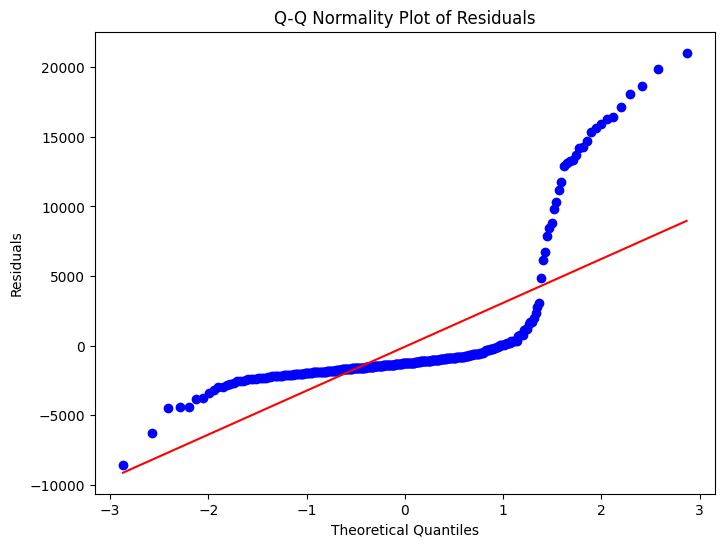

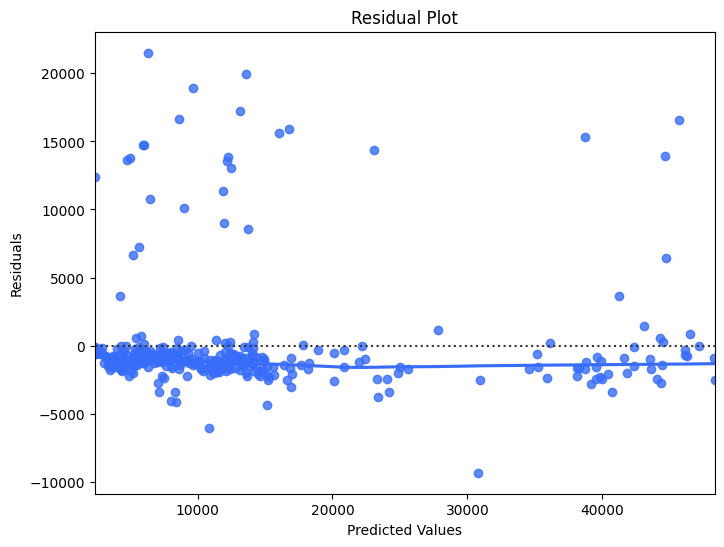

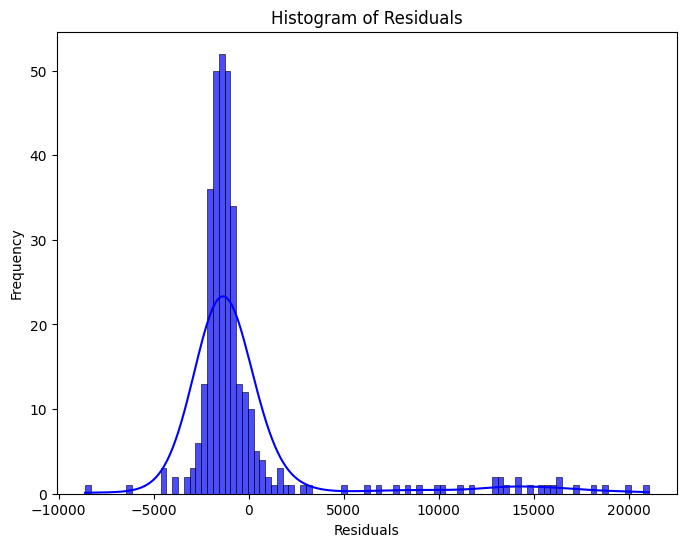

In [ ]:
plotter.plot_residual_analysis(y_pred, y_test)

## Model 2:
### RandomForest Regressor


|   iter    |  target   | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | -1.904e+0 | 4.873     | 9.556     | 7.856     | 319.4     |
| 2         | -2.028e+0 | 3.78      | 2.404     | 2.465     | 439.8     |
| 3         | -1.897e+0 | 6.006     | 7.373     | 2.165     | 486.5     |
| 4         | -1.982e+0 | 7.162     | 2.911     | 3.455     | 132.5     |
| 5         | -1.912e+0 | 4.521     | 5.723     | 5.456     | 181.1     |
| 6         | -1.943e+0 | 6.059     | 2.255     | 4.337     | 214.9     |
| 7         | -1.869e+0 | 5.28      | 8.067     | 3.597     | 281.4     |
| 8         | -1.944e+0 | 5.962     | 1.418     | 6.86      | 126.7     |
| 9         | -2.025e+0 | 3.325     | 9.54      | 9.725     | 413.8     |
| 10        | -1.943e+0 | 4.523     | 1.879     | 7.474     | 248.1     |
| 11        | -2.024e+0 | 7.445     | 1.495     | 3.413     | 296.9     |
| 12        | -2.029e+0 | 3.246     | 

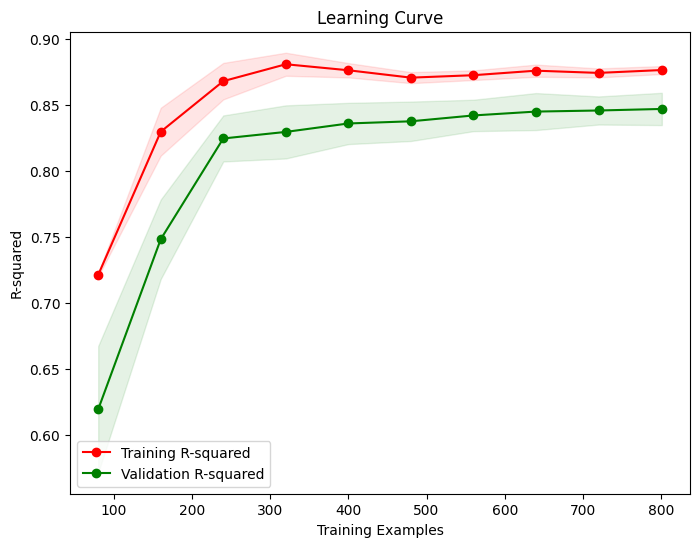

Best Hyperparameters:
{'max_depth': 5.28034992108518, 'min_samples_leaf': 8.066583652537123, 'min_samples_split': 3.597390257266878, 'n_estimators': 281.4054972861252}
Evaluation Metrics for Optimal Hyperparameters:
RMSE: 4323.552332441861
MAE: 2453.3765108182683
R^2: 0.8918910138141269


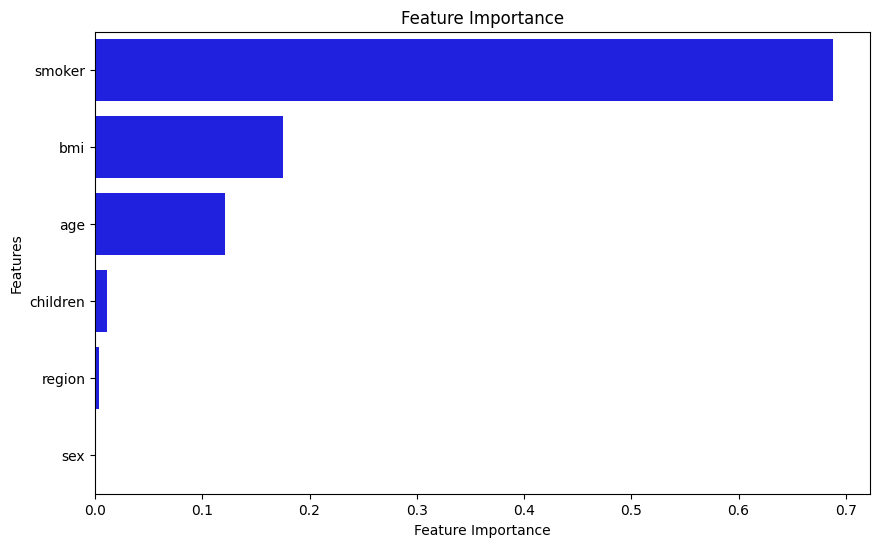




Please be patient
Stability checking of the model is running =========>


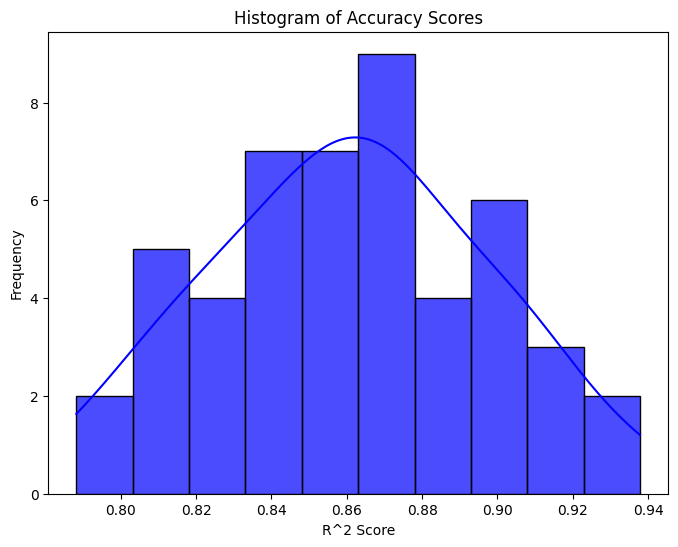

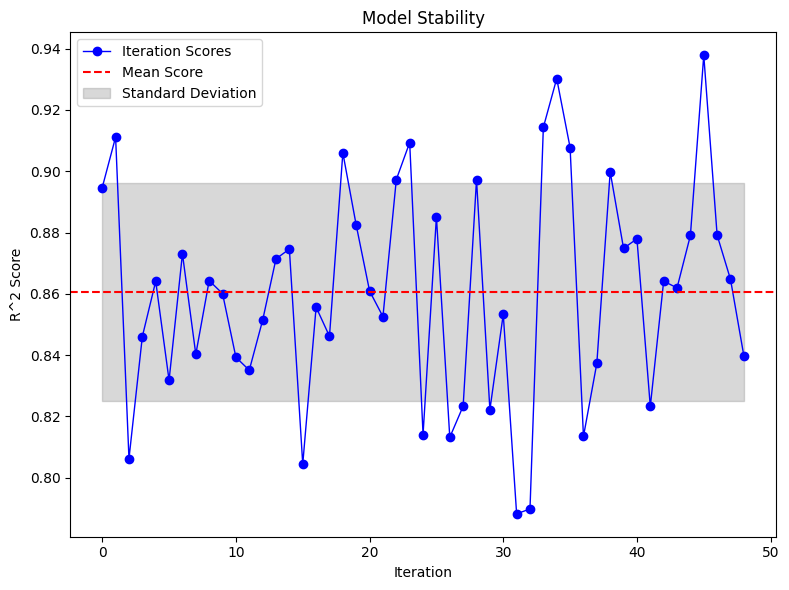



Stability Metrics For 50-folds Cross-Validation:
Mean Score: 0.8606118154747637
Max Score: 0.9378510513102593
Min Score: 0.7882048970745692
Standard Deviation of Scores: 0.035674246351270845


In [ ]:
y_test, y_pred = ml.optimize_random_forest(df)

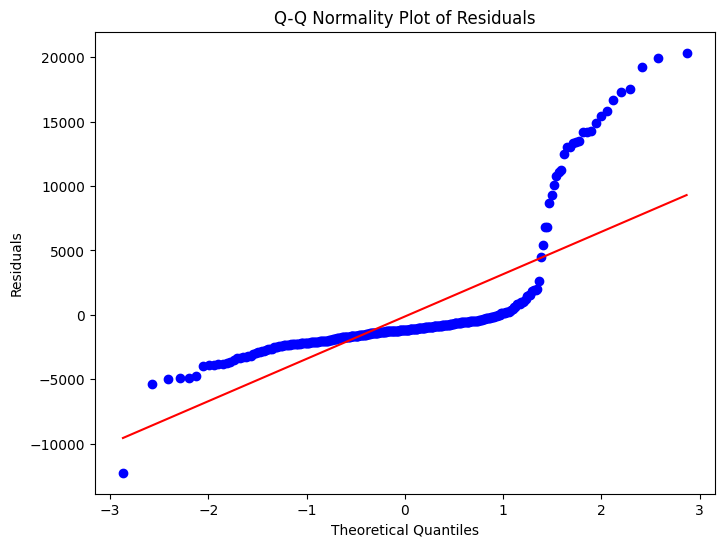

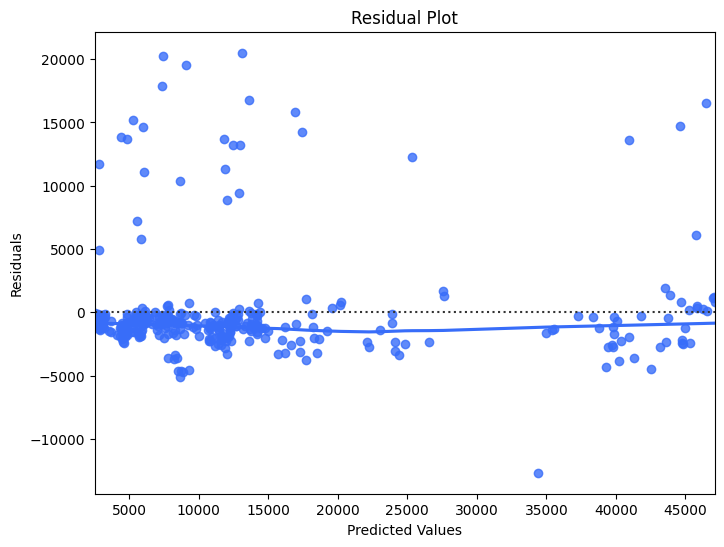

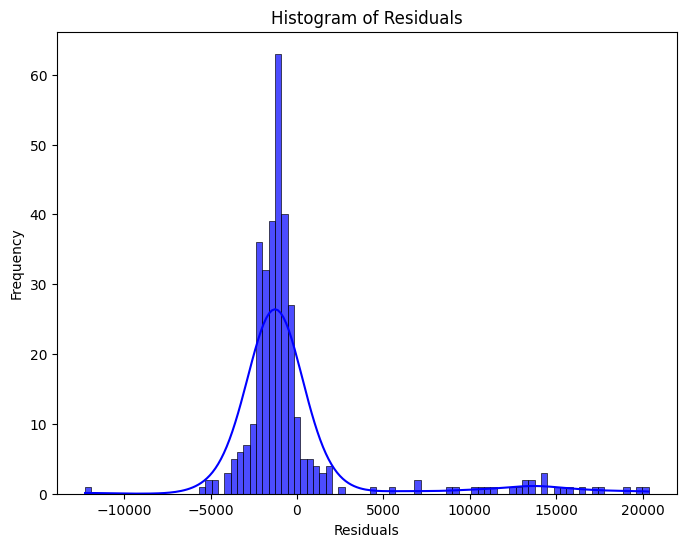

In [ ]:
plotter.plot_residual_analysis(y_pred, y_test)

## Model 3:
### GradientBoosting Regressor

|   iter    |  target   | learni... | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | -2.226e+0 | 0.08116   | 7.754     | 7.588     | 6.789     | 120.2     |
| 2         | -1.964e+0 | 0.03964   | 3.29      | 8.796     | 6.809     | 368.6     |
| 3         | -2.475e+0 | 0.01391   | 7.85      | 8.492     | 3.699     | 131.8     |
| 4         | -2.038e+0 | 0.04485   | 4.521     | 5.723     | 5.456     | 181.1     |
| 5         | -2.221e+0 | 0.1263    | 3.697     | 3.629     | 4.931     | 255.2     |
| 6         | -1.967e+0 | 0.1592    | 3.998     | 5.628     | 6.739     | 70.9      |
| 7         | -2.741e+0 | 0.1254    | 3.853     | 1.585     | 9.591     | 484.5     |
| 8         | -2.775e+0 | 0.1636    | 4.523     | 1.879     | 7.474     | 248.1     |
| 9         | -2.075e+0 | 0.03319   | 5.476     | 1.309     | 9.275     | 166.5     |
| 10        | -2.175e+0 | 0.1359    | 4.559     | 5.68

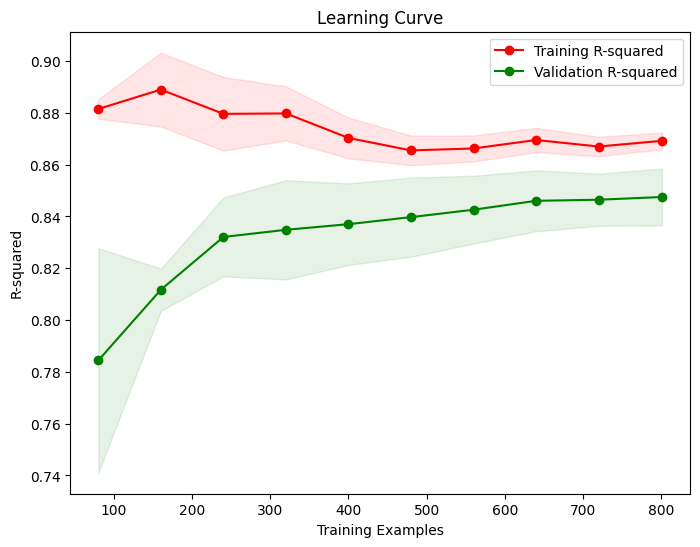

Best Hyperparameters:
{'learning_rate': 0.01, 'max_depth': 3.0619059678949703, 'min_samples_leaf': 7.807223661937439, 'min_samples_split': 7.094742017597785, 'n_estimators': 372.4369146093121}
Evaluation Metrics for Optimal Hyperparameters:
RMSE: 4397.363251816471
MAE: 2541.764869185273
R^2: 0.8881682708449602


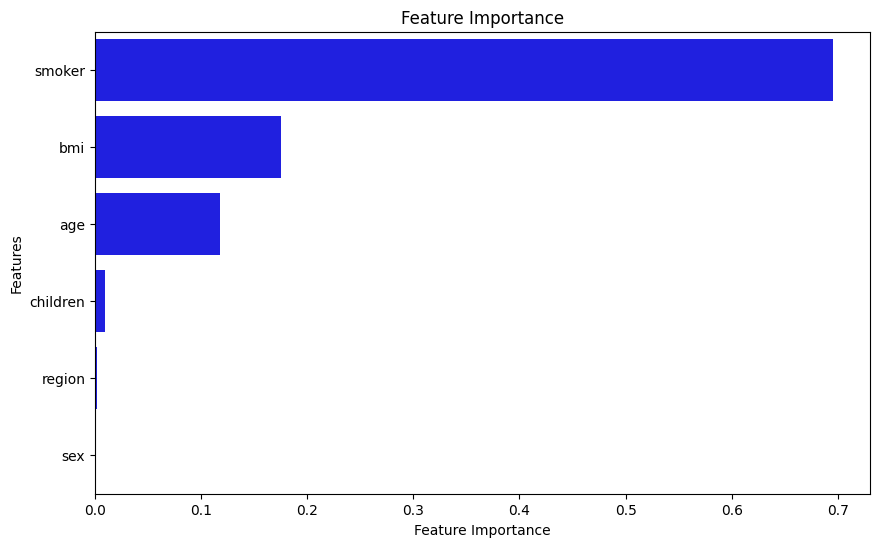




Please be patient
Stability checking of the model is running =========>


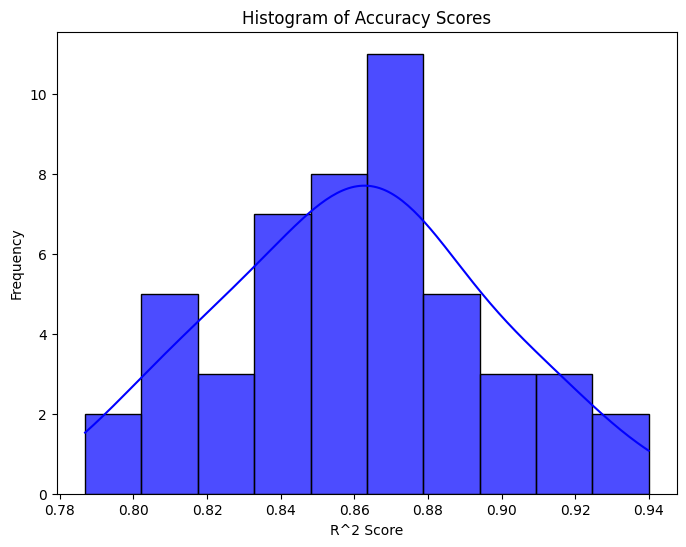

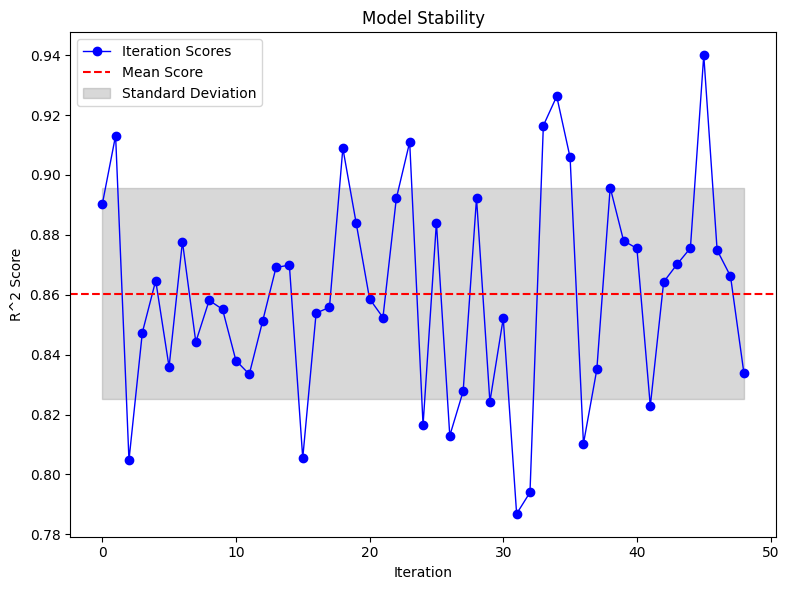



Stability Metrics For 50-folds Cross-Validation:
Mean Score: 0.8603466375068044
Max Score: 0.9399421556484319
Min Score: 0.786882901397224
Standard Deviation of Scores: 0.035207350630875704


In [ ]:
y_test, y_pred = ml.optimize_gradient_boosting(df)

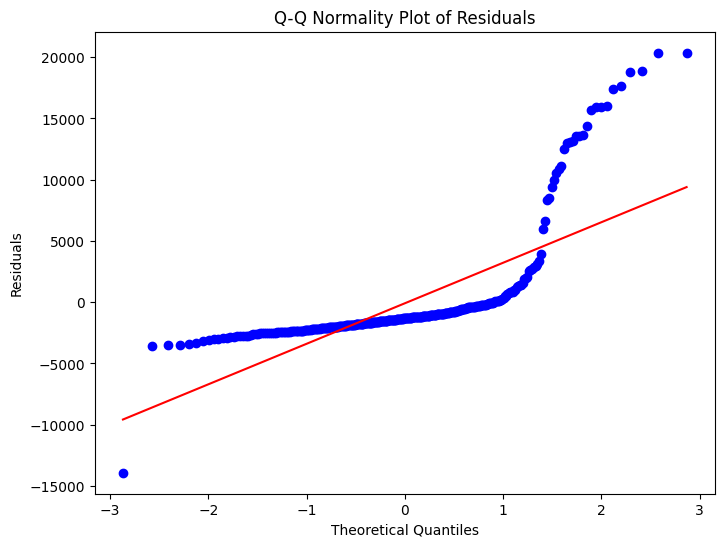

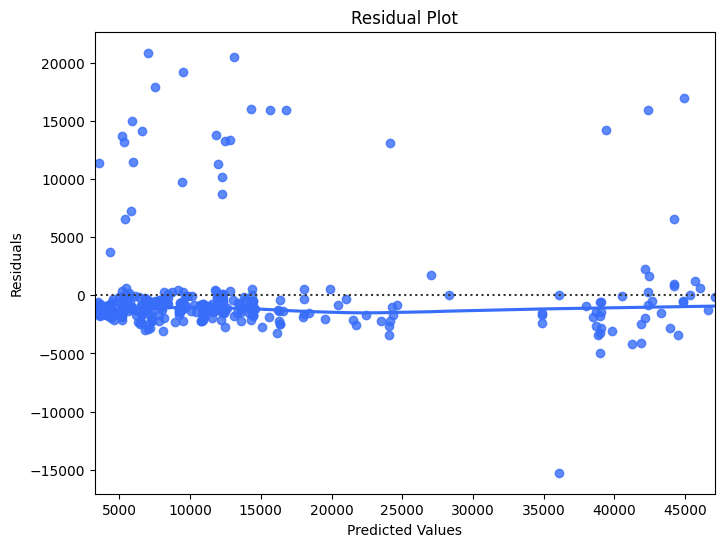

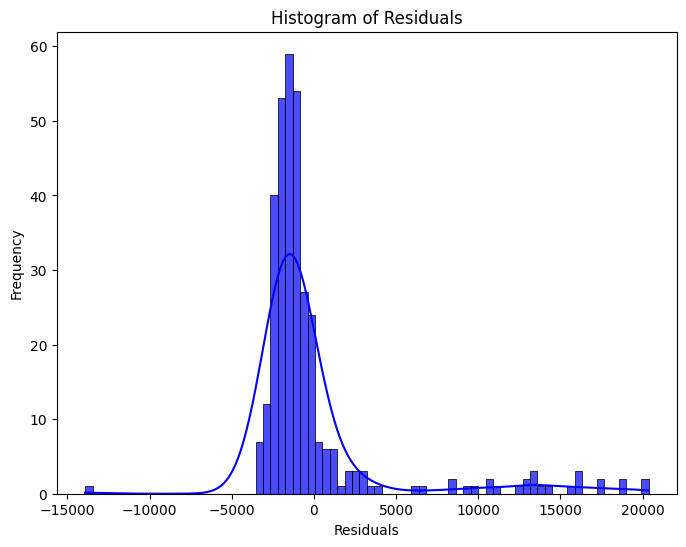

In [ ]:
plotter.plot_residual_analysis(y_pred, y_test)

## Model 4:
### Stacked Model Using Optimised Hyperparameters

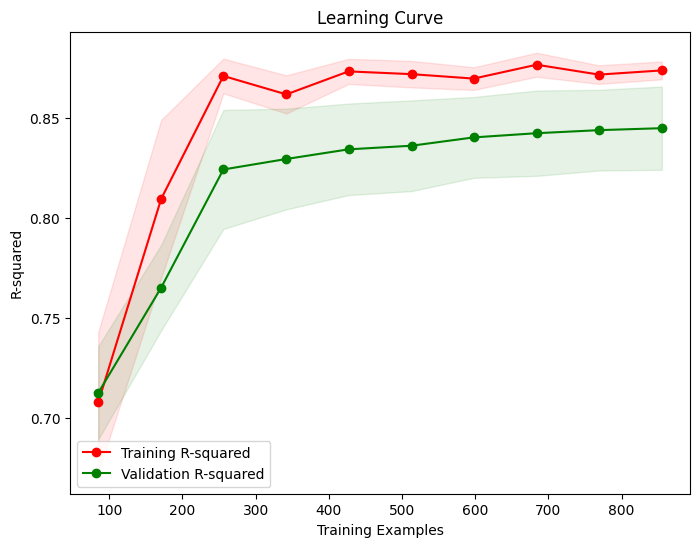

Evaluation Metrics for Stacking Model:
RMSE: 4171.863818676976
MAE: 2365.4718735574183
R^2: 0.9052850429050694


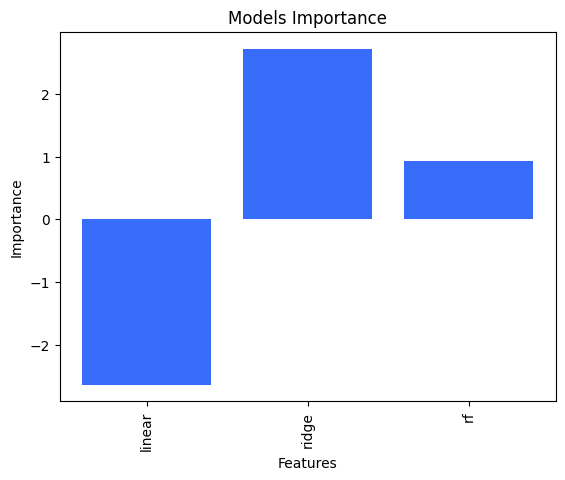

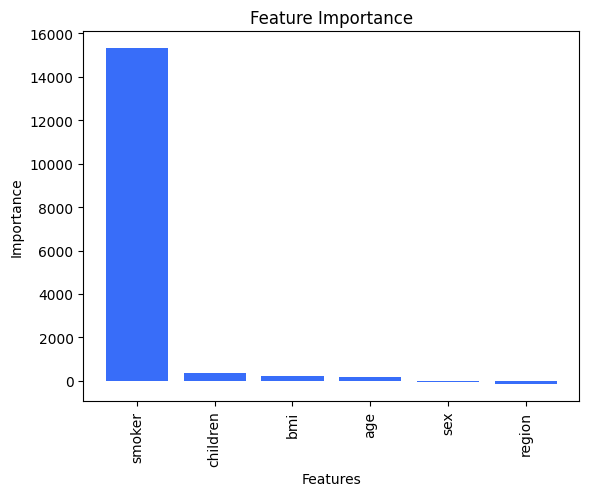




Please be patient
Stability checking of the model is running =========>


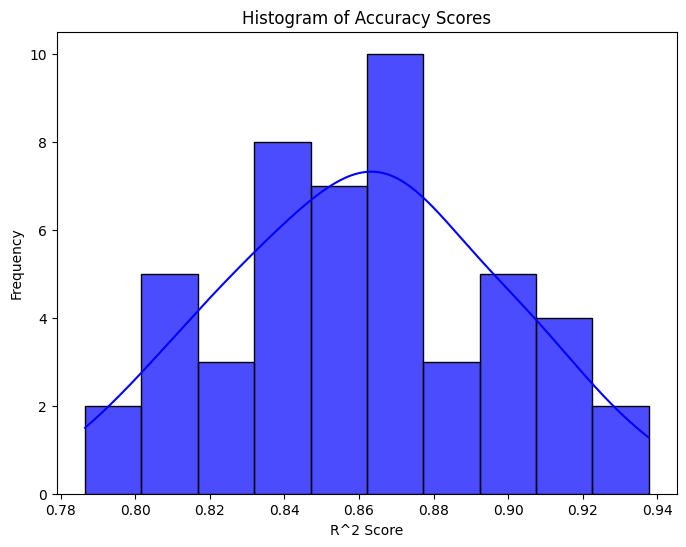

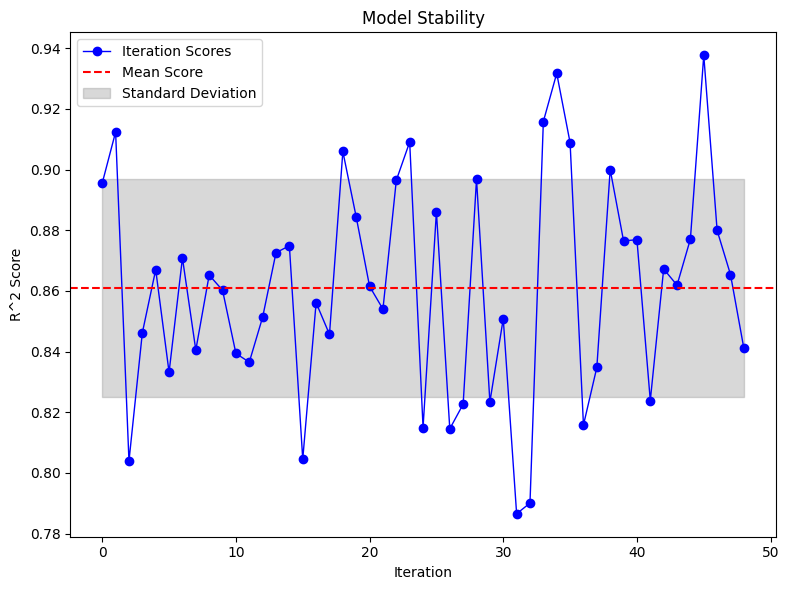



Stability Metrics For 50-folds Cross-Validation:
Mean Score: 0.8609926405332571
Max Score: 0.9377196627107101
Min Score: 0.7865267146899964
Standard Deviation of Scores: 0.035842379400450375


In [ ]:
y_test, y_pred = ml.optimize_stacking_model(df)

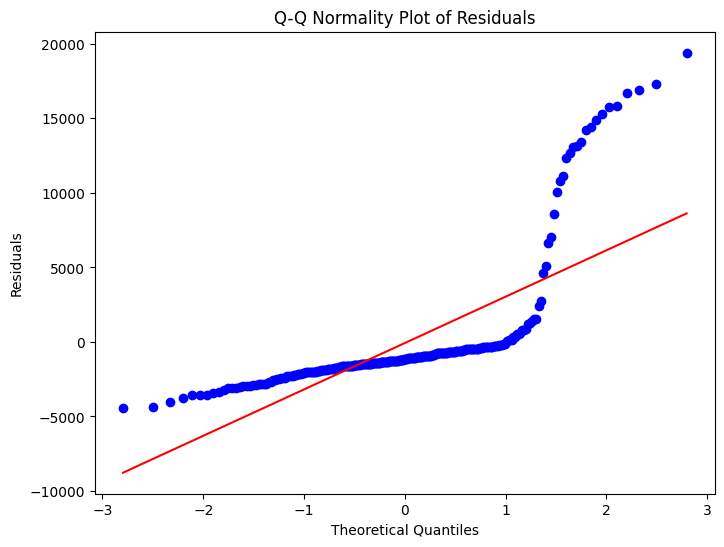

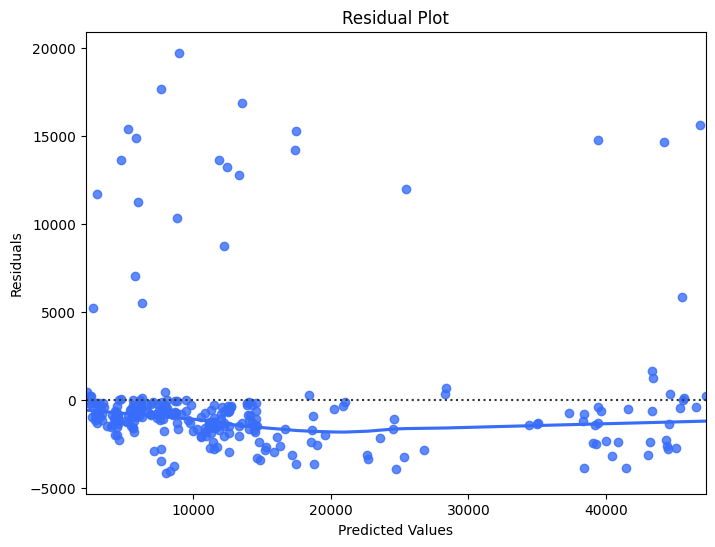

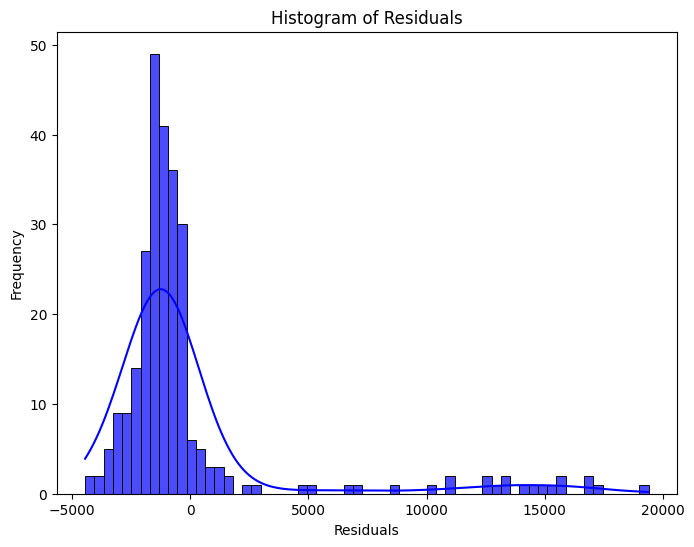

In [ ]:
plotter.plot_residual_analysis(y_pred, y_test)

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

#### **Analysis**:

 - **Residuals**:
$$ \varepsilon_i = y_i - \hat{y}_i $$
- $\varepsilon_i$ represents the residual for the $ith$ observation.
- $y_i$ is the actual observed value for the $ith$ observation.
- $\hat{y}_i$ is the predicted or estimated value for the $ith$ observation.<br><br>

**Interpretation**:

Upon analyzing the residual plots for all of the models, we observe a consistent pattern indicating that the majority of our residuals are negative. This pattern suggests that our models tend to overestimate the medical costs. Several underlying factors could contribute to this phenomenon. One prevalent reason is the potential bias in our training dataset, likely stemming from a suboptimal data collection process. Additionally, we have previously examined the dataset for outliers and confirmed that there are none present.<br><br>

While exploring the possibility of outliers, we reached the same conclusion that our dataset does not contain any.<br><br>

Other factors that could potentially lead to this overestimation include inadequate regularization or the complexity of the models. However, it is worth noting that all of our models incorporate satisfactory built-in regularization processes. Furthermore, these models exhibit complexity in terms of the algorithms employed for data processing. Nevertheless, we observed a similar pattern even in simpler models such as linear regression in the basic machine learning section. Hence, we cannot solely attribute this issue to model complexity.<br><br>

Taking all factors into account, the most plausible explanation for this overestimation is likely to be biases and data quality issues present within the dataset. However, it is important to note that when considering the q-q normality-residual and histogram plots of the models, we can observe that all of the models performed surprisingly well in this regression task on this dataset. Therefore, the residual plots equally support the notion that our models are well-fitted to our problem.<br><br><br><br>


- **Model Stability**:

The stability experiments conducted on all the aforementioned models demonstrate their good performance. The average mean R-squared value for a 50-fold cross-validation is approximately 86%, indicating a high level of predictive accuracy. While certain models, such as the stacked model, slightly outperformed others, it is important to note that the standard deviation across all models is very small, at 0.035. The minimal differences in the standard deviation of R-squared for this cross-validation indicate that there is no significant variation among the models. Therefore, it is not possible to determine the best model based solely on this experiment. Instead, we can confidently state that all the models exhibit stability and robustness in their performance.<br><br><br><br>


- **Learning Curve**:

The learning curves for all the models illustrate a positive learning trend in our algorithms. In each model, we observe that the R-squared values for both the training and test sets converge to an optimal point. This convergence indicates that our models do not suffer from overfitting or underfitting issues. The learning curves demonstrate that the models have effectively captured the underlying patterns in the data and achieved a good balance between capturing the training data's nuances and generalizing well to unseen test data. Overall, the learning curves indicate that our models have learned the data well without exhibiting any significant bias or variance problems.<br><br><br><br>


#####  **Final Decision Based on RMSE, MAE, R-Squared**


Model 1: Catboost Regressor
The Catboost Regressor achieved the following evaluation metrics:
 - RMSE: 4321.78
 - MAE: 2443.62
 - R^2: 0.8919

Model 2: RandomForest Regressor
The RandomForest Regressor achieved the following evaluation metrics:
 - RMSE: 4323.55
 - MAE: 2453.37
 - R^2: 0.8918

Model 3: GradientBoosting Regressor
The GradientBoosting Regressor achieved the following evaluation metrics:
 - RMSE: 4397.36
 - MAE: 2541.76
 - R^2: 0.8881

Model 4: Stacked Model
The Stacked Model achieved the following evaluation metrics:
 - RMSE: 4171.86
 - MAE: 2365.47
 - R^2: 0.9052

Comparing the evaluation metrics, we can see that the Stacked Model (Model 4) outperforms the other models in terms of RMSE, MAE, and R-squared. It has the lowest values of RMSE and MAE, indicating better accuracy and precision in predicting the target variable. Moreover, it achieves the highest R-squared value, which signifies a better fit to the underlying data.

Therefore, based on the evaluation metrics, the Stacked Model emerges as the best model among the four evaluated models. It showcases superior performance in terms of predictive accuracy and model fit. However, it is worth mentioning that the Stacked Model is computationally more expensive compared to the other models. This factor should be taken into consideration when considering further analyses or tasks such as synthetic data analysis. In such cases, the Catboost Regressor (Model 1) may be preferred due to its faster execution time compared to the Stacked Model.

# ANN Regressor

Epoch 1/40
63/63 [==============================] - 3s 10ms/step - loss: 304586720.0000 - val_loss: 327394848.0000
Epoch 2/40
63/63 [==============================] - 0s 6ms/step - loss: 105980032.0000 - val_loss: 60121016.0000
Epoch 3/40
63/63 [==============================] - 0s 5ms/step - loss: 42398680.0000 - val_loss: 34630116.0000
Epoch 4/40
63/63 [==============================] - 0s 6ms/step - loss: 36290592.0000 - val_loss: 30283516.0000
Epoch 5/40
63/63 [==============================] - 0s 5ms/step - loss: 33376128.0000 - val_loss: 31434346.0000
Epoch 6/40
63/63 [==============================] - 0s 5ms/step - loss: 33464618.0000 - val_loss: 27767836.0000
Epoch 7/40
63/63 [==============================] - 0s 5ms/step - loss: 30718528.0000 - val_loss: 30960188.0000
Epoch 8/40
63/63 [==============================] - 0s 6ms/step - loss: 31081780.0000 - val_loss: 27815126.0000
Epoch 9/40
63/63 [==============================] - 0s 5ms/step - loss: 32593830.0000 - val_loss: 25

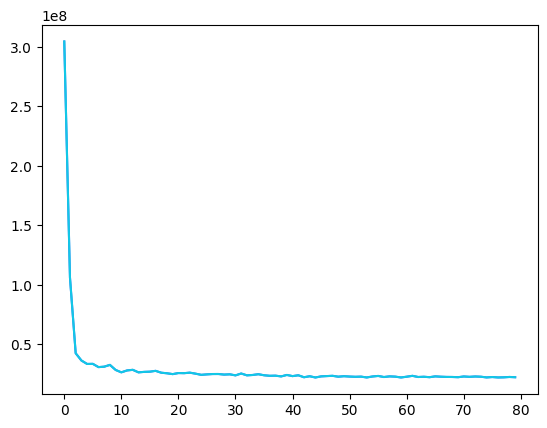

RMSE: 4434.00763128305
R-squared: 0.8862966587194856


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(['medicalCost'], axis=1)
y = df.medicalCost

# Split your dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Perform feature scaling (optional but recommended for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


i = Input(shape=X_train.shape[1])
x = Dense(128, activation="relu")(i)
x = Dropout(0.30)(x)
x = Dense(64, activation="relu")(x)
x = Dense(32, activation="relu")(x)
x = Dense(5, activation="relu")(x)
x = Dense(64, activation="relu")(x)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)
x = Dense(16, activation="relu")(x)
x = Dense(1)(x)

model = Model(i, x)

# Train the model
results = []
for i in [1, 5]:
    model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.001 / i))
    r = model.fit(
        x=X_train_scaled,
        y=y_train,
        validation_data=(X_test_scaled, y_test),
        batch_size=16,
        epochs=40,
        # verbose=False
    )
    results.append(r.history["loss"])


flatten_result = [i for j in results for i in j]

# Make predictions
predictions = model.predict(X_test_scaled)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)


print(model.summary())


plt.plot(flatten_result, label='loss')
plt.plot(flatten_result, label='val_loss')
plt.show()

print("RMSE:", rmse)
print("R-squared:", r2)


1/1 [==============================] - 0s 443ms/step


1/1 [==============================] - 0s 217ms/step


1/1 [==============================] - 1s 882ms/step
Average RMSE: 4525.021510983338
Average R-squared: 0.8235194538525649


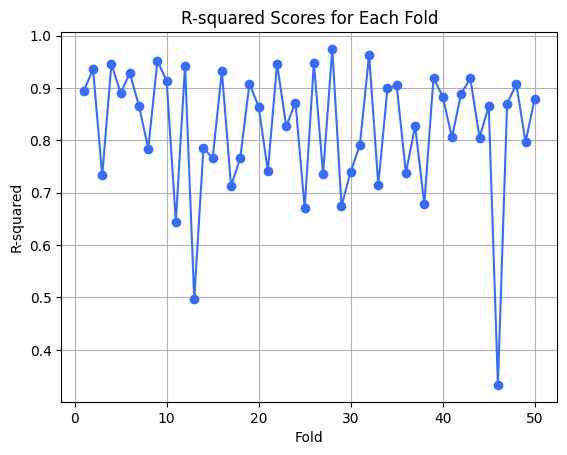

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = df.drop(['medicalCost'], axis=1)
y = df.medicalCost

# Perform feature scaling (optional but recommended for neural networks)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of folds for k-fold cross-validation
n_splits = 50
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Create lists to store results from each fold
rmse_scores = []
r2_scores = []

# Create a list to store R-squared scores for each fold
fold_r2_scores = []

# Iterate over the folds
for train_index, test_index in kf.split(X_scaled):
    # Split the data into training and testing sets for the current fold
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Build the model architecture
    i = Input(shape=X_train.shape[1])
    x = Dense(128, activation="relu")(i)
    x = Dropout(0.30)(x)
    x = Dense(64, activation="relu")(x)
    x = Dense(32, activation="relu")(x)
    x = Dense(5, activation="relu")(x)
    x = Dense(64, activation="relu")(x)
    x = Dense(128, activation="relu")(x)
    x = Dense(64, activation="relu")(x)
    x = Dense(16, activation="relu")(x)
    x = Dense(1)(x)
    model = Model(i, x)

    # Compile and train the model
    model.compile(loss="mean_squared_error", optimizer=Adam(learning_rate=0.001))
    model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=16, epochs=40, verbose=0)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Calculate evaluation metrics for the current fold
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)

    # Append the scores to the lists
    rmse_scores.append(rmse)
    r2_scores.append(r2)

    # Append the R-squared score for the current fold
    fold_r2_scores.append(r2)

# Calculate the average scores across all folds
avg_rmse = np.mean(rmse_scores)
avg_r2 = np.mean(r2_scores)

print("Average RMSE:", avg_rmse)
print("Average R-squared:", avg_r2)

# Plot the R-squared scores for each fold
plt.plot(range(1, n_splits + 1), fold_r2_scores, marker='o')
plt.xlabel("Fold")
plt.ylabel("R-squared")
plt.title("R-squared Scores for Each Fold")
plt.grid(True)
plt.show()


##### **Analysis:**
The analysis reveals that our ANN Regression model achieved a significant performance with an R-squared value of 88.62% on our dataset. Remarkably, this level of accuracy was attained with just 80 epochs, indicating that the model is not computationally intensive. However, despite this notable performance, the accuracy and RMSE of the ANN Regression model still lag behind those of other models such as boosting, bagging, and stacking, which we have previously implemented. Consequently, we maintain our preference for the stacked model as the most appropriate choice for this dataset.

Additionally, the 50-fold Stability test conducted on our ANN Regression model suggests that the model exhibits low stability. This implies that the performance of our model is highly sensitive to the selection of the train and test split. The average R-squared value for the 50-fold cross-validation is 82%, which is not considered significant. Therefore, this further supports the superiority of the stacking model over the ANN regressor for this particular case.

 # Synthetic Data Generation and Model Comparison


### **Pipeline:**

**Step 1: Data Synthesis and Sampling**

In this step, we utilize the Synthetic Data Vault (SDV) library, specifically the CTGAN Synthesiser (CTGANSynthesiser), to generate synthetic data based on our original dataset. The CTGANSynthesiser is a type of generative adversarial network (GAN) model designed specifically for tabular data. By training the CTGANSynthesiser on our dataset for a total of 20,000 epochs, the model learns the underlying patterns and distribution of the original data. Once the training is complete, we use the trained model to synthesize 20,000 instances of data that mimic the characteristics of the original dataset.

**Step 2: Synthesized Data Quality Assessment**

To evaluate the quality of the synthesized data, we employ built-in methods provided by the SDV library. These methods allow us to compare the overall quality of the synthesized sample with the original population. By comparing statistical properties, such as mean, standard deviation, and correlation, we can assess the similarity between the synthesized data and the original dataset. Additionally, we utilize the Kolmogorov-Smirnov test, a statistical test for comparing distributions, specifically the Feature Distribution Comparison. This test measures the similarity of the distributions of each feature in the synthesized data compared to the corresponding feature in the original dataset. It helps us assess how well the synthesized data captures the distributional characteristics of the original data.

**Step 3: Model Building and Evaluation**

In this step, we construct multiple models using a combination of the original dataset and varying percentages of the synthesized data. By incorporating synthesized data into the training process, we aim to explore the impact of increasing proportions of synthetic data on the performance of predictive models. We create a series of models, each with different proportions of synthesized data:

- Model 1: Original dataset + 7.5% synthesized data
- Model 2: Original dataset + 15% synthesized data
- Model 3: Original dataset + 20% synthesized data
- Model 4: Original dataset + 25% synthesized data
- Model 5: Original dataset + 30% synthesized data
- Model 6: Original dataset + 35% synthesized data

To compare the performance of these models, we employ the CatBoost Regressor, a powerful gradient boosting algorithm. We evaluate the models using two common regression metrics which are RMSE and R-Squared.

To ensure robust evaluation, we employ a 50-fold cross-validation approach. This involves splitting the data into 50 subsets, performing training and evaluation on each subset, and then averaging the performance metrics across all folds.

By following this pipeline, we aim to investigate the impact of incorporating synthesized data on the performance of predictive models. This approach allows us to explore the potential benefits of utilizing synthetic data in improving model accuracy and generalization.

## Generating Synthetic Data

## **Note**:

The code snippet provided below required a substantial amount of time, approximately two hours, to execute. Consequently, we ran the code once and stored the output of the synthesizer model in a file named 'my_synthesizer.pkl'. This file contains the precomputed results, allowing us to avoid rerunning the time-consuming process every time we need to synthesize new data.

By leveraging our pretrained model and importing the stored results, we can now efficiently generate synthesized data without expending additional time and computational resources. This approach significantly improves our workflow efficiency.

As a result, the code block responsible for synthesizing data has been commented out since it is no longer required for our current data synthesis tasks.

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/ML Project/insurance.csv')

In [ ]:
# from sdv.metadata import SingleTableMetadata

# metadata = SingleTableMetadata()

In [ ]:
# metadata.detect_from_dataframe(data=df)

In [ ]:
# python_dict = metadata.to_dict()

In [ ]:
# metadata.validate()

In [ ]:
# metadata

In [ ]:
# from sdv.single_table import CTGANSynthesizer

# # synthesizer = CTGANSynthesizer(metadata)


# synthesizer = CTGANSynthesizer(
#     metadata, # required
#     enforce_rounding=False,
#     epochs=50000,
#     verbose=True
# )


# synthesizer.fit(df)

# synthetic_data = synthesizer.sample(num_rows=20000)

In [ ]:
# synthetic_data.to_csv('/content/drive/MyDrive/ML Project/Synthetic-medical_insurance200000_50000epoch.csv')

In [ ]:
# synthesizer.save(
#     filepath='/content/drive/MyDrive/ML Project/50000_synthesizer.pkl'
# )

## Import And Qualify Generated Data:

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML Project/insurance.csv')

In [ ]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()

In [ ]:
metadata.detect_from_dataframe(data=df)

In [ ]:
python_dict = metadata.to_dict()

In [ ]:
metadata.validate()

In [ ]:
# synthetic_data = df_augmented.drop(['Unnamed: 0'], axis=1)

In [ ]:
from sdv.lite import SingleTablePreset

synthesizer = SingleTablePreset.load(
    filepath='/content/drive/MyDrive/ML Project/my_synthesizer.pkl'
)

In [ ]:
synthetic_data = synthesizer.sample(
    num_rows=10000,
    batch_size=1000
)

Sampling rows: 100%|██████████| 10000/10000 [00:01<00:00, 8634.47it/s]


In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data=df,
    synthetic_data=synthetic_data,
    metadata=metadata)

Creating report: 100%|██████████| 4/4 [00:00<00:00, 21.05it/s]



Overall Quality Score: 92.17%

Properties:
Column Shapes: 93.78%
Column Pair Trends: 90.56%


In [ ]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data,
    column_name='medicalCost',
    metadata=metadata
)


fig.show()

In [ ]:
import numpy as np
chosen_idx = np.random.choice(9999, replace=False, size=df.shape[0])
sampled_aug = synthetic_data.iloc[chosen_idx]

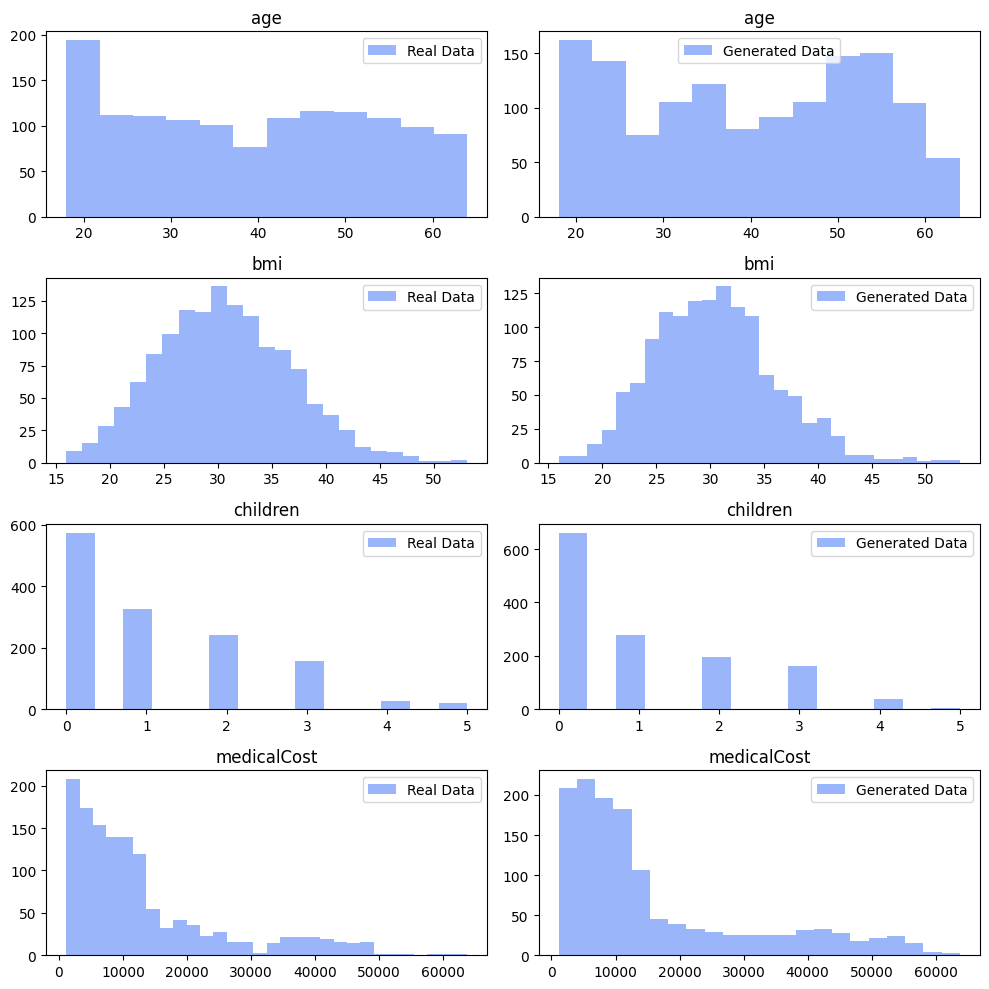

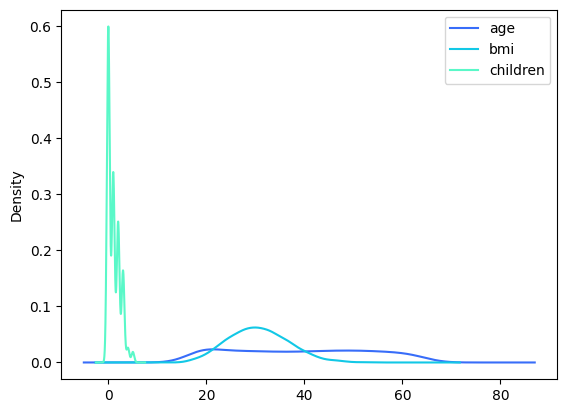

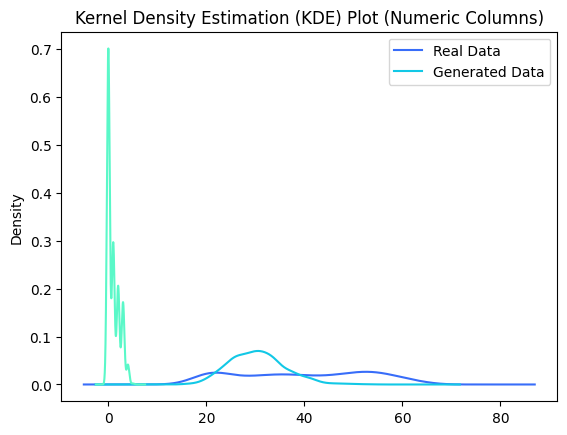

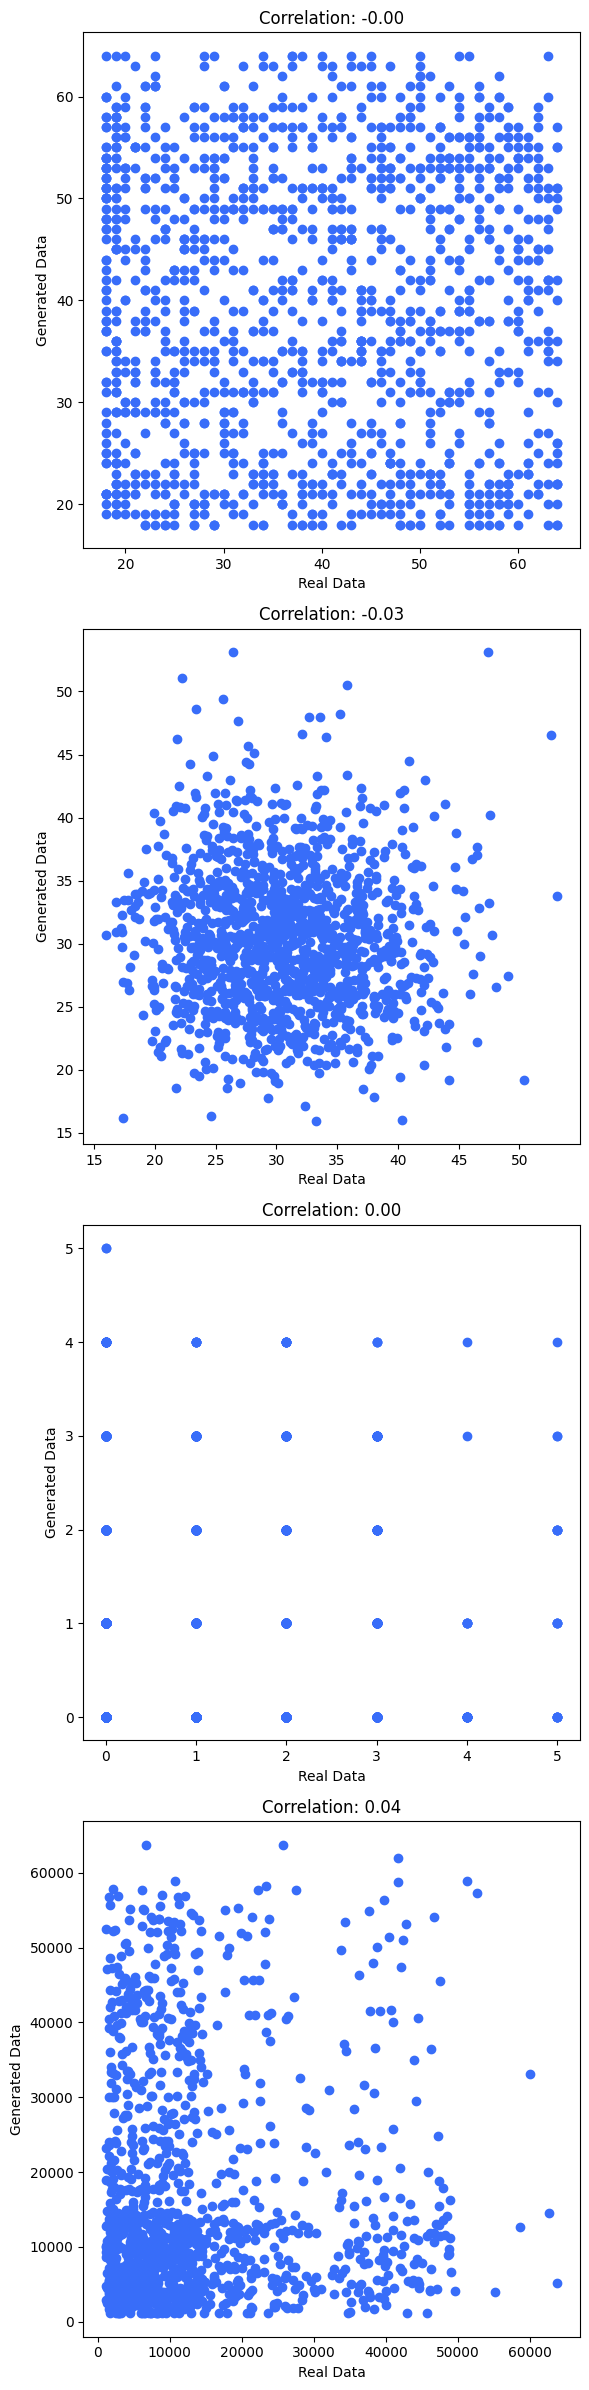

Feature Distribution Comparison (Kolmogorov-Smirnov test) - Numeric Columns:
             KS Statistic   p-value
age              0.048580  0.085035
bmi              0.054559  0.037248
children         0.065770  0.006117
medicalCost      0.073991  0.001312
Column: sex
Unique values (Real Data): ['female' 'male']
Unique values (Generated Data): ['female' 'male']

Column: smoker
Unique values (Real Data): ['yes' 'no']
Unique values (Generated Data): ['no' 'yes']

Column: region
Unique values (Real Data): ['southwest' 'southeast' 'northwest' 'northeast']
Unique values (Generated Data): ['southwest' 'northeast' 'southeast' 'northwest']



In [ ]:
plotter = visualisation()
# Evaluate resemblance
plotter.evaluate_resemblance(df, sampled_aug)


##### **Analysis:**

The overall quality score of 92.19% indicates a high level of accuracy between the synthesized data and the original real data. This score reflects the overall similarity and closeness between the two datasets. Furthermore, the individual properties evaluated further support the quality of the synthesized data. The column shapes, representing the data distribution, were found to be 93.79% similar, indicating that the synthesized data closely resembles the original data in terms of how values are distributed. The column pair trends, measuring the relationships and patterns between pairs of columns, demonstrated a 90.59% similarity. These results suggest that the synthesized data captures the essential characteristics and trends present in the real data. Furthermore, comparing the distribution of synthesised data with original data, we can see a strong similarity between the features' distributions.

Additionally, the Kolmogorov-Smirnov (KS) test was performed on the numeric columns to assess the quality of their distributions. The KS statistic and p-values were calculated for each numeric column. The KS statistic represents the maximum discrepancy between the cumulative distribution functions of the real and synthesized data. In this case, the KS statistics were relatively low, indicating a close match between the distributions. Furthermore, the p-values were also analyzed, and higher values indicated a stronger similarity between the distributions. These results provide evidence that the numeric columns in the synthesized data accurately represent the original data's distributional properties.

Overall, based on the evaluation results, it can be concluded that the synthesized data is of high quality and significance. The overall quality score, along with the assessment of column shapes and column pair trends, indicates a close resemblance between the synthesized data and the original real data. Moreover, the Kolmogorov-Smirnov test on the numeric columns reveals a strong similarity in their distributions. This implies that the synthesized data captures essential statistical characteristics, making it suitable for various data analysis tasks. These findings provide confidence in utilizing the synthesized data as a reliable substitute for the original real data in subsequent analyses and decision-making processes.

## Modelling and Evaluation:

In [ ]:
# initialize the class
preprocessor = preprocesing()

In [ ]:
# converting strings to categorical data
df = preprocessor.string_to_categorical(df)
aug_df = preprocessor.string_to_categorical(sampled_aug)


In [ ]:
# conver categorical data to numerics
df, col_dic = preprocessor.categorical_to_numeric(df)
df_aug, col_dic_aug = preprocessor.categorical_to_numeric(aug_df)

In [ ]:
col_dic

{'sex': {0: 'female', 1: 'male'},
 'smoker': {0: 'no', 1: 'yes'},
 'region': {0: 'northeast', 1: 'northwest', 2: 'southeast', 3: 'southwest'}}

In [ ]:
col_dic_aug

{'sex': {0: 'female', 1: 'male'},
 'smoker': {0: 'no', 1: 'yes'},
 'region': {0: 'northeast', 1: 'northwest', 2: 'southeast', 3: 'southwest'}}

### %7.5 synthetised data

In [ ]:
import numpy as np
chosen_idx = np.random.choice(1337, replace=False, size=100)
sampled_auggg = df_aug.iloc[chosen_idx]

merged_df = pd.concat([df, sampled_auggg])
merged_df.reset_index(inplace=True, drop=True)
merged_df = merged_df.sample(frac=1).reset_index(drop=True)

|   iter    |  target   | baggin... |   depth   | l2_lea... | learni... |
-------------------------------------------------------------------------
| 1         | -2.86e+07 | 0.4371    | 7.754     | 7.347     | 0.06388   |
| 2         | -2.763e+0 | 0.2404    | 3.78      | 0.675     | 0.08796   |
| 3         | -3.322e+0 | 0.641     | 6.54      | 0.3038    | 0.09729   |
| 4         | -2.616e+0 | 0.8492    | 4.062     | 1.9       | 0.02651   |
| 5         | -2.701e+0 | 0.3738    | 5.624     | 4.376     | 0.03621   |
| 6         | -2.611e+0 | 0.6507    | 3.697     | 2.992     | 0.04297   |
| 7         | -2.957e+0 | 0.5105    | 6.926     | 2.077     | 0.05628   |
| 8         | -2.56e+07 | 0.6332    | 3.232     | 6.115     | 0.02535   |
| 9         | -2.94e+07 | 0.1585    | 7.744     | 9.66      | 0.08276   |
| 10        | -2.602e+0 | 0.3742    | 3.488     | 6.874     | 0.04961   |
| 11        | -2.54e+07 | 1.0       | 3.0       | 10.0      | 0.01      |
| 12        | -2.673e+0 | 0.2023    | 

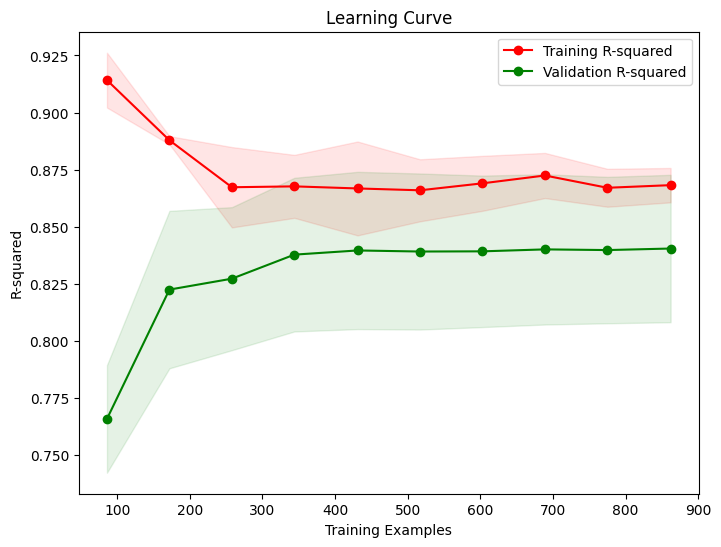

Best Hyperparameters:
{'bagging_temperature': 1.0, 'depth': 3.0, 'l2_leaf_reg': 4.545612465311489, 'learning_rate': 0.01}
Evaluation Metrics for Optimal Hyperparameters:
RMSE: 5025.544714047743
MAE: 2715.791253170095
R^2: 0.8466026118018359


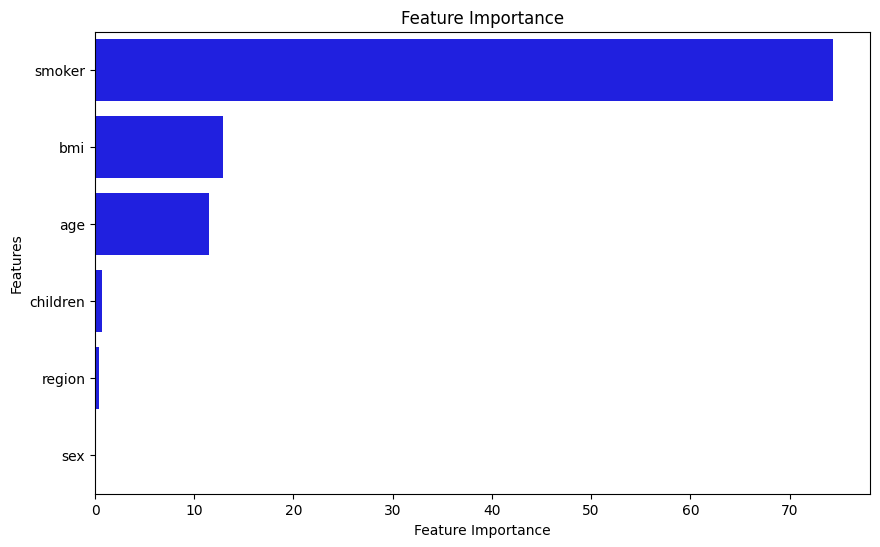




Please be patient
Stability checking of the model is running =========>


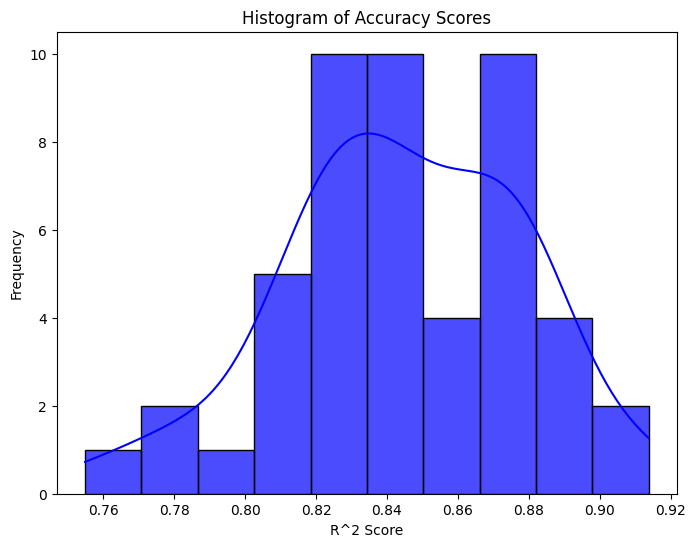

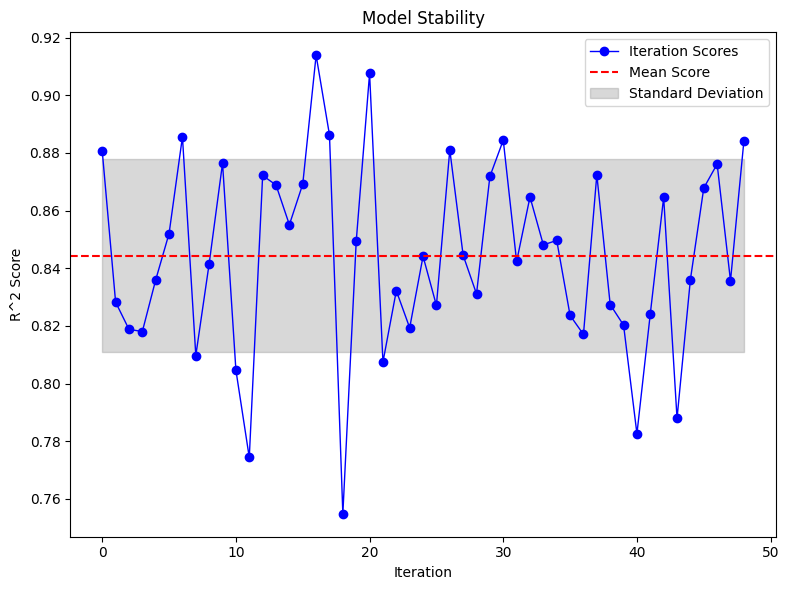



Stability Metrics For 50-folds Cross-Validation:
Mean Score: 0.8443031546990898
Max Score: 0.913844837583634
Min Score: 0.754855371087833
Standard Deviation of Scores: 0.033458664764064394


In [ ]:
y_test, y_pred = ml.optimize_catboost(merged_df)

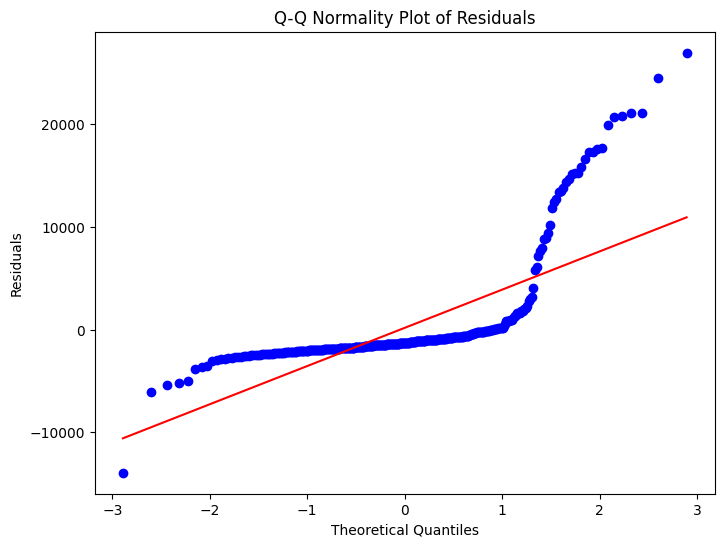

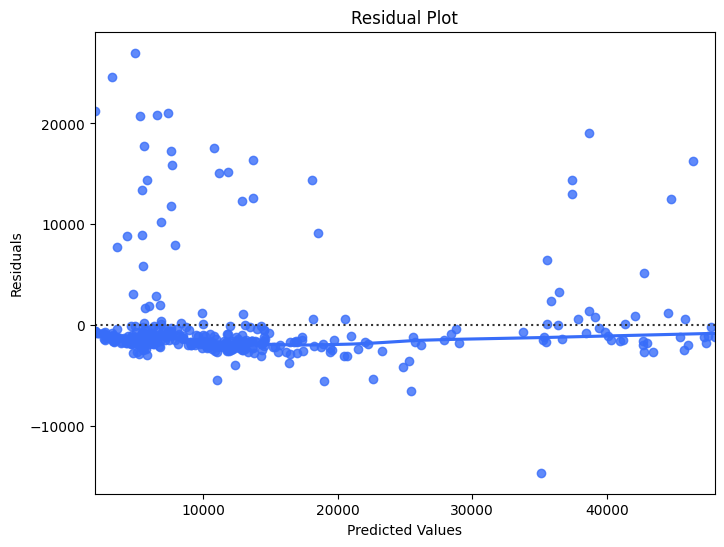

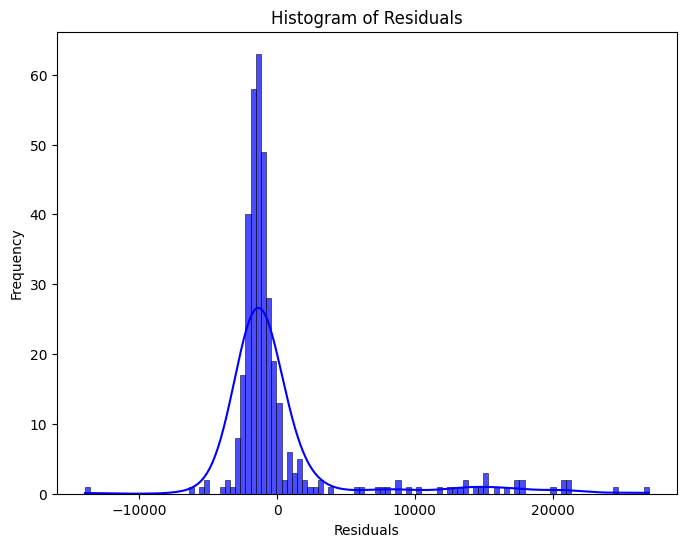

In [ ]:
plotter.plot_residual_analysis(y_pred, y_test)

### %15 synthetised data

In [ ]:
import numpy as np
chosen_idx = np.random.choice(1337, replace=False, size=200)
sampled_auggg = df_aug.iloc[chosen_idx]

merged_df = pd.concat([df, sampled_auggg])
merged_df.reset_index(inplace=True, drop=True)
merged_df = merged_df.sample(frac=1).reset_index(drop=True)

|   iter    |  target   | baggin... |   depth   | l2_lea... | learni... |
-------------------------------------------------------------------------
| 1         | -3.38e+07 | 0.4371    | 7.754     | 7.347     | 0.06388   |
| 2         | -3.366e+0 | 0.2404    | 3.78      | 0.675     | 0.08796   |
| 3         | -3.499e+0 | 0.641     | 6.54      | 0.3038    | 0.09729   |
| 4         | -2.808e+0 | 0.8492    | 4.062     | 1.9       | 0.02651   |
| 5         | -2.962e+0 | 0.3738    | 5.624     | 4.376     | 0.03621   |
| 6         | -2.853e+0 | 0.6507    | 3.697     | 2.992     | 0.04297   |
| 7         | -3.358e+0 | 0.5105    | 6.926     | 2.077     | 0.05628   |
| 8         | -2.718e+0 | 0.6332    | 3.232     | 6.115     | 0.02535   |
| 9         | -3.394e+0 | 0.1585    | 7.744     | 9.66      | 0.08276   |
| 10        | -2.807e+0 | 0.3742    | 3.488     | 6.874     | 0.04961   |
| 11        | -3.261e+0 | 1.0       | 4.48      | 5.775     | 0.1       |
| 12        | -2.705e+0 | 0.1       | 

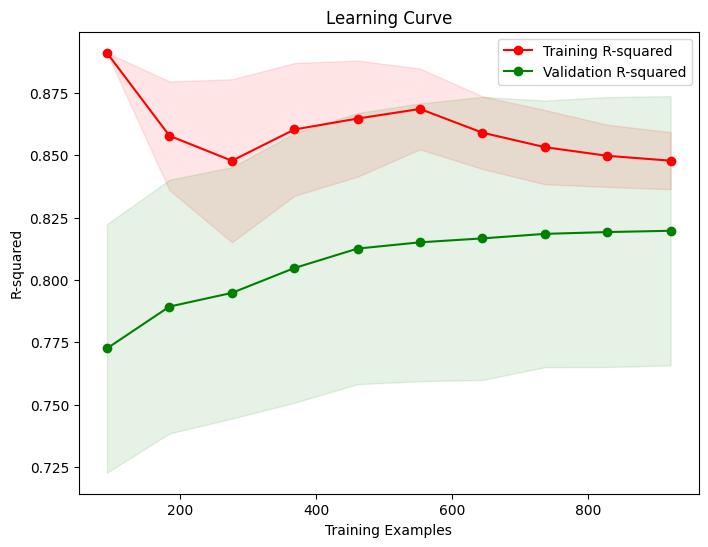

Best Hyperparameters:
{'bagging_temperature': 0.1, 'depth': 3.0, 'l2_leaf_reg': 5.280934670251376, 'learning_rate': 0.01}
Evaluation Metrics for Optimal Hyperparameters:
RMSE: 5200.700623067791
MAE: 3012.0424793729026
R^2: 0.8386907638817009


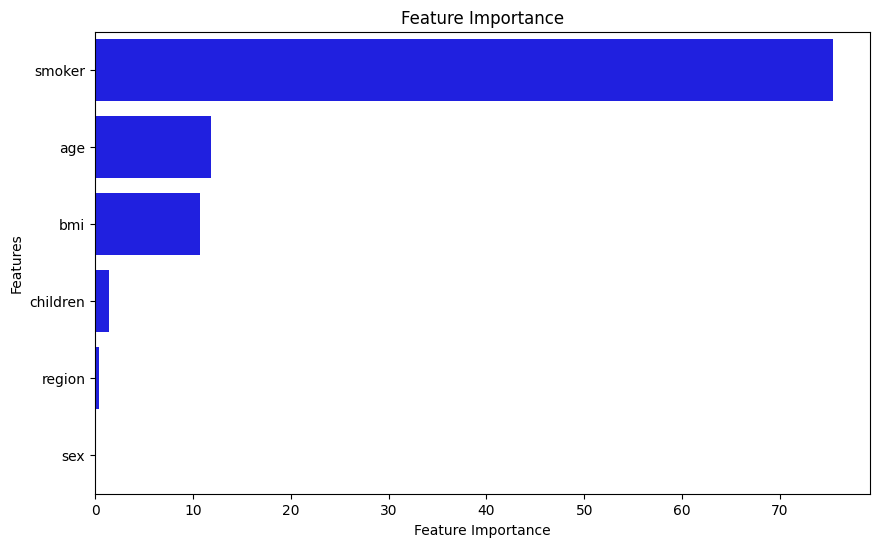




Please be patient
Stability checking of the model is running =========>


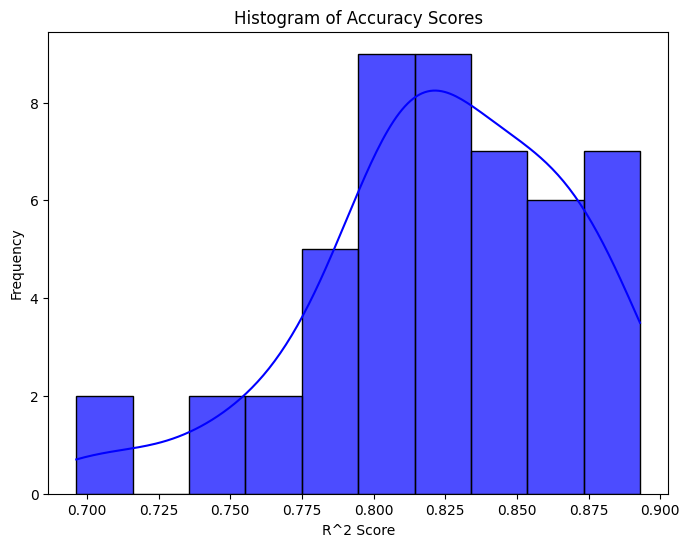

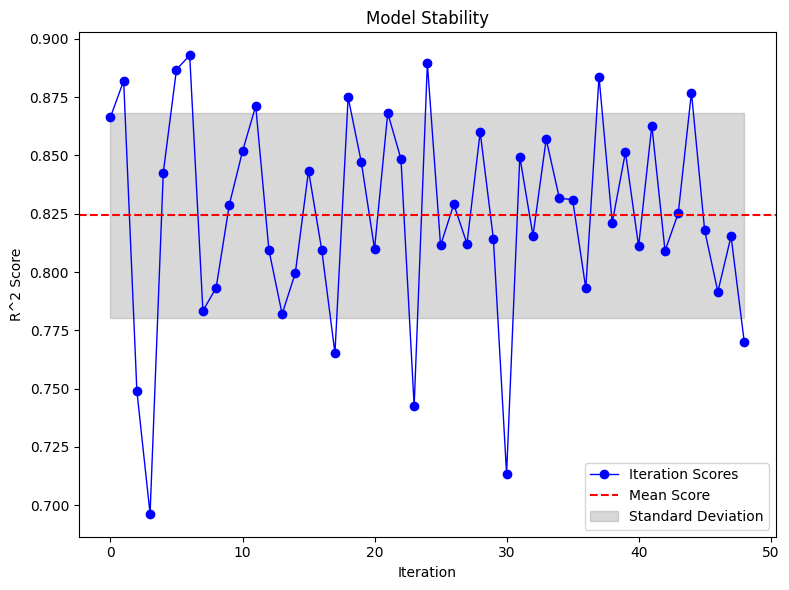



Stability Metrics For 50-folds Cross-Validation:
Mean Score: 0.8242389381653947
Max Score: 0.8929416667067065
Min Score: 0.6963280809011431
Standard Deviation of Scores: 0.04406000292515514


In [ ]:
y_test, y_pred = ml.optimize_catboost(merged_df)

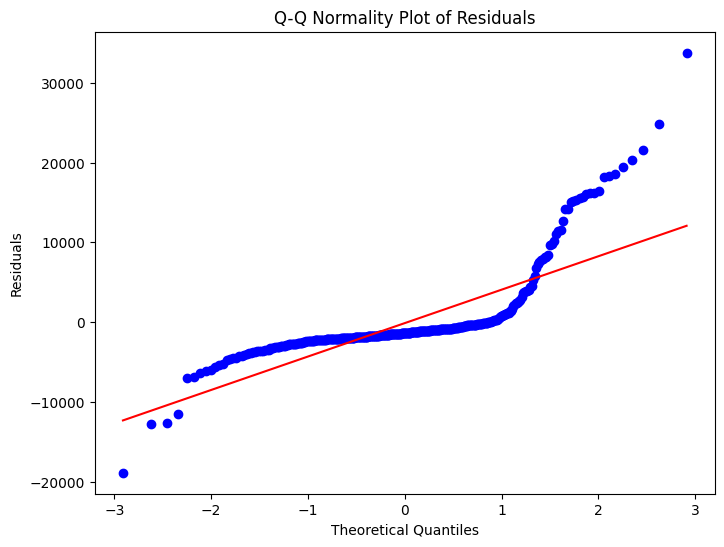

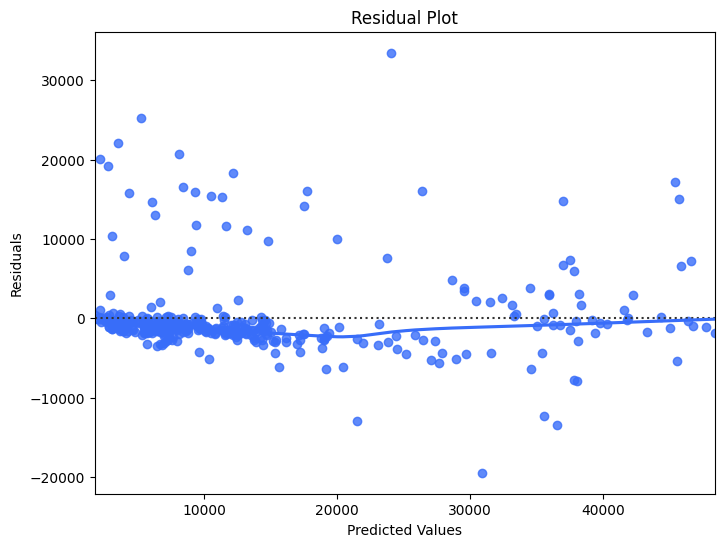

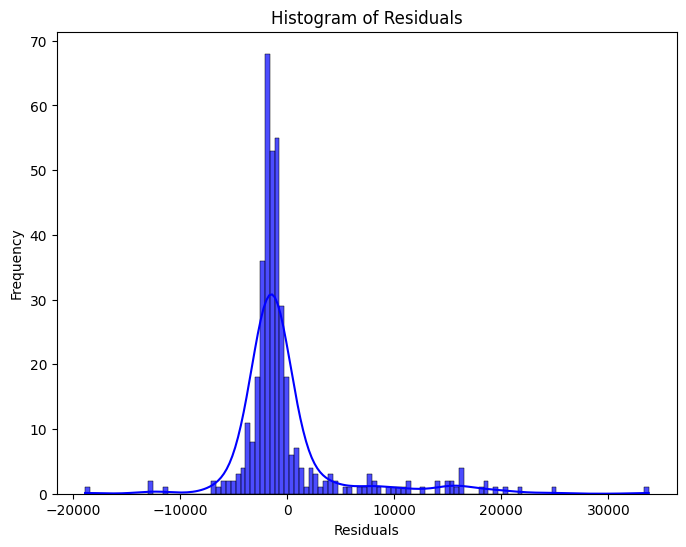

In [ ]:
plotter.plot_residual_analysis(y_pred, y_test)

### %20 synthetised data

In [ ]:
import numpy as np
chosen_idx = np.random.choice(1337, replace=False, size=267)
sampled_auggg = df_aug.iloc[chosen_idx]

merged_df = pd.concat([df, sampled_auggg])
merged_df.reset_index(inplace=True, drop=True)
merged_df = merged_df.sample(frac=1).reset_index(drop=True)

|   iter    |  target   | baggin... |   depth   | l2_lea... | learni... |
-------------------------------------------------------------------------
| 1         | -3.497e+0 | 0.4371    | 7.754     | 7.347     | 0.06388   |
| 2         | -3.553e+0 | 0.2404    | 3.78      | 0.675     | 0.08796   |
| 3         | -3.89e+07 | 0.641     | 6.54      | 0.3038    | 0.09729   |
| 4         | -3.322e+0 | 0.8492    | 4.062     | 1.9       | 0.02651   |
| 5         | -3.333e+0 | 0.3738    | 5.624     | 4.376     | 0.03621   |
| 6         | -3.341e+0 | 0.6507    | 3.697     | 2.992     | 0.04297   |
| 7         | -3.499e+0 | 0.5105    | 6.926     | 2.077     | 0.05628   |
| 8         | -3.297e+0 | 0.6332    | 3.232     | 6.115     | 0.02535   |
| 9         | -3.608e+0 | 0.1585    | 7.744     | 9.66      | 0.08276   |
| 10        | -3.319e+0 | 0.3742    | 3.488     | 6.874     | 0.04961   |
| 11        | -3.582e+0 | 1.0       | 5.047     | 6.173     | 0.1       |
| 12        | -3.253e+0 | 1.0       | 

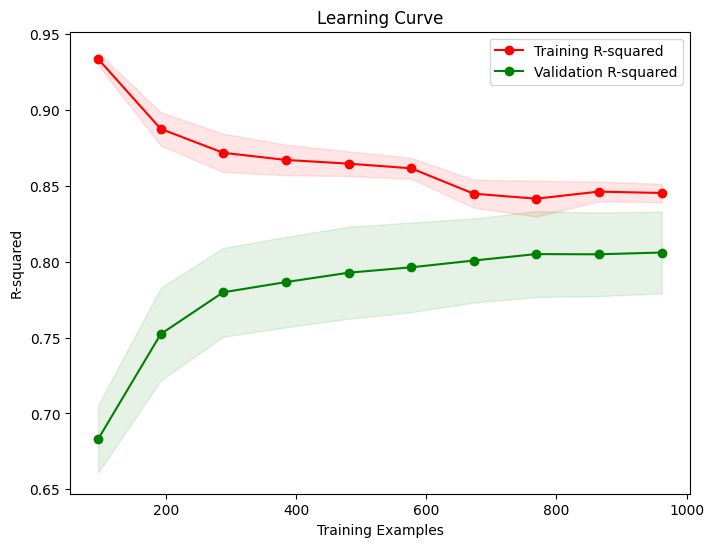

Best Hyperparameters:
{'bagging_temperature': 0.1, 'depth': 4.301598888497179, 'l2_leaf_reg': 8.601265586264121, 'learning_rate': 0.01}
Evaluation Metrics for Optimal Hyperparameters:
RMSE: 5656.6256641634445
MAE: 3298.047097010189
R^2: 0.8142323247169623


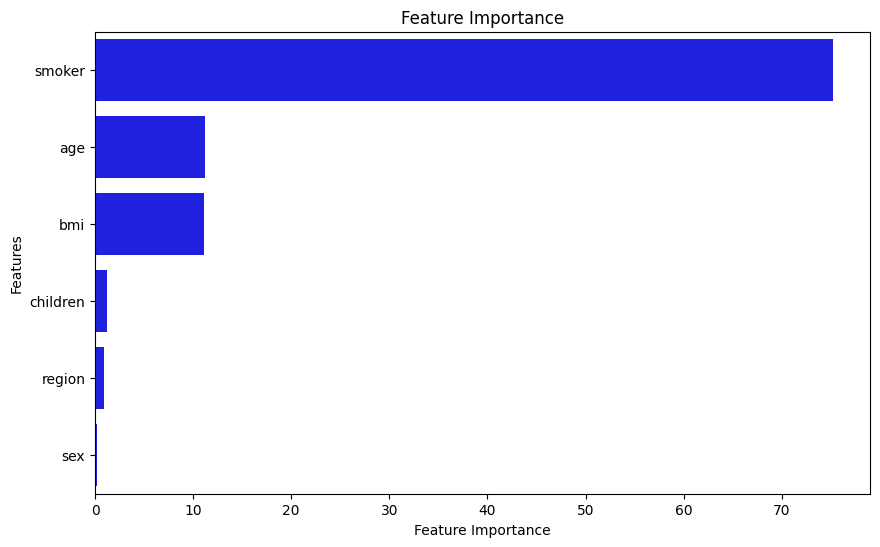




Please be patient
Stability checking of the model is running =========>


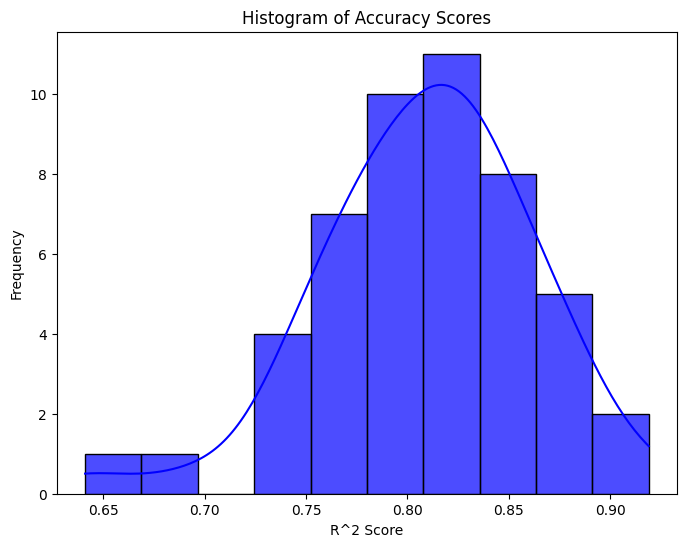

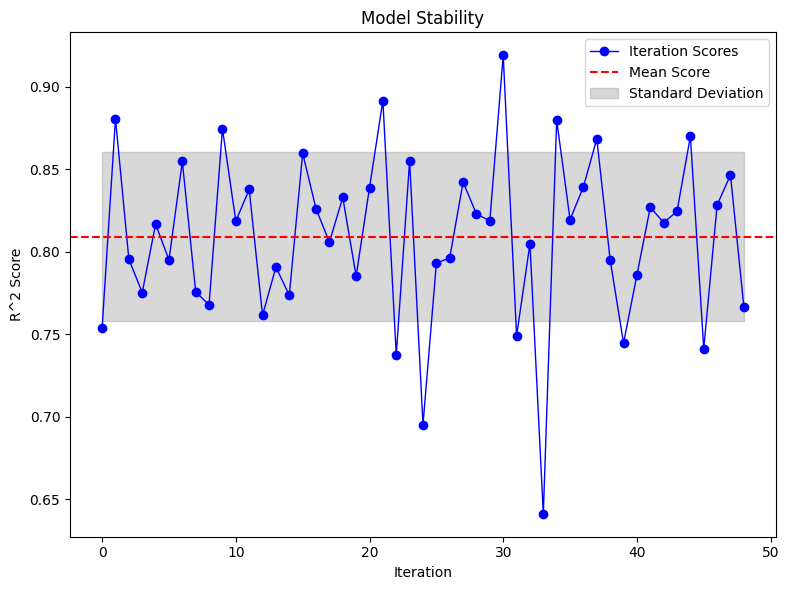



Stability Metrics For 50-folds Cross-Validation:
Mean Score: 0.8089204880036078
Max Score: 0.9190093280119934
Min Score: 0.6410817284579857
Standard Deviation of Scores: 0.0511657509384831


In [ ]:
y_test, y_pred = ml.optimize_catboost(merged_df)

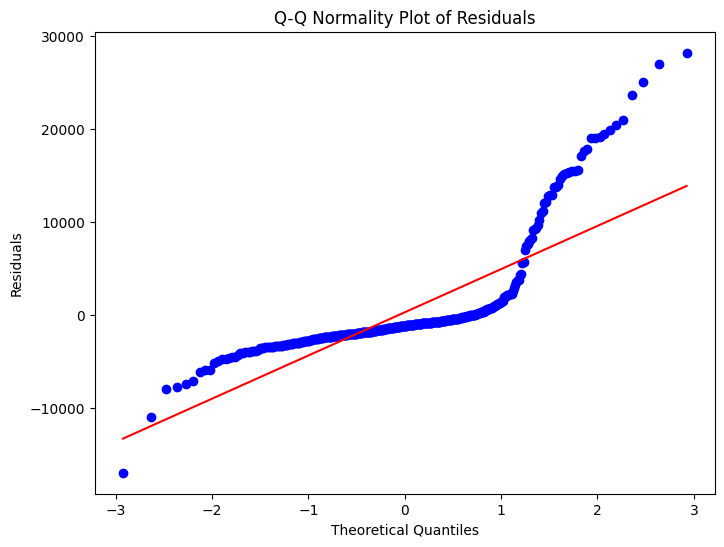

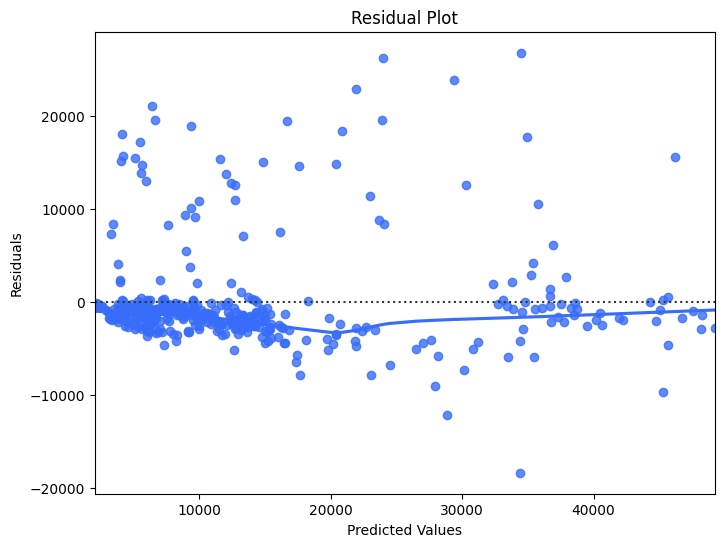

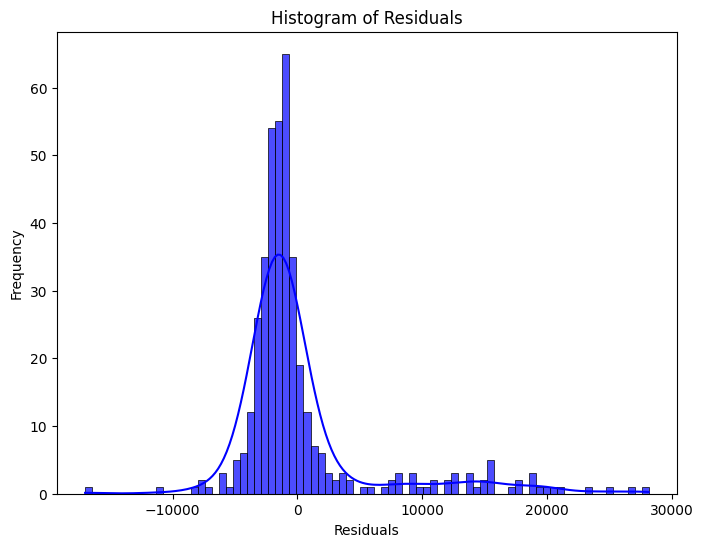

In [ ]:
plotter.plot_residual_analysis(y_pred, y_test)

### %25 synthetised data

In [ ]:
import numpy as np
chosen_idx = np.random.choice(1337, replace=False, size=334)
sampled_auggg = df_aug.iloc[chosen_idx]

merged_df = pd.concat([df, sampled_auggg])
merged_df.reset_index(inplace=True, drop=True)
merged_df = merged_df.sample(frac=1).reset_index(drop=True)

|   iter    |  target   | baggin... |   depth   | l2_lea... | learni... |
-------------------------------------------------------------------------
| 1         | -3.507e+0 | 0.4371    | 7.754     | 7.347     | 0.06388   |
| 2         | -3.723e+0 | 0.2404    | 3.78      | 0.675     | 0.08796   |
| 3         | -3.968e+0 | 0.641     | 6.54      | 0.3038    | 0.09729   |
| 4         | -3.322e+0 | 0.8492    | 4.062     | 1.9       | 0.02651   |
| 5         | -3.397e+0 | 0.3738    | 5.624     | 4.376     | 0.03621   |
| 6         | -3.406e+0 | 0.6507    | 3.697     | 2.992     | 0.04297   |
| 7         | -3.569e+0 | 0.5105    | 6.926     | 2.077     | 0.05628   |
| 8         | -3.294e+0 | 0.6332    | 3.232     | 6.115     | 0.02535   |
| 9         | -3.585e+0 | 0.1585    | 7.744     | 9.66      | 0.08276   |
| 10        | -3.373e+0 | 0.3742    | 3.488     | 6.874     | 0.04961   |
| 11        | -3.354e+0 | 0.9658    | 4.375     | 5.564     | 0.04637   |
| 12        | -3.498e+0 | 0.1       | 

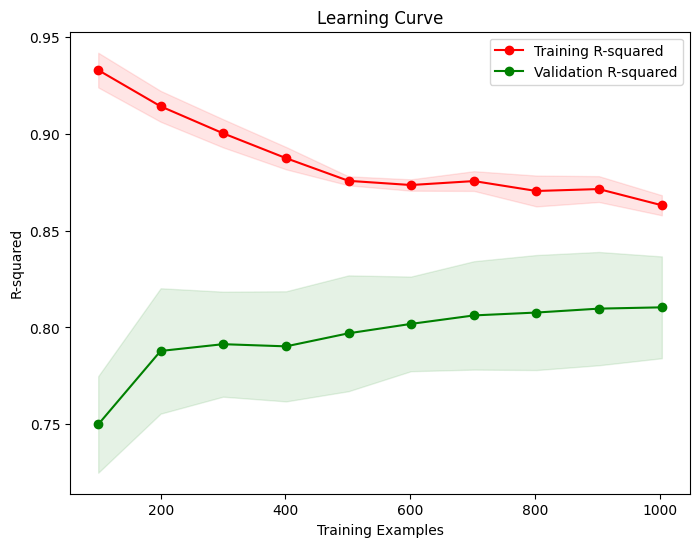

Best Hyperparameters:
{'bagging_temperature': 1.0, 'depth': 5.5806336071049785, 'l2_leaf_reg': 7.097317146605497, 'learning_rate': 0.01}
Evaluation Metrics for Optimal Hyperparameters:
RMSE: 5669.820886830733
MAE: 3258.1088098623404
R^2: 0.7885380087118908


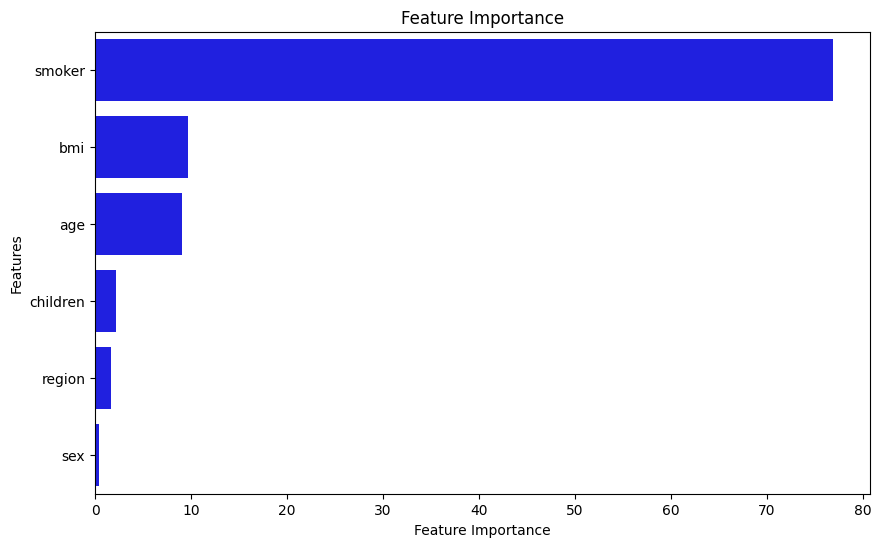




Please be patient
Stability checking of the model is running =========>


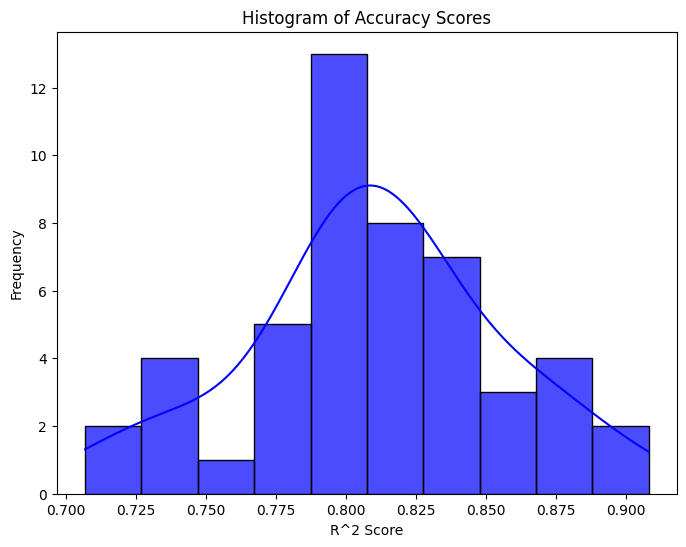

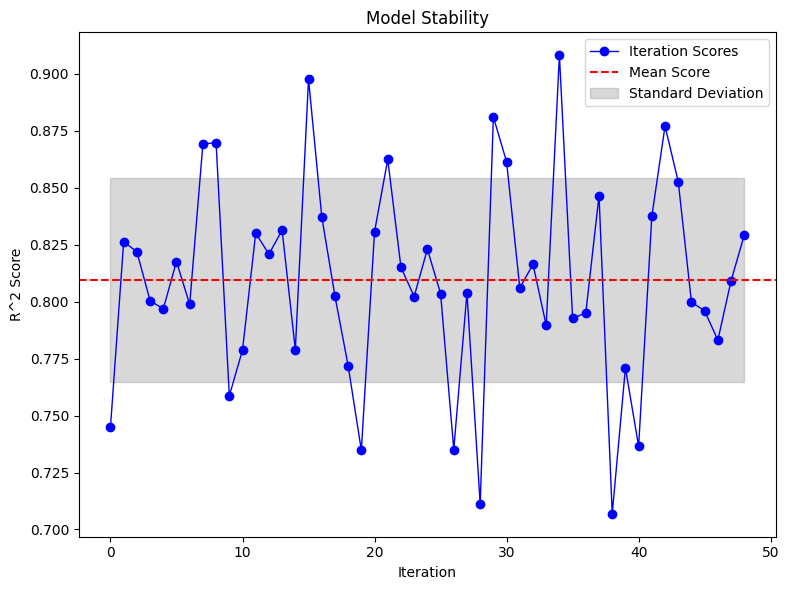



Stability Metrics For 50-folds Cross-Validation:
Mean Score: 0.8096532904937116
Max Score: 0.908224883156959
Min Score: 0.7068735547623632
Standard Deviation of Scores: 0.04472348770229304


In [ ]:
y_test, y_pred = ml.optimize_catboost(merged_df)

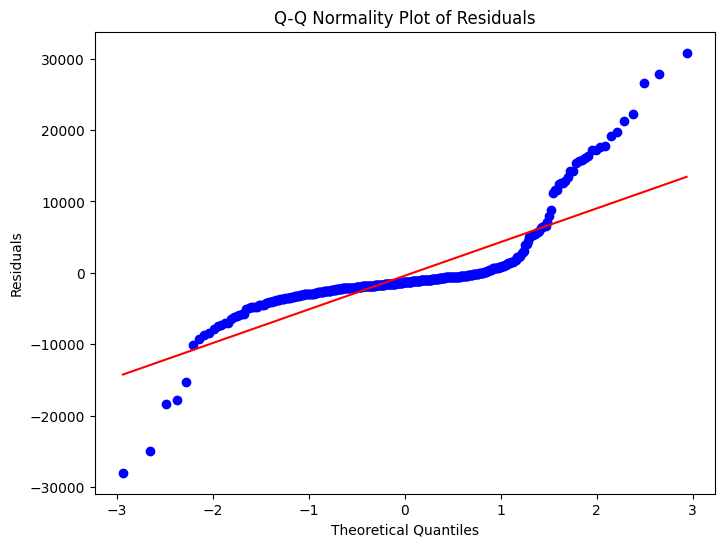

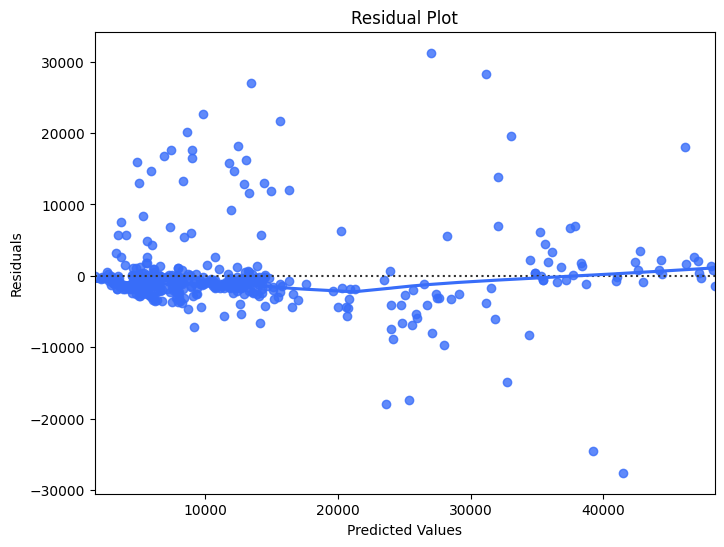

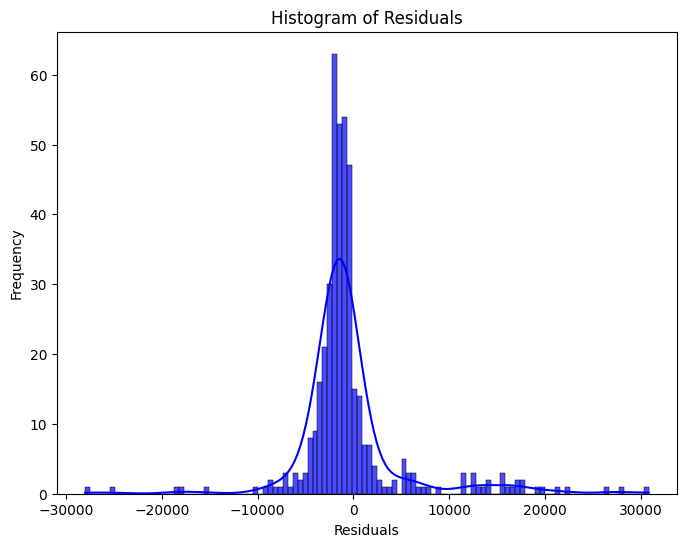

In [ ]:
plotter.plot_residual_analysis(y_pred, y_test)

### %30 synthetised data

In [ ]:
import numpy as np
chosen_idx = np.random.choice(1337, replace=False, size=401)
sampled_auggg = df_aug.iloc[chosen_idx]

merged_df = pd.concat([df, sampled_auggg])
merged_df.reset_index(inplace=True, drop=True)
merged_df = merged_df.sample(frac=1).reset_index(drop=True)

|   iter    |  target   | baggin... |   depth   | l2_lea... | learni... |
-------------------------------------------------------------------------
| 1         | -3.62e+07 | 0.4371    | 7.754     | 7.347     | 0.06388   |
| 2         | -3.847e+0 | 0.2404    | 3.78      | 0.675     | 0.08796   |
| 3         | -4.224e+0 | 0.641     | 6.54      | 0.3038    | 0.09729   |
| 4         | -3.435e+0 | 0.8492    | 4.062     | 1.9       | 0.02651   |
| 5         | -3.507e+0 | 0.3738    | 5.624     | 4.376     | 0.03621   |
| 6         | -3.425e+0 | 0.6507    | 3.697     | 2.992     | 0.04297   |
| 7         | -3.725e+0 | 0.5105    | 6.926     | 2.077     | 0.05628   |
| 8         | -3.227e+0 | 0.6332    | 3.232     | 6.115     | 0.02535   |
| 9         | -3.787e+0 | 0.1585    | 7.744     | 9.66      | 0.08276   |
| 10        | -3.385e+0 | 0.3742    | 3.488     | 6.874     | 0.04961   |
| 11        | -3.2e+07  | 0.1418    | 3.079     | 4.822     | 0.0186    |
| 12        | -3.174e+0 | 1.0       | 

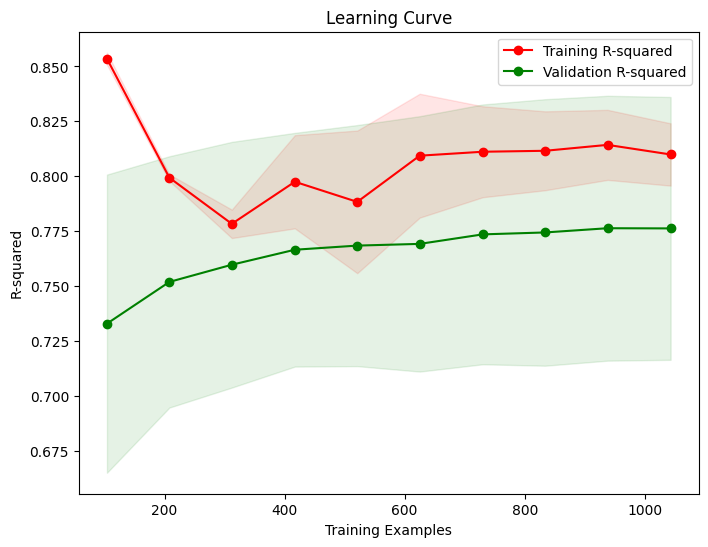

Best Hyperparameters:
{'bagging_temperature': 1.0, 'depth': 3.0, 'l2_leaf_reg': 7.684616371370463, 'learning_rate': 0.01}
Evaluation Metrics for Optimal Hyperparameters:
RMSE: 5627.6665969202895
MAE: 3281.7612534447007
R^2: 0.7716791549176081


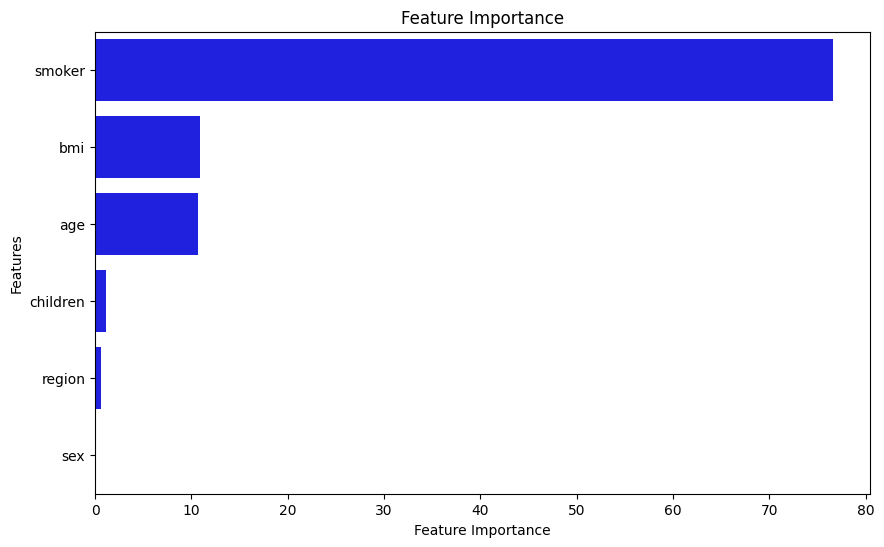




Please be patient
Stability checking of the model is running =========>


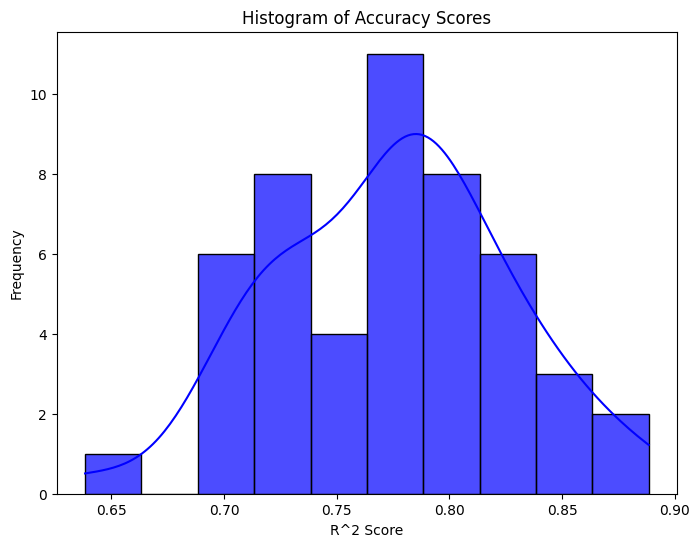

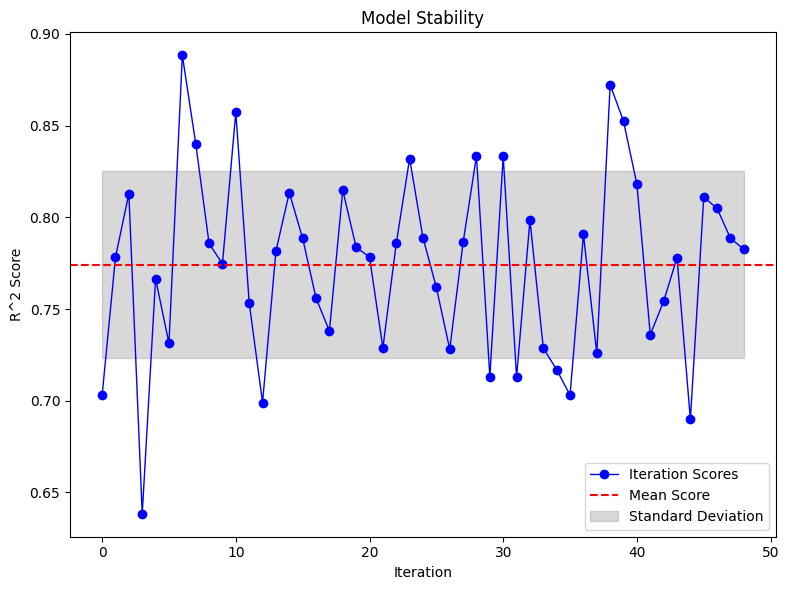



Stability Metrics For 50-folds Cross-Validation:
Mean Score: 0.7742811657486129
Max Score: 0.8883951135471294
Min Score: 0.6383466210359066
Standard Deviation of Scores: 0.05115340113426742


In [ ]:
y_test, y_pred = ml.optimize_catboost(merged_df)

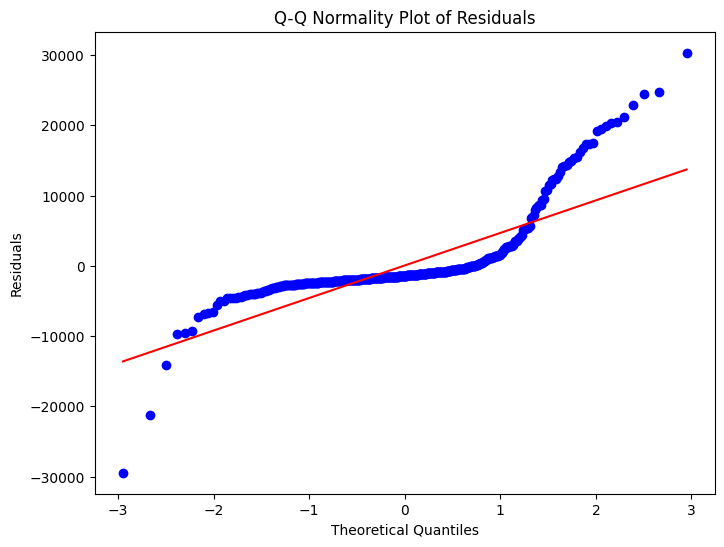

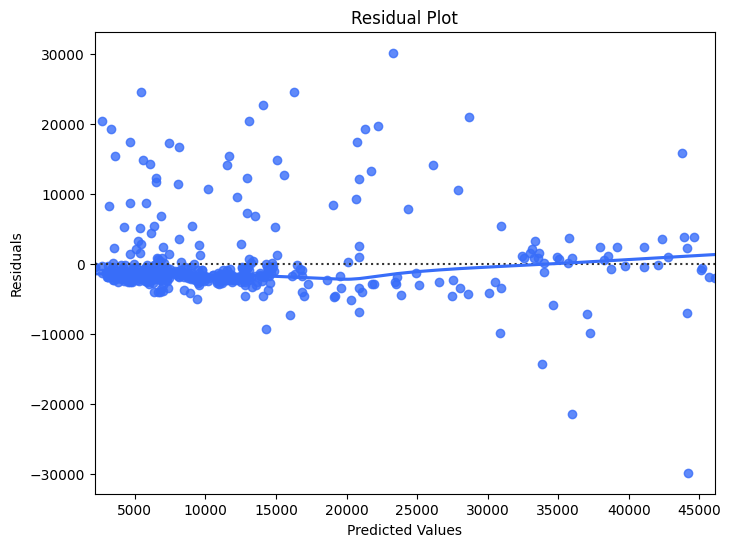

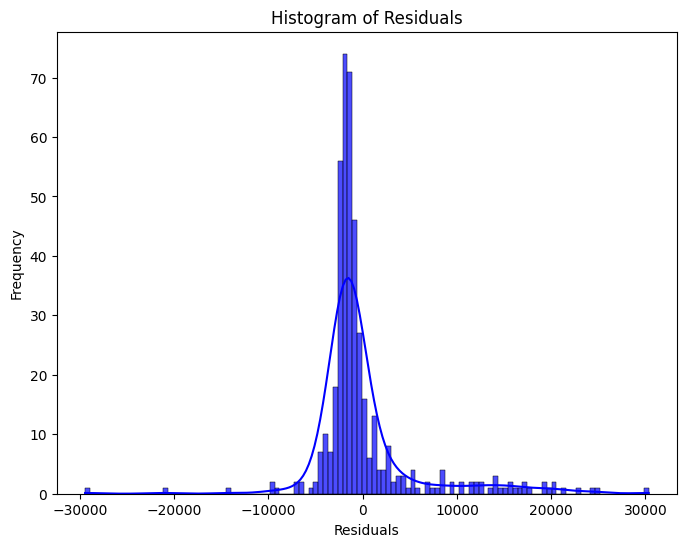

In [ ]:
plotter.plot_residual_analysis(y_pred, y_test)

### %35 synthetised data

In [ ]:
import numpy as np
chosen_idx = np.random.choice(1337, replace=False, size=468)
sampled_auggg = df_aug.iloc[chosen_idx]

merged_df = pd.concat([df, sampled_auggg])
merged_df.reset_index(inplace=True, drop=True)
merged_df = merged_df.sample(frac=1).reset_index(drop=True)

|   iter    |  target   | baggin... |   depth   | l2_lea... | learni... |
-------------------------------------------------------------------------
| 1         | -3.794e+0 | 0.4371    | 7.754     | 7.347     | 0.06388   |
| 2         | -3.917e+0 | 0.2404    | 3.78      | 0.675     | 0.08796   |
| 3         | -4.066e+0 | 0.641     | 6.54      | 0.3038    | 0.09729   |
| 4         | -3.497e+0 | 0.8492    | 4.062     | 1.9       | 0.02651   |
| 5         | -3.582e+0 | 0.3738    | 5.624     | 4.376     | 0.03621   |
| 6         | -3.526e+0 | 0.6507    | 3.697     | 2.992     | 0.04297   |
| 7         | -3.786e+0 | 0.5105    | 6.926     | 2.077     | 0.05628   |
| 8         | -3.402e+0 | 0.6332    | 3.232     | 6.115     | 0.02535   |
| 9         | -3.9e+07  | 0.1585    | 7.744     | 9.66      | 0.08276   |
| 10        | -3.518e+0 | 0.3742    | 3.488     | 6.874     | 0.04961   |
| 11        | -3.824e+0 | 1.0       | 4.051     | 5.168     | 0.1       |
| 12        | -3.28e+07 | 1.0       | 

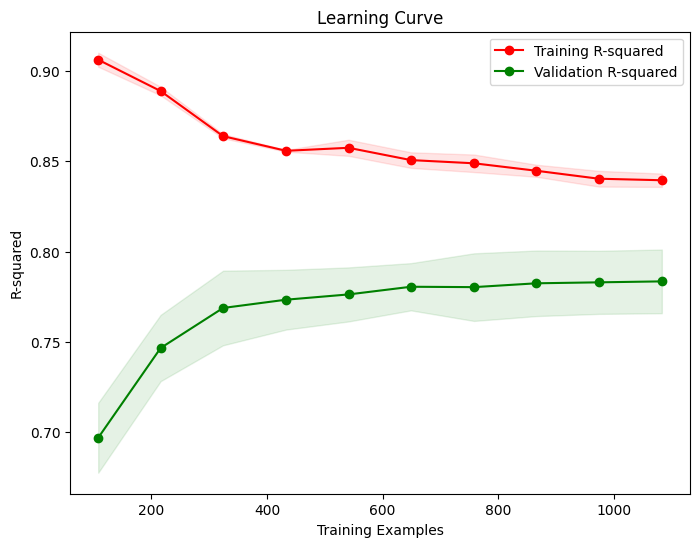

Best Hyperparameters:
{'bagging_temperature': 0.1, 'depth': 5.1593477267786, 'l2_leaf_reg': 8.132856069141619, 'learning_rate': 0.01}
Evaluation Metrics for Optimal Hyperparameters:
RMSE: 5720.715609482192
MAE: 3370.5941859878567
R^2: 0.8130577671634349


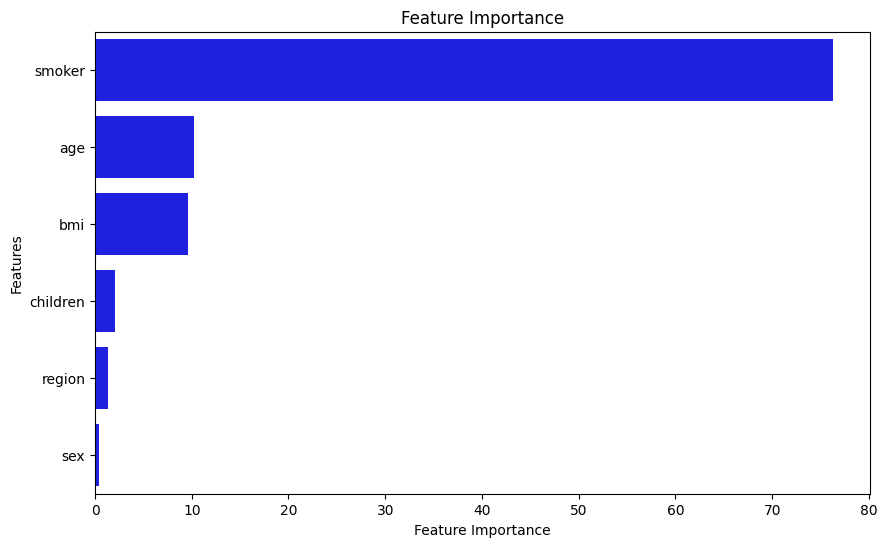




Please be patient
Stability checking of the model is running =========>


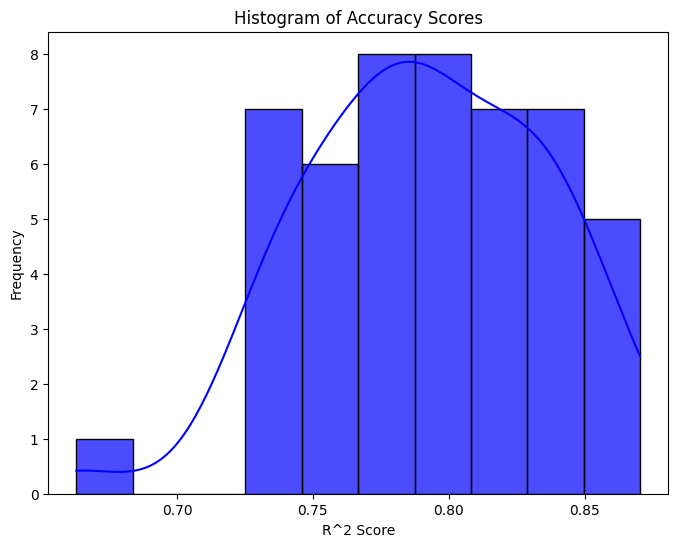

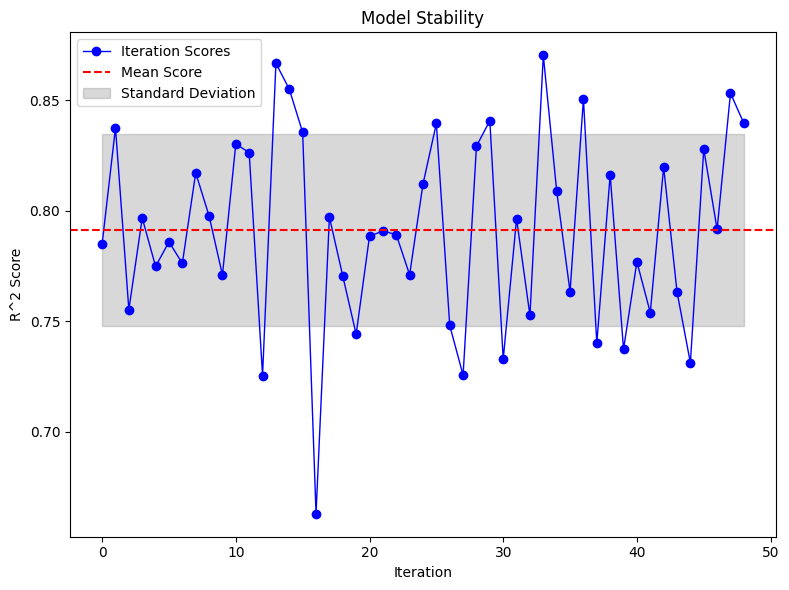



Stability Metrics For 50-folds Cross-Validation:
Mean Score: 0.7912479783128543
Max Score: 0.870252947930643
Min Score: 0.6630065296403197
Standard Deviation of Scores: 0.04343601881248159


In [ ]:
y_test, y_pred = ml.optimize_catboost(merged_df)

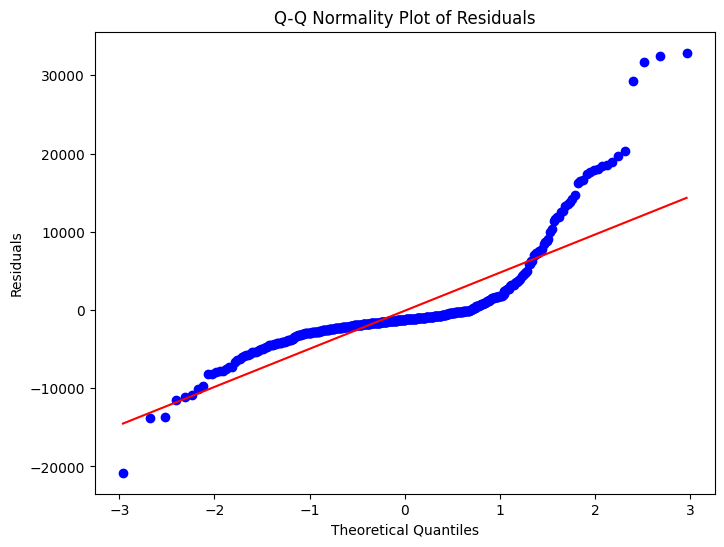

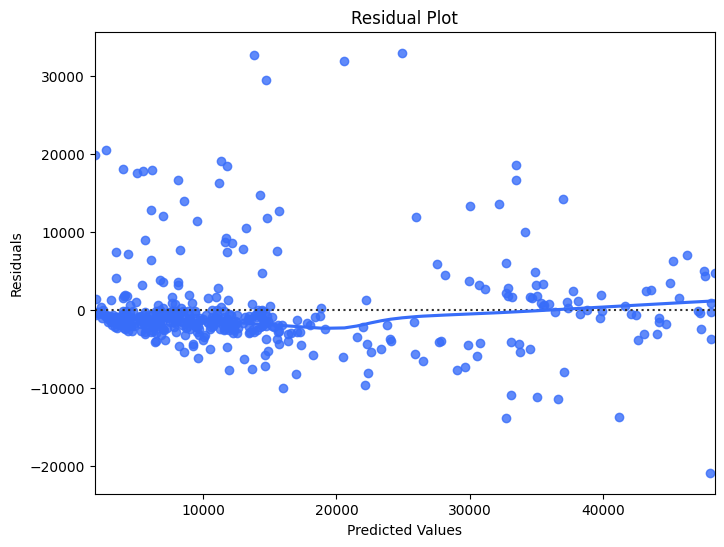

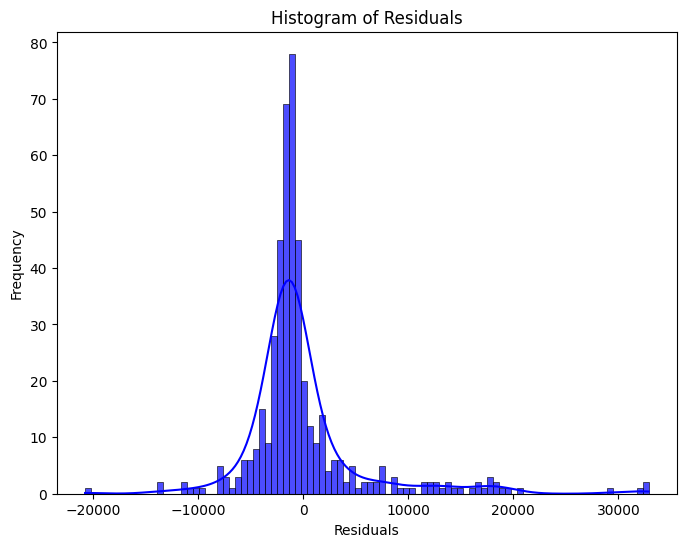

In [ ]:
plotter.plot_residual_analysis(y_pred, y_test)

##### **Analysis:**

1. The gradual decrease in the R-squared value as the ratio of synthesized data to original data increased suggests that the synthesized data may not accurately capture the underlying patterns and relationships present in the original dataset. This could be attributed to limitations in the synthesis process or the inability to replicate the complexity of real-world data.

2. The observed ascending pattern in the RMSE with an increasing ratio of synthesized data indicates that the model's predictive performance deteriorates as more synthesized data is introduced. This suggests that the synthesized data might introduce noise or inconsistencies that negatively impact the model's ability to generalize well to unseen data.

3. The presence of unexpected disorders in the learning curve patterns, where the learning rates for the training and validation sets do not converge to the optimum point, further reinforces the notion that the synthesized data lacks quality. These irregularities could potentially be attributed to unrealistic data distributions or biased sampling during the synthesis process.

4. Despite the decrease in model accuracy with synthesized data, it is worth noting that the addition of synthesized instances helped mitigate the overestimation problem of the model. This suggests that the synthesized data may be beneficial in addressing issues related to bias or lack of representation in the original dataset.

5. However, considering the overall analysis, the disadvantages of incorporating synthesized data outweigh the benefits. The low quality of the synthesized data, as evidenced by the reduced stability, decreased accuracy, and irregular learning curve patterns, indicates that it may not be reliable or trustworthy for effective modeling.

In conclusion, while the inclusion of synthesized data showed some potential in addressing certain model shortcomings, the observed limitations in terms of reduced accuracy, increased RMSE, and inadequate data quality lead us to conclude that it is not advisable to utilize synthesized data for modeling purposes in this particular scenario.

# **Conclusion:**



## General Insights about the Dataset:

1. Gender Distribution: The dataset consists of an equal proportion of males and females, indicating a balanced representation of genders within the surveyed population.

2. Regional Distribution: The distribution of individuals across different regions appears to be relatively uniform, suggesting a similar contribution from each region to the overall dataset.

3. Smoking Habits: Non-smokers constitute a significant majority, comprising 80% of the population, while smokers make up the remaining 20%. This indicates that smoking is less prevalent among the surveyed individuals.

4. Number of Children: Approximately 43% of individuals in the dataset have no children, while 25% have one child, 18% have two children, and the maximum number of children for an individual is five. This suggests that a considerable portion of the surveyed population either does not have children or has a relatively small number of children.

5. Age Groups: The largest share of the population falls within the age range of 17 to 27, comprising 27% of the dataset. The remaining age groups have a relatively similar proportion, with each accounting for approximately 18%. This indicates a relatively even distribution of individuals across different age groups.

6. BMI Groups: The majority of individuals (77%) fall within the BMI range of 15 to 30. Within this range, 36% have a BMI from 15 to 23, while 41% have a BMI from 23 to 30. Only a small proportion of the population (approximately 1.3%) has a BMI above 45. This suggests that the majority of individuals have a moderate BMI, with a smaller percentage falling into the extreme BMI ranges.

## Key Findings from Experiments on the Dataset:

7. The stacked model, combining RandomForestRegressor, CatBoostRegressor, and RidgeRegressor, outperformed all other models, achieving an impressive R-squared value of 90.52%. This makes it the preferred choice for this dataset.

8. An alternative to the stacked model is the CatBoostRegressor, which showed the second-best performance in terms of R-squared and RMSE. This model can be a suitable option for those with limited computing resources.

9. All models exhibited an issue of overestimation, suggesting a potential bias in the dataset. Further investigation is necessary to understand and address this bias.

10. Smokers were found to have an average medical cost at least three times higher than non-smokers. Additionally, for smokers with a BMI over 30, the medical costs increased dramatically. This highlights the importance of considering lifestyle factors, such as smoking and BMI, in predicting medical costs.

11. The Southeast region showed a higher prevalence of individuals with high BMI. This finding suggests that the National Health Service (NHS) should investigate this trend and consider targeted interventions to address obesity-related health issues in this region.

12. The medical cost by age plot revealed the existence of another crucial parameter that is not available in the dataset. Insurance organizations should investigate and incorporate this parameter to improve the accuracy of cost predictions.

13. The average medical cost increases with age.

In conclusion, the stacked model demonstrated superior performance, while considerations of smoking, BMI, regional differences, and age-related factors can provide valuable insights for insurance organizations and healthcare providers to better understand and predict medical costs. The findings related to gender distribution, regional distribution, smoking habits, the number of children, age groups, and BMI groups contribute to a comprehensive understanding of the surveyed population and can assist in developing more targeted strategies for healthcare planning and cost prediction.

In [ ]:
#